In [892]:
#Load module & set dir 
import numpy as np
import json
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

overall_performance_dir = "/mnt/c/Users/since/Dropbox/RAs/projects"
rating_files = "Ratings/1.SubjectRating"

# Subject LV analysos

## Compare overall performance correlation between raters 

In [898]:
overall_performance_dir = "/mnt/c/Users/since/Dropbox/RAs/projects"
rating_files = "Ratings/1.SubjectRating"
rater_name = { 'KK' : "KiKang", 'HJ':"HyunJin"}
fpath, fname = {}, {} 
for rater in ['KK','HJ']: 
    fpath[rater] = os.path.join(overall_performance_dir, rater_name[rater],rating_files)
    fname[rater] = 'SubjectRating_' + rater+'.xlsx'
print(fpath['HJ'])
print(fname['HJ'])

/mnt/c/Users/since/Dropbox/RAs/projects/HyunJin/Ratings/1.SubjectRating
SubjectRating_HJ.xlsx


In [987]:
op_run.columns

Index(['overall1 ', 'overall2 ', 'accuracy1', 'accuracy2', 'characrers1',
       'characrers2', 'actions1', 'actions2', 'lines1', 'lines2', 'Reference'],
      dtype='object')

In [988]:
#Load behav_data 

rater_overall1, rater_overall2 = {}, {}
rater_actions1, rater_actions2 = {}, {}
rater_lines1, rater_lines2 = {}, {} 
all_questions = {}
for rater in ['KK', 'HJ']:
    rate_dir = fpath[rater]
    rate_fname = fname[rater]
    print(rate_fname)

    op_run = pd.read_excel(os.path.join(rate_dir, rate_fname), sheet_name = 'RunningMan', usecols = [0,1,2,3,4,5,6,7,8,9,10,11], index_col=0 )
    op_nei = pd.read_excel(os.path.join(rate_dir, rate_fname), sheet_name = 'Neighbors', usecols = [0,1,2,3,4,5,6,7,8,9,10,11], index_col=0 )
    op_dre = pd.read_excel(os.path.join(rate_dir, rate_fname), sheet_name = 'Dream', usecols = [0,1,2,3,4,5,6,7,8,9,10,11], index_col=0 )
    op_bli = pd.read_excel(os.path.join(rate_dir, rate_fname), sheet_name = 'BlindDate', usecols = [0,1,2,3,4,5,6,7,8,9,10,11], index_col=0 )

    overalls = {'RunningMan' : op_run, 'Neighbors':op_nei, 'Dream': op_dre, 'BlindDate':op_bli}
    # Subject check - exclude 9, 36, 37, 41, 47, 56, 57 
    sub_exclude = [9, 26, 36, 37, 41, 47, 56, 57, 60, 61,62,63,69]
    idx_exclude = [] 
    for sub in sub_exclude:
        if sub < 10:
            idx = 'S0'+str(sub)
        else:
            idx = 'S'+str(sub) 
        idx_exclude.append(idx)
    #print(idx_exclude)

    #Set variable
    overall1, overall2 = {}, {} 
    story_questions = {} 
    # accuracy1, accuracy2 = {}, {}
    # actions1, actions2 = {}, {}
    # lines1, lines2 = {}, {} 
    for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
        op_df = overalls[story]
        op_df.drop(idx_exclude, axis=0, inplace=True)
        overall1[story] = op_df['overall1 ']
        overall2[story] = op_df['overall2 ']
        
#         #accuracy1[story] = op_df['accuracy1']
#         #accuracy2[story] = op_df['accuracy2']
        
#         actions1[story] = op_df['actions1']
#         actions2[story] = op_df['actions2']
        
#         lines1[story] = op_df['lines1']
#         lines2[story] = op_df['lines2']
        story_questions[story] = op_df
    rater_overall1[rater] = overall1
    rater_overall2[rater] = overall2
    # rater_actions1[rater] = actions1
    # rater_actions2[rater] = actions2
    # rater_lines1[rater] = lines1
    # rater_lines2[rater] = lines2
    
    all_questions[rater] = story_questions

SubjectRating_KK.xlsx
SubjectRating_HJ.xlsx


In [901]:
overalls[story].columns

Index(['overall1 ', 'overall2 ', 'accuracy1', 'accuracy2', 'characrers1',
       'characrers2', 'actions1', 'actions2', 'lines1', 'lines2', 'Reference'],
      dtype='object')

In [909]:
# stack matrix 
all_overalll , all_overall2 = {}, {}
corr1, corr2 = [], []
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    all_overalll[story] = pd.concat([rater_overall1['KK'][story],rater_overall1['HJ'][story]], axis=1)
    all_overall2[story] = pd.concat([rater_overall2['KK'][story],rater_overall2['HJ'][story]], axis=1)
    corr1.append(all_overalll[story].corr().values[0][1])
    corr2.append(all_overall2[story].corr().values[0][1])
    #corr1.append(all_overalll[story].corr())
    #corr2.append(all_overall2[story].corr())
print(sum(corr1) / len(corr1))
print(sum(corr2) / len(corr2))
print((sum(corr1) / len(corr1)+sum(corr2) / len(corr2))/2)

0.6524245541464185
0.5756923300223437
0.6140584420843811


In [906]:
print(corr1)
print(corr2)

[0.59024164176254, 0.6464007176919743, 0.7040014228637895, 0.6690544342673701]
[0.6280981909910305, 0.4791189318292799, 0.6616048634922691, 0.5339473337767954]


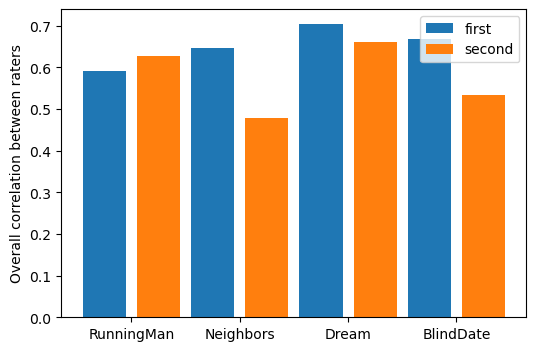

In [920]:
import matplotlib.pyplot as plt
import numpy as np

x1 = [0,2,4,6]
x2 = [1,3,5,7]
x3 = [0.5, 2.5, 4.5,6.5] 
stories = ['RunningMan', 'Neighbors','Dream','BlindDate']
values1 = corr1
values2 = corr2

plt.bar(x1, values1)
plt.bar(x2, values2)
plt.xticks(x3, stories)
plt.ylabel('Overall correlation between raters')
plt.legend(['first', 'second'])

plt.show()


In [907]:
# stack matrix 
all_overalll , all_overall2 = {}, {}
corr1, corr2 = [], []
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    all_overalll[story] = pd.concat([rater_overall1['KK'][story],rater_overall2['KK'][story]], axis=1)
    all_overall2[story] = pd.concat([rater_overall1['HJ'][story],rater_overall2['HJ'][story]], axis=1)
    corr1.append(all_overalll[story].corr().values[0][1])
    corr2.append(all_overall2[story].corr().values[0][1])
    #corr1.append(all_overalll[story].corr())
    #corr2.append(all_overall2[story].corr())
print(sum(corr1) / len(corr1))
print(sum(corr2) / len(corr2))
print((sum(corr1) / len(corr1)+sum(corr2) / len(corr2))/2)

0.6542432962411973
0.5991615727684644
0.6267024345048309


In [908]:
print(corr1)
print(corr2)

[0.7704776690336329, 0.7272180923534245, 0.662616403864504, 0.45666101971322753]
[0.7063537386074378, 0.6003058031353685, 0.6308606818667478, 0.45912606746430357]


### Other scores

In [1016]:
particular_qus

Reference  Reference
S01        3.0        3.0
S02        3.0        3.0
S03        2.0        2.0
S04        1.0        2.0
S05        2.0        0.0
..         ...        ...
S72        3.0        1.0
S73        3.0        0.0
S74        4.0        0.0
S75        2.0        2.0
S76        2.0        1.0

[63 rows x 2 columns]

In [1012]:
all_corr= {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    corr=[]
    for qus in ['overall1 ', 'overall2 ', 'accuracy1', 'accuracy2', 'characrers1','characrers2', 'actions1', 'actions2', 'lines1', 'lines2', 'Reference']: 
        particular_qus = pd.concat([all_questions['KK'][story][qus],all_questions['HJ'][story][qus]], axis=1)
        corr.append(particular_qus.corr().values[0][1])
    all_corr[story] = corr
pd_corr = pd.DataFrame.from_dict(all_corr)
pd_corr.index = ['overall1 ', 'overall2 ', 'accuracy1', 'accuracy2', 'characrers1','characrers2', 'actions1', 'actions2', 'lines1', 'lines2', 'Reference']
pd_corr['mean']= pd_corr.mean(axis = 1)
pd_corr

RunningMan  Neighbors     Dream  BlindDate      mean
overall1       0.590242   0.646401  0.704001   0.669054  0.652425
overall2       0.628098   0.479119  0.661605   0.533947  0.575692
accuracy1      0.098756   0.175289  0.228112  -0.099730  0.100607
accuracy2      0.110652   0.100901  0.033906   0.041936  0.071849
characrers1    0.639053   0.342069  0.276325   0.403380  0.415207
characrers2    0.218476   0.011003  0.281057   0.539502  0.262510
actions1       0.603006   0.557286  0.577252   0.505263  0.560702
actions2       0.627838   0.544340  0.436584   0.361675  0.492609
lines1         0.546124   0.790449  0.712354   0.893915  0.735711
lines2         0.644558   0.624886  0.576249   0.649722  0.623854
Reference     -0.342701  -0.361567 -0.179315  -0.494920 -0.344626

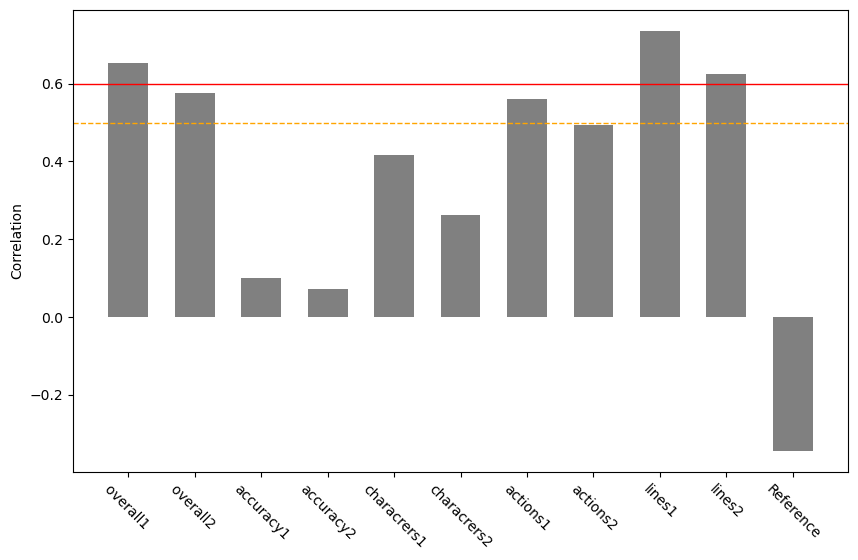

In [1017]:
import matplotlib.pyplot as plt

xs=pd_corr.index.to_list()       #dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장 
ys=pd_corr['mean'].to_list()   #dy_day(테이터 프레임)의 volume 필드를 리스트로 저장

plt.figure(figsize=(10, 6))     #그래프 크기 지정
#plt.xlabel('Date')              #그래프 x축 이름(label) 지정
plt.ylabel('Correlation')            #그래프 y축 이름(label) 지정

plt.bar(xs, ys, width=0.6, color='grey')    #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯 
plt.xticks(xs,rotation=-45)

plt.axhline(0.6, 0, 1, color='red', linestyle='solid', linewidth=1)
plt.axhline(0.5, 0, 1, color='orange', linestyle='--', linewidth=1)

In [1005]:
all_mean ={}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    questions = {}
    mean = []
    for qus in ['overall1 ', 'overall2 ', 'accuracy1', 'accuracy2', 'characrers1','characrers2', 'actions1', 'actions2', 'lines1', 'lines2', 'Reference']: 
        questions = pd.concat([all_questions['KK'][story][qus],all_questions['HJ'][story][qus]], axis=0)
        particular_means = questions.mean(axis = 0) 
        mean.append(particular_means)
    #print(f'{story} corr', corr)
    #print(f'{story} mean', mean)
    all_mean[story] = mean
pd_mean = pd.DataFrame.from_dict(all_mean)
pd_mean.index =['overall1 ', 'overall2 ', 'accuracy1', 'accuracy2', 'characrers1','characrers2', 'actions1', 'actions2', 'lines1', 'lines2', 'Reference']
pd_mean['mean']= pd_mean.mean(axis = 1)
pd_mean

RunningMan  Neighbors     Dream  BlindDate      mean
overall1       1.682540   1.515873  1.515873   1.523810  1.559524
overall2       2.738095   2.698413  2.603175   2.523810  2.640873
accuracy1      2.523810   2.682540  2.436508   2.484127  2.531746
accuracy2      3.047619   3.023810  3.079365   2.873016  3.005952
characrers1    1.912698   2.341270  2.468254   2.214286  2.234127
characrers2    2.730159   3.103175  2.992063   2.658730  2.871032
actions1       1.841270   1.650794  1.555556   1.507937  1.638889
actions2       2.841270   2.690476  2.309524   2.555556  2.599206
lines1         1.126984   1.544000  1.388889   1.404762  1.366159
lines2         2.500000   2.856000  2.619048   2.642857  2.654476
Reference      2.222222   2.341270  2.325397   2.071429  2.240079

([<matplotlib.axis.XTick at 0x7f64501959d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

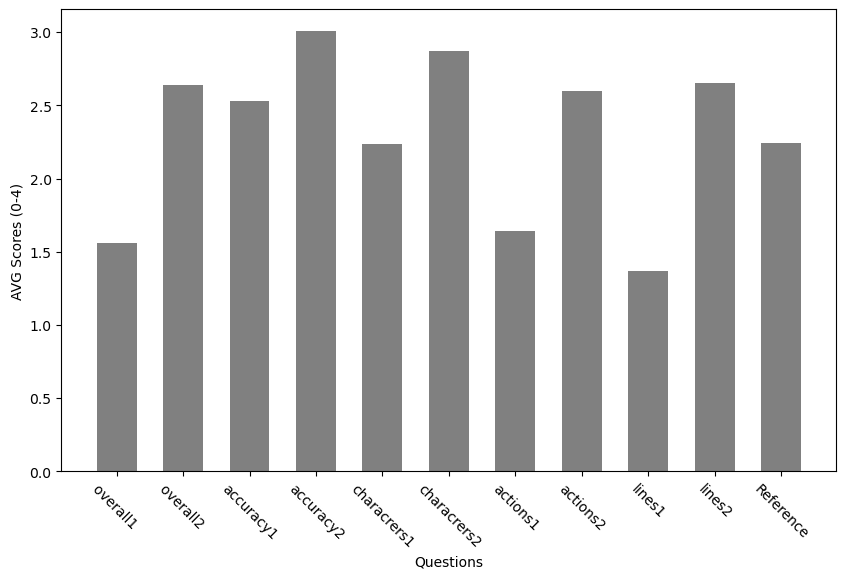

In [1009]:
import matplotlib.pyplot as plt

xs=pd_mean.index.to_list()       #dy_day(데이터 프레임)의 index(날짜, 시간)를 리스트로 저장 
ys=pd_mean['mean'].to_list()   #dy_day(테이터 프레임)의 volume 필드를 리스트로 저장

plt.figure(figsize=(10, 6))     #그래프 크기 지정
plt.xlabel('Questions')              #그래프 x축 이름(label) 지정
plt.ylabel('AVG Scores (0-4)')            #그래프 y축 이름(label) 지정

plt.bar(xs, ys, width=0.6, color='grey')    #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯 
plt.xticks(xs,rotation=-45)

#plt.axhline(0.6, 0, 1, color='red', linestyle='solid', linewidth=1)
#plt.axhline(0.5, 0, 1, color='orange', linestyle='--', linewidth=1)

## Correlation Between variables 

In [527]:
corr_VA1.corr(method='pearson')

overall1   overall2   actions1  actions2    lines1    lines2
overall1    1.000000   0.483760  0.715927  0.359597  0.671899  0.315278
overall2    0.483760   1.000000  0.512489  0.628151  0.266763  0.673791
actions1    0.715927   0.512489  1.000000  0.437570  0.466583  0.416323
actions2    0.359597   0.628151  0.437570  1.000000  0.191990  0.749130
lines1      0.671899   0.266763  0.466583  0.191990  1.000000  0.209498
lines2      0.315278   0.673791  0.416323  0.749130  0.209498  1.000000

In [519]:
#actions1[story] = op_df['actions1']
#actions1[story] = op_df['actions2']

#lines1[story] = op_df['lines1']
#lines2[story] = op_df['lines2']


# correlation with subject LV overall performance
for rater in ['KK','HJ']:
    print(f'---{rater}----')
    for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:

        overall1 = pd.DataFrame(rater_overall1[rater][story])
        overall1.reset_index(inplace = True, drop = True)
        overall2 = pd.DataFrame(rater_overall2[rater][story])
        overall2.reset_index(inplace = True, drop = True)
        action1 = pd.DataFrame(rater_actions1[rater][story])
        action1.reset_index(inplace = True, drop = True)
        action2 = pd.DataFrame(rater_actions2[rater][story])
        action2.reset_index(inplace = True, drop = True)
        line1 = pd.DataFrame(rater_lines1[rater][story])
        line1.reset_index(inplace = True, drop = True)
        line2 = pd.DataFrame(rater_lines2[rater][story])
        line2.reset_index(inplace = True, drop = True)


        corr_VA1 = pd.concat([overall1, overall2, action1, action2, line1, line2], axis = 1)
        
        print(f'---{story}----')
        print(corr_VA1.corr(method='pearson'))

---KK----
---RunningMan----
           overall1   overall2   actions1  actions2    lines1    lines2
overall1    1.000000   0.770478  0.706023  0.501583  0.511011  0.658970
overall2    0.770478   1.000000  0.582204  0.591407  0.482572  0.678351
actions1    0.706023   0.582204  1.000000  0.593713  0.423942  0.618302
actions2    0.501583   0.591407  0.593713  1.000000  0.301082  0.734029
lines1      0.511011   0.482572  0.423942  0.301082  1.000000  0.382751
lines2      0.658970   0.678351  0.618302  0.734029  0.382751  1.000000
---Neighbors----
           overall1   overall2   actions1  actions2    lines1    lines2
overall1    1.000000   0.727218  0.238819  0.385481  0.713200  0.432450
overall2    0.727218   1.000000  0.202633  0.474232  0.647802  0.576569
actions1    0.238819   0.202633  1.000000  0.349319  0.010560  0.401662
actions2    0.385481   0.474232  0.349319  1.000000  0.225206  0.542790
lines1      0.713200   0.647802  0.010560  0.225206  1.000000  0.407673
lines2      0.43245

# Timecourse analysis (KK)

In [186]:
#Subject check 
sub_sm = np.arange(1,34)
sub_sm_exclude = [8, 25] #exclude 9 & 26
subjects = np.delete(sub_sm, sub_sm_exclude)


# Set columns 
sub_idx, vis, aud = [], [], []
for sub in subjects:
    
    if sub < 10:
        vis_idx = 'V0'+str(sub)
        aud_idx = 'A0'+str(sub)
    else:
        vis_idx = 'V'+str(sub)
        aud_idx = 'A'+str(sub) 
    sub_idx.append(vis_idx)
    sub_idx.append(aud_idx)
    vis.append(vis_idx)
    aud.append(aud_idx)
    
sub_sm2 = np.arange(34,77)
#print(sub_sm2)
sub_sm_exclude2 = [2, 3, 7, 13, 22, 23, 26, 27,28,29,35] #36, 37, 41, 47, 56, 57, 60, 61,62,63,69
subjects2 = np.delete(sub_sm2, sub_sm_exclude2)
#print(subjects2)

# Set columns 
sub_idx2, vis2, aud2 = [], [], []
for sub in subjects2:
    
    if sub < 10:
        vis_idx = 'V0'+str(sub)
        aud_idx = 'A0'+str(sub)
    else:
        vis_idx = 'V'+str(sub)
        aud_idx = 'A'+str(sub) 
    sub_idx2.append(vis_idx)
    sub_idx2.append(aud_idx)
    vis2.append(vis_idx)
    aud2.append(aud_idx)

In [210]:

run3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan',usecols = use_cols2, names = sub_idx2)[0:13]
print(len(run3.columns))
run3.columns

64


Index(['V34', 'A34', 'V35', 'A35', 'V38', 'A38', 'V39', 'A39', 'V40', 'A40',
       'V42', 'A42', 'V43', 'A43', 'V44', 'A44', 'V45', 'A45', 'V46', 'A46',
       'V48', 'A48', 'V49', 'A49', 'V50', 'A50', 'V51', 'A51', 'V52', 'A52',
       'V53', 'A53', 'V54', 'A54', 'V55', 'A55', 'V58', 'A58', 'V59', 'A59',
       'V64', 'A64', 'V65', 'A65', 'V66', 'A66', 'V67', 'A67', 'V68', 'A68',
       'V70', 'A70', 'V71', 'A71', 'V72', 'A72', 'V73', 'A73', 'V74', 'A74',
       'V75', 'A75', 'V76', 'A76'],
      dtype='object')

In [251]:
#Load files 
rating_files = "Ratings/2.EventRating"
fpath = os.path.join(overall_performance_dir, 'KiKang' ,rating_files)
print(fpath)
fname1 = 'Event_counting_KK1' +'.xlsx'
fname2 = 'Event_counting_KK2' +'.xlsx'


#sub-01~33
use_cols1 = np.arange(3,65)
use_cols2 = np.arange(3,67)

run = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'RunningMan',usecols = use_cols1, names = sub_idx)[0:13]
run2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'RunningMan2',usecols = use_cols1, names = sub_idx)[0:13]
run3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan',usecols = use_cols2, names = sub_idx2)[0:13]
run4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan2',usecols = use_cols2, names = sub_idx2)[0:13]

nei = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Neigobors',usecols = use_cols1, names = sub_idx)[0:13]
nei2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Neighbors2',usecols = use_cols1, names = sub_idx)[0:13]
nei3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Neigobors',usecols = use_cols2, names = sub_idx2)[0:13]
nei4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Neighbors2',usecols = use_cols2, names = sub_idx2)[0:13]

dre = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Dream',usecols = use_cols1, names = sub_idx)[0:12]
dre2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Dream2',usecols = use_cols1, names = sub_idx)[0:12]
dre3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Dream',usecols = use_cols2, names = sub_idx2)[0:12]
dre4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Dream2',usecols = use_cols2, names = sub_idx2)[0:12]


bli = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'BlindDate',usecols = use_cols1, names = sub_idx)[0:13]
bli2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'BlindDate2',usecols = use_cols1, names = sub_idx)[0:13]
bli3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'BlindDate',usecols = use_cols2, names = sub_idx2)[0:13]
bli4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'BlindDate2',usecols = use_cols2, names = sub_idx2)[0:13]


#df NAN to Zero 
dre = dre.fillna(0)
dre2 = dre2.fillna(0)
dre3 = dre3.fillna(0)
dre4 = dre4.fillna(0)
bli3 = bli3.fillna(0)
bli4 = bli4.fillna(0)


overall1 = {'RunningMan' : run, 'Neighbors':nei, 'Dream': dre, 'BlindDate':bli}
overall2 = {'RunningMan' : run2, 'Neighbors':nei2, 'Dream': dre2, 'BlindDate':bli2}
overall3 = {'RunningMan' : run3, 'Neighbors':nei3, 'Dream': dre3, 'BlindDate':bli3}
overall4 = {'RunningMan' : run4, 'Neighbors':nei4, 'Dream': dre4, 'BlindDate':bli4}
cond = {'first_vis': overall1, 'second_aud': overall2, 'first_aud': overall3, 'second_vis': overall4} 

/mnt/c/Users/since/Dropbox/RAs/projects/KiKang/Ratings/2.EventRating


In [252]:
#Sub-1~34
VA_first_vis, VA_second_vis, VA_first_aud, VA_second_aud, VA_change_vis, VA_change_aud, VA_avg_change_vis, VA_avg_change_aud = {}, {}, {}, {}, {}, {}, {}, {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    print(story)
    VA_first_vis[story] = overall1[story][vis]
    VA_second_vis[story] = overall2[story][vis]

    VA_first_aud[story] = overall1[story][aud]
    VA_second_aud[story] = overall2[story][aud]

    VA_change_vis[story] = VA_second_vis[story]-VA_first_vis[story]
    VA_change_aud[story] = VA_second_aud[story]-VA_first_aud[story]

    VA_avg_change_vis[story] = VA_change_vis[story].mean(axis = 1)
    VA_avg_change_aud[story] = VA_change_aud[story].mean(axis = 1)

RunningMan
Neighbors
Dream
BlindDate


In [253]:
#Sub-1~34
AV_first_aud, AV_second_aud, AV_first_vis, AV_second_vis, AV_change_vis, AV_change_aud, AV_avg_change_vis, AV_avg_change_aud = {}, {}, {}, {}, {}, {}, {}, {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    print(story)
    AV_first_aud[story] = overall3[story][aud2]
    AV_second_aud[story] = overall4[story][aud2]

    AV_first_vis[story] = overall3[story][vis2]
    AV_second_vis[story] = overall4[story][vis2]

    AV_change_vis[story] = AV_second_vis[story]-AV_first_vis[story]
    AV_change_aud[story] = AV_second_aud[story]-AV_first_aud[story]

    AV_avg_change_vis[story] = AV_change_vis[story].mean(axis = 1)
    AV_avg_change_aud[story] = AV_change_aud[story].mean(axis = 1)

RunningMan
Neighbors
Dream
BlindDate


In [254]:
VA_change_aud['Dream']

A01  A02  A03  A04  A05  A06  A07  A08  A10  A11  ...  A23  A24  A25  A27  \
0   2.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  2.0  ...  1.0  0.0  1.0  1.0   
1   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  1.0  1.0 -1.0  1.0  0.0  1.0  1.0  2.0  2.0  ...  1.0  1.0  1.0  2.0   
4   2.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0  ...  2.0  0.0  0.0  0.0   
5   2.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
6   2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  1.0   
7   1.0  1.0  1.0  2.0  0.0  1.0  0.0  0.0  1.0  2.0  ...  1.0  1.0  1.0  1.0   
8   2.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  ...  2.0  1.0  1.0  2.0   
9   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  2.0  2.0  2.0   
10  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  2.0   
11  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   

    A28  A29  A30  A31  A32  A33  
0   1.0  1.0  1.0  1.0  1.0  1.0  
1   0.0  1.0  1.0  2.0  2.0  1.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  
3   1.0  2.0  1.0  2.0  2.0  2.0  
4   0.0  2.0  0.0  0.0  0.0  0.0  
5   1.0  2.0  1.0  2.0  2.0  1.0  
6   1.0  0.0  0.0  1.0  2.0  1.0  
7   1.0  2.0  1.0  2.0  2.0  1.0  
8   2.0  2.0  1.0  2.0  1.0  1.0  
9   2.0  2.0  2.0  2.0  2.0  2.0  
10  1.0  1.0  1.0  1.0  2.0  1.0  
11  1.0  1.0  0.0  1.0  0.0  2.0  

[12 rows x 31 columns]

## Change Score

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


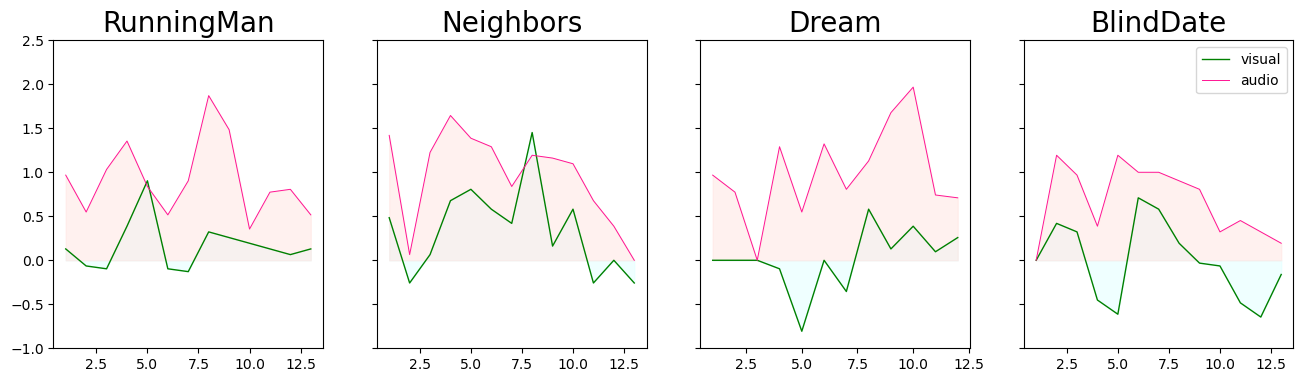

In [255]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = VA_avg_change_vis[story].index +1
    y1 = VA_avg_change_vis[story]
    y2 = VA_avg_change_aud[story]
    
    axes[pos].set_ylim([-1, 2.5])
    axes[pos].plot(x,y1, color='green', linewidth = 1.0,label = 'visual')
    axes[pos].fill_between(x, 0, y1, alpha=0.5, color = 'lightcyan')
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.7, label = 'audio')
    axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


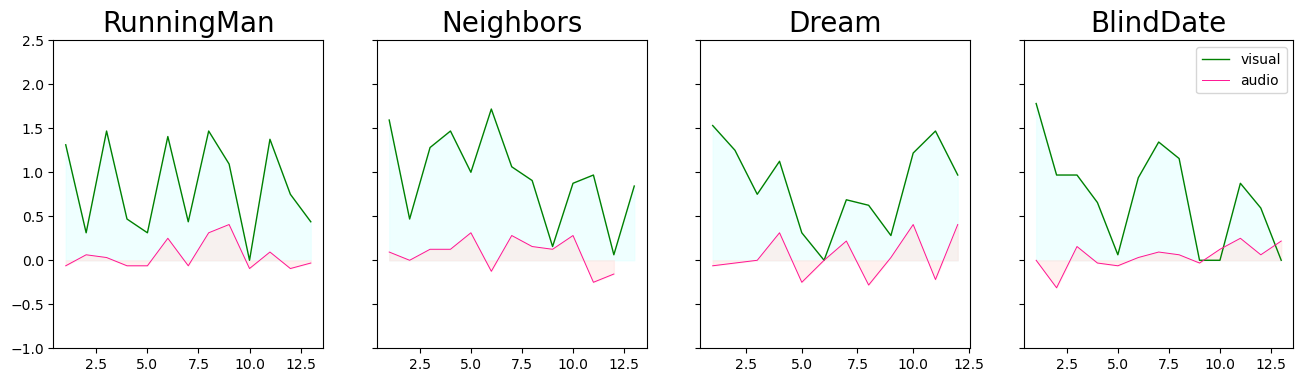

In [256]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = AV_avg_change_vis[story].index +1
    y1 = AV_avg_change_vis[story]
    y2 = AV_avg_change_aud[story]
    
    axes[pos].set_ylim([-1, 2.5])
    axes[pos].plot(x,y1, color='green', linewidth = 1.0 , label = 'visual')
    axes[pos].fill_between(x, 0, y1, alpha=0.5, color = 'lightcyan')
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.7, label = 'audio')
    axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

## Relative updating Change score

In [270]:
VA_relative_up_change, AV_relative_up_change = {}, {} 
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_relative_up_change[story] = VA_change_aud[story].values - VA_change_vis[story].values
    AV_relative_up_change[story] = AV_change_vis[story].values - AV_change_aud[story].values

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


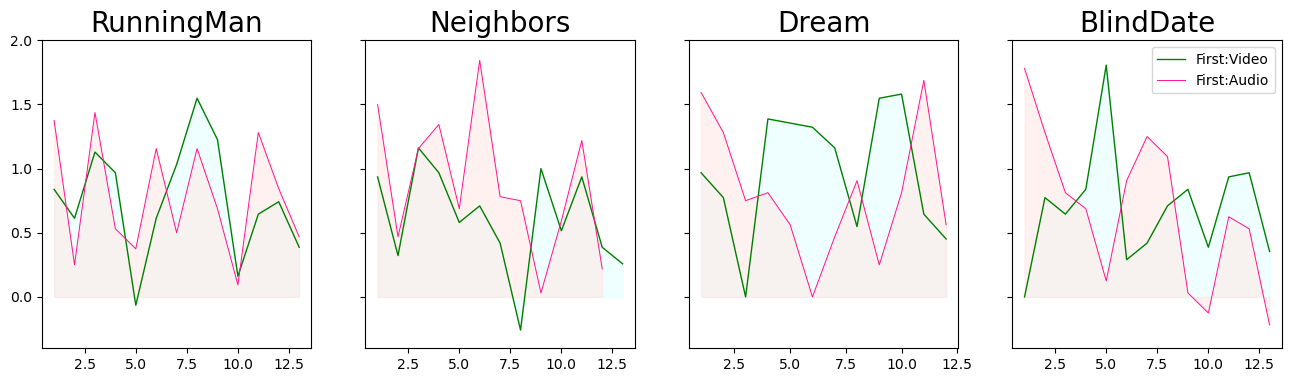

In [285]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = pd.DataFrame(VA_relative_up_change[story]).index +1 
    y1 = pd.DataFrame(VA_relative_up_change[story]).mean(axis=1)
    y2 = pd.DataFrame(AV_relative_up_change[story]).mean(axis=1)
    
    axes[pos].set_ylim([-0.4, 2])
    axes[pos].plot(x,y1, color='green', linewidth = 1.0, label = 'First:Video')
    axes[pos].fill_between(x, 0, y1, alpha=0.5, color = 'lightcyan' )
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.7, label = 'First:Audio')
    axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


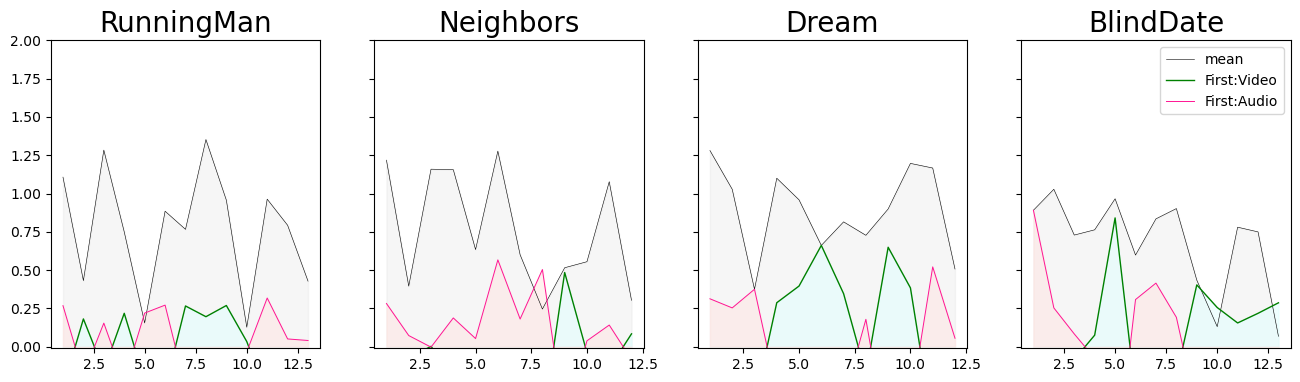

In [303]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = pd.DataFrame(VA_relative_up_change[story]).index +1 
    mean = (pd.DataFrame(VA_relative_up_change[story]).mean(axis=1) + pd.DataFrame(AV_relative_up_change[story]).mean(axis=1))/2
    y1 = pd.DataFrame(VA_relative_up_change[story]).mean(axis=1) - mean
    y2 = pd.DataFrame(AV_relative_up_change[story]).mean(axis=1) - mean
    
    axes[pos].set_ylim([-0.01, 2])
    axes[pos].plot(x,mean, color='black', linewidth = 0.4, label = 'mean')
    axes[pos].fill_between(x, 0, mean, alpha=0.2, color = 'lightgray' )
    axes[pos].plot(x,y1, color='green', linewidth = 1.0, label = 'First:Video')
    axes[pos].fill_between(x, 0, y1, alpha=0.5, color = 'lightcyan' )
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.7, label = 'First:Audio')
    axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

## Overall performance in time-course

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


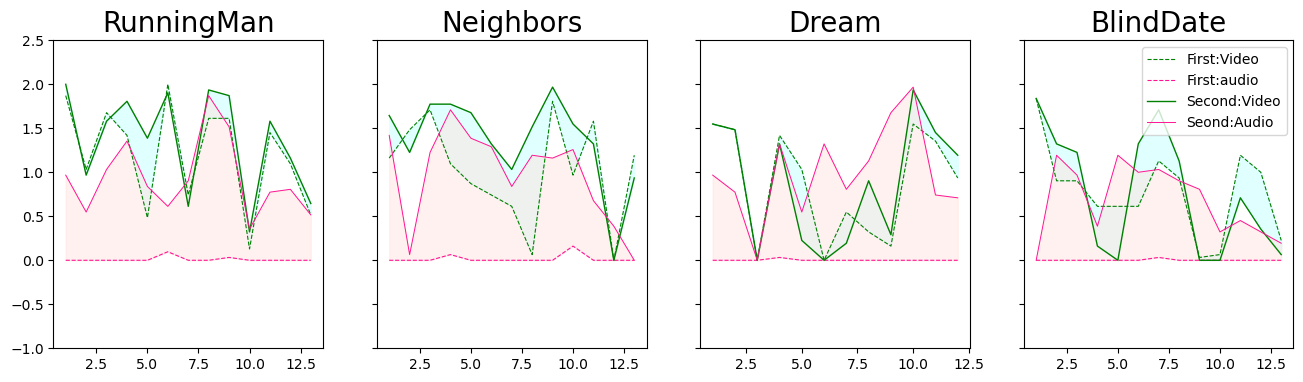

In [804]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = VA_first_vis[story].index +1 
    y1 = VA_first_vis[story].mean(axis=1)
    y2 = VA_first_aud[story].mean(axis=1) 
    y3 = VA_second_vis[story].mean(axis=1)
    y4 = VA_second_aud[story].mean(axis=1) 
    
    axes[pos].set_ylim([-1, 2.5])
    
    axes[pos].fill_between(x, y1, y3, alpha=1, color = 'lightcyan' )
    axes[pos].fill_between(x, y2, y4, alpha=0.5, color = 'mistyrose')
    axes[pos].plot(x,y1, color='green', linewidth = 0.8, linestyle = '--', label = 'First:Video')
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.8, linestyle = '--', label = 'First:audio')
    axes[pos].plot(x,y3, color='green', linewidth = 1.0, label = 'Second:Video')
    axes[pos].plot(x,y4, color='deeppink', linewidth = 0.7, label = 'Seond:Audio')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


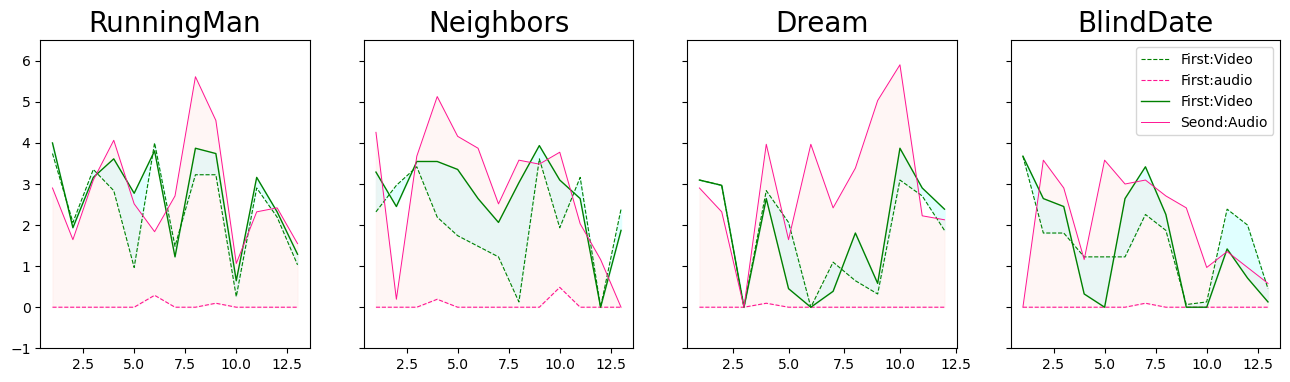

In [789]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = VA_first_vis[story].index +1 
    y1 = VA_first_vis[story].mean(axis=1) *2 
    y2 = VA_first_aud[story].mean(axis=1) *3 
    y3 = VA_second_vis[story].mean(axis=1) *2
    y4 = VA_second_aud[story].mean(axis=1) *3 
    
    axes[pos].set_ylim([-1, 6.5])
    axes[pos].plot(x,y1, color='green', linewidth = 0.8, linestyle = '--', label = 'First:Video')
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.8, linestyle = '--', label = 'First:audio')
    axes[pos].plot(x,y3, color='green', linewidth = 1.0, label = 'First:Video')
    axes[pos].fill_between(x, y1, y3, alpha=1, color = 'lightcyan' )
    axes[pos].plot(x,y4, color='deeppink', linewidth = 0.7, label = 'Seond:Audio')
    axes[pos].fill_between(x, y2, y4, alpha=0.3, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


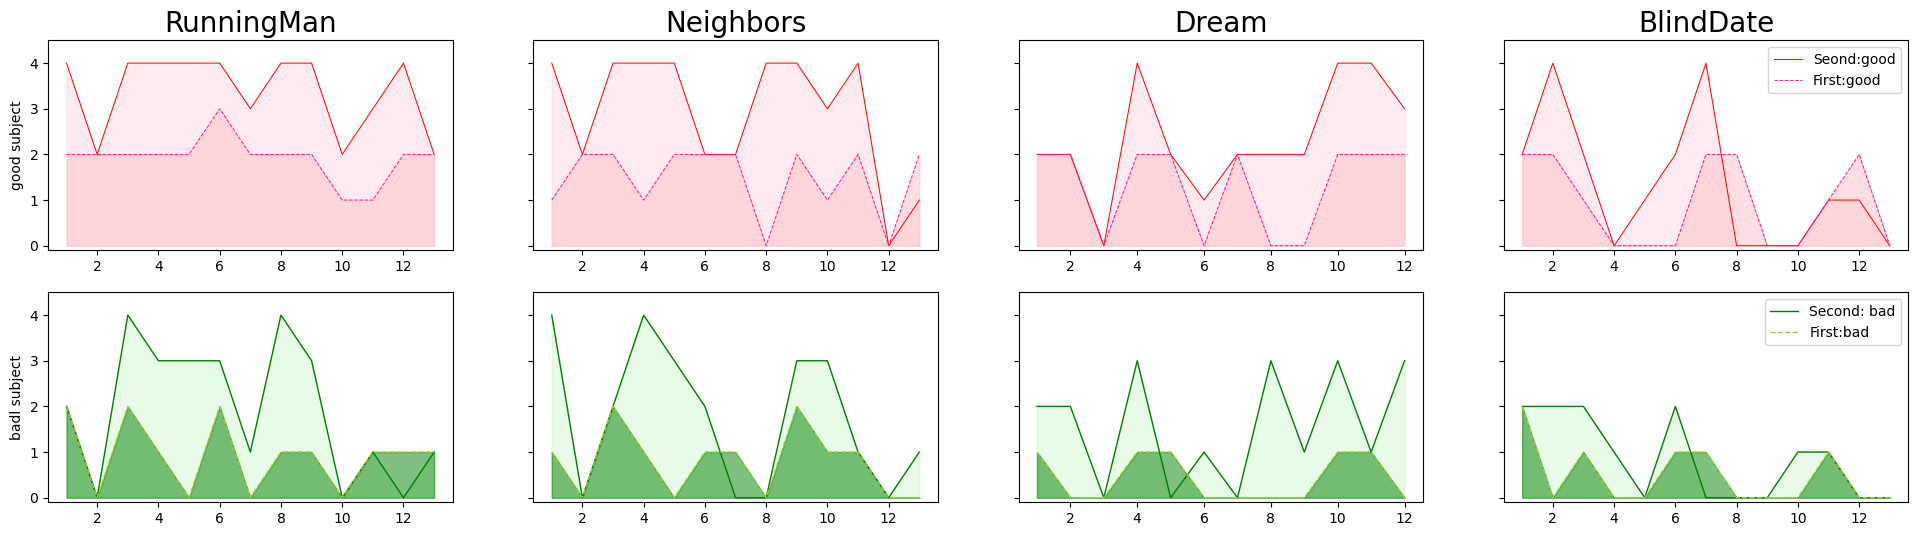

In [797]:
# sample of participants ( 10 == bad, 12 == good) #
#plt.rcParams['figure.figsize'] = (6, 6)
fig, axes = plt.subplots(2, 4, figsize = (24,6), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = VA_first_vis[story].index +1 
    y1 = VA_first_vis[story]['V10'] + VA_first_aud[story]['A10']
    y2 = VA_second_vis[story]['V10'] + VA_second_aud[story]['A10']
    
    y3 = VA_first_vis[story]['V12'] + VA_first_aud[story]['A12']
    y4 = VA_second_vis[story]['V12'] + VA_second_aud[story]['A12']
    
    axes[0, pos].set_ylim([-0.1, 4.5])
    axes[0, 0].set_ylabel('good subject')
    axes[1, 0].set_ylabel('badl subject')
    axes[0, pos].plot(x,y4, color='red', linewidth = 0.7, label = 'Seond:good')
    axes[0, pos].fill_between(x, 0, y4, alpha=0.3, color = 'pink')
    axes[1, pos].plot(x,y2, color='green', linewidth = 1.0,  label = 'Second: bad')
    axes[1, pos].fill_between(x, 0, y2, alpha=0.2, color = 'lightgreen' )
    axes[0, pos].plot(x,y3, color='deeppink', linewidth = 0.7, linestyle = '--', label = 'First:good')
    axes[0, pos].fill_between(x, 0, y3, alpha=0.5, color = 'pink')
    axes[1, pos].plot(x,y1, color='yellowgreen', linewidth = 1.0, linestyle = '--', label = 'First:bad')
    axes[1, pos].fill_between(x, 0, y1, alpha=0.5, color = 'green' )
    
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[0, pos].set_title(f'{story}', fontsize =20)
    axes[0, 3].legend()
    axes[1, 3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


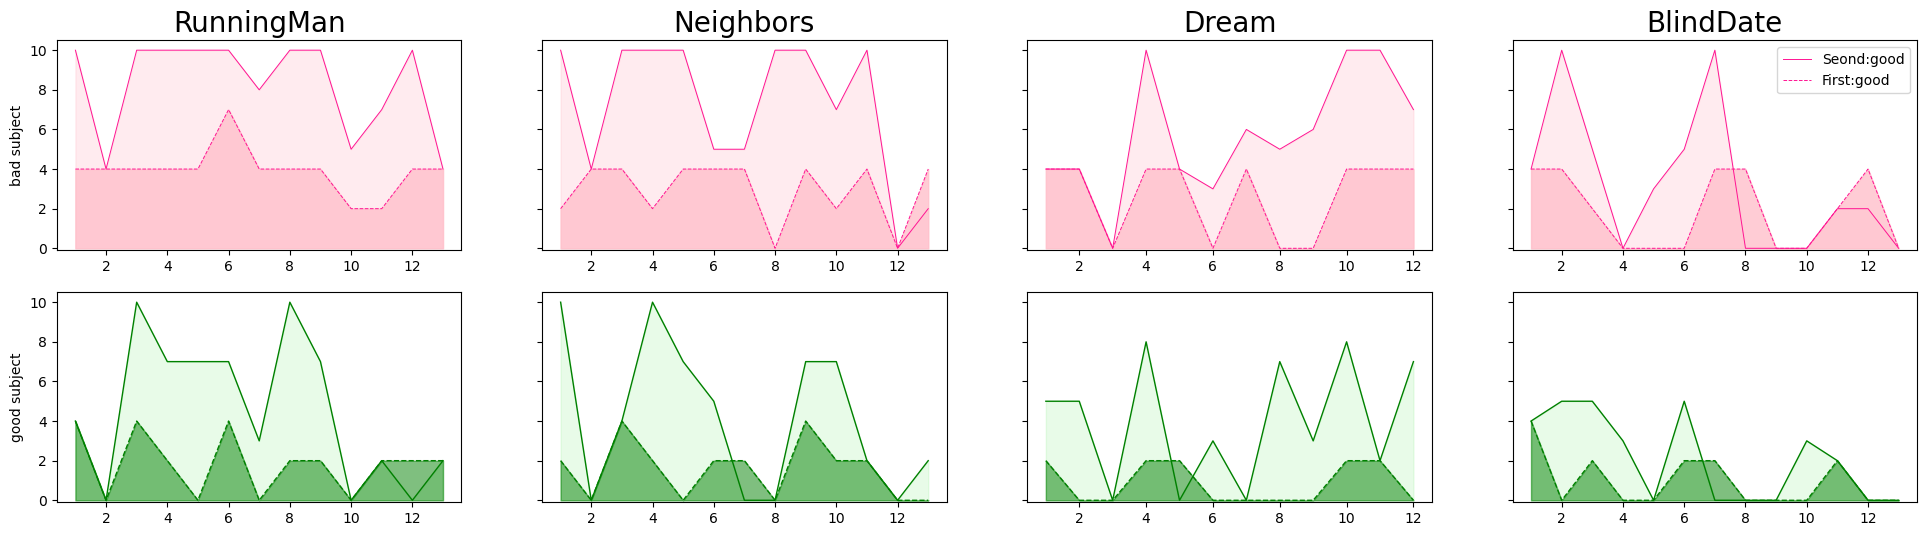

In [785]:
# sample of participants ( 10 == bad, 12 == good) #
#plt.rcParams['figure.figsize'] = (6, 6)
fig, axes = plt.subplots(2, 4, figsize = (24,6), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = VA_first_vis[story].index +1 
    y1 = (VA_first_vis[story]['V10']*2) + (VA_first_aud[story]['A10']*3)
    y2 = (VA_second_vis[story]['V10']*2) + (VA_second_aud[story]['A10']*3)
    
    y3 = (VA_first_vis[story]['V12']*2) + (VA_first_aud[story]['A12']*3)
    y4 = (VA_second_vis[story]['V12']*2) + (VA_second_aud[story]['A12']*3)
    
    axes[0, pos].set_ylim([-0.1, 10.5])
    axes[0, 0].set_ylabel('bad subject')
    axes[1, 0].set_ylabel('good subject')
    axes[0, pos].plot(x,y4, color='deeppink', linewidth = 0.7, label = 'Seond:good')
    axes[0, pos].fill_between(x, 0, y4, alpha=0.3, color = 'pink')
    axes[1, pos].plot(x,y2, color='green', linewidth = 1.0,  label = 'Second: bad')
    axes[1, pos].fill_between(x, 0, y2, alpha=0.2, color = 'lightgreen' )
    axes[0, pos].plot(x,y3, color='deeppink', linewidth = 0.7, linestyle = '--', label = 'First:good')
    axes[0, pos].fill_between(x, 0, y3, alpha=0.8, color = 'pink')
    axes[1, pos].plot(x,y1, color='green', linewidth = 1.0, linestyle = '--', label = 'First:bad')
    axes[1, pos].fill_between(x, 0, y1, alpha=0.5, color = 'green' )
    
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[0, pos].set_title(f'{story}', fontsize =20)
    axes[0, 3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


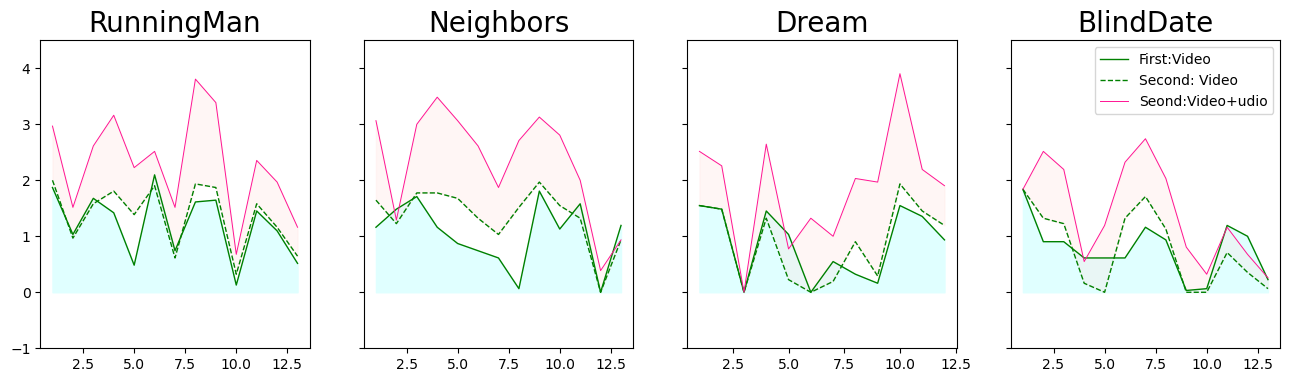

In [752]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = VA_first_vis[story].index +1 
    y1 = VA_first_vis[story].mean(axis=1)
    y2 = VA_first_vis[story].mean(axis=1)+VA_first_aud[story].mean(axis=1)
    y3 = VA_second_vis[story].mean(axis=1)
    y4 = VA_second_vis[story].mean(axis=1)+VA_second_aud[story].mean(axis=1)
    
    axes[pos].set_ylim([-1, 4.5])
    axes[pos].plot(x,y2, color='green', linewidth = 1.0, label = 'First:Video')
    axes[pos].fill_between(x, 0, y2, alpha=1, color = 'lightcyan' )
    axes[pos].plot(x,y3, color='green', linewidth = 1.0, linestyle = '--',  label = 'Second: Video')
    axes[pos].plot(x,y4, color='deeppink', linewidth = 0.7, label = 'Seond:Video+udio')
    axes[pos].fill_between(x, y3, y4, alpha=0.3, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


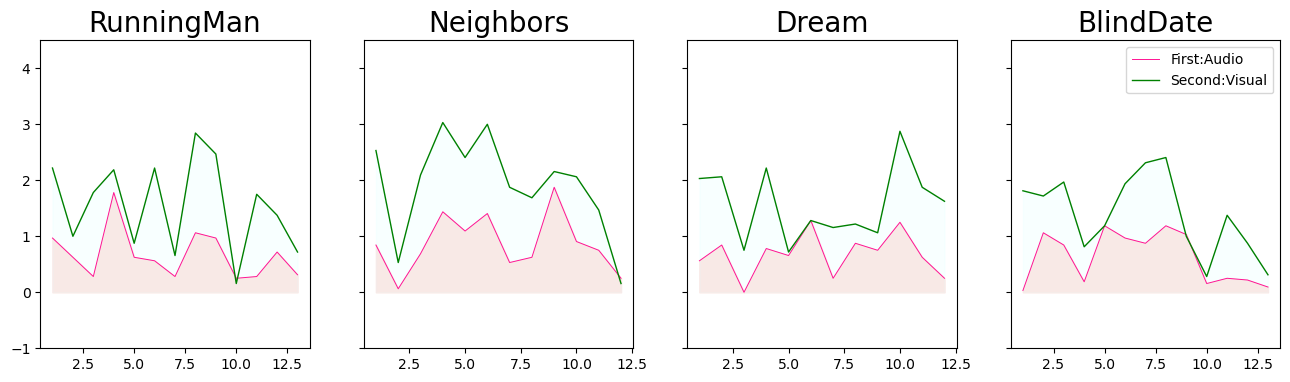

In [551]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = AV_first_vis[story].index +1 
    y1 = AV_first_vis[story].mean(axis=1)+AV_first_aud[story].mean(axis=1)
    y2 = AV_second_vis[story].mean(axis=1)+AV_second_aud[story].mean(axis=1)
    
    axes[pos].set_ylim([-1, 4.5])
    axes[pos].plot(x,y1, color='deeppink', linewidth = 0.7, label = 'First:Audio')
    axes[pos].fill_between(x, 0, y1, alpha=1, color = 'mistyrose')
    axes[pos].plot(x,y2, color='green', linewidth = 1.0, label = 'Second:Visual')
    axes[pos].fill_between(x, 0, y2, alpha=0.2, color = 'lightcyan' )
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

In [311]:
VA_first, VA_second = {}, {} 
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_first = (VA_first_vis[story].values + VA_first_aud[story].values)/2
    VA_second = (VA_second_vis[story].values + VA_second_aud[story].values)/2
    AV_first = (AV_first_vis[story].values + AV_first_aud[story].values)/2
    AV_second = (AV_second_vis[story].values + AV_second_aud[story].values)/2
    
    modality_vis = {"visAud":pd.DataFrame(VA_first).mean(axis=1),"audVis":pd.DataFrame(AV_second).mean(axis=1)}
    modality_aud= {"visAud":pd.DataFrame(VA_second).mean(axis=1),"audVis":pd.DataFrame(AV_first).mean(axis=1)}
    
    encoding1 =  {"visAud":pd.DataFrame(VA_first).mean(axis=1),"audVis":pd.DataFrame(VA_second).mean(axis=1)}
    encoding2 =  {"visAud":pd.DataFrame(AV_first).mean(axis=1),"audVis":pd.DataFrame(AV_second).mean(axis=1)}
    
    modality_vis = pd.DataFrame(modality_vis)
    modality_aud = pd.DataFrame(modality_aud)
    encoding1 = pd.DataFrame(encoding1)
    encoding2 = pd.DataFrame(encoding2)
    print(f'---{story}----')
    print(f'---visaul----')
    print(modality_vis.corr(method='pearson'))
    print(f'---audio----')
    print(modality_aud.corr(method='pearson'))
    print(f'---1st encoding----')
    print(encoding1.corr(method='pearson'))
    print(f'---2nd encoding----')
    print(encoding2.corr(method='pearson'))

---RunningMan----
---visaul----
          visAud    audVis
visAud  1.000000  0.901776
audVis  0.901776  1.000000
---audio----
          visAud    audVis
visAud  1.000000  0.684267
audVis  0.684267  1.000000
---1st encoding----
          visAud    audVis
visAud  1.000000  0.786497
audVis  0.786497  1.000000
---2nd encoding----
          visAud    audVis
visAud  1.000000  0.624828
audVis  0.624828  1.000000
---Neighbors----
---visaul----
          visAud    audVis
visAud  1.000000  0.233091
audVis  0.233091  1.000000
---audio----
          visAud    audVis
visAud  1.000000  0.740616
audVis  0.740616  1.000000
---1st encoding----
          visAud    audVis
visAud  1.000000  0.321328
audVis  0.321328  1.000000
---2nd encoding----
         visAud   audVis
visAud  1.00000  0.77617
audVis  0.77617  1.00000
---Dream----
---visaul----
          visAud    audVis
visAud  1.000000  0.785185
audVis  0.785185  1.000000
---audio----
          visAud    audVis
visAud  1.000000  0.605159
audVis  0.6051

## Overall performance SECOND ENCODING

In [809]:
# 2nd encoding variables 
re_VA_first_overall, re_VA_second_overall = {}, {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    re_VA_first_overall[story] = pd.DataFrame((VA_first_vis[story].values)*2 + (VA_first_aud[story].values)*3)
    re_VA_second_overall[story] = pd.DataFrame((VA_second_vis[story].values)*2 + (VA_second_aud[story].values)*3)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


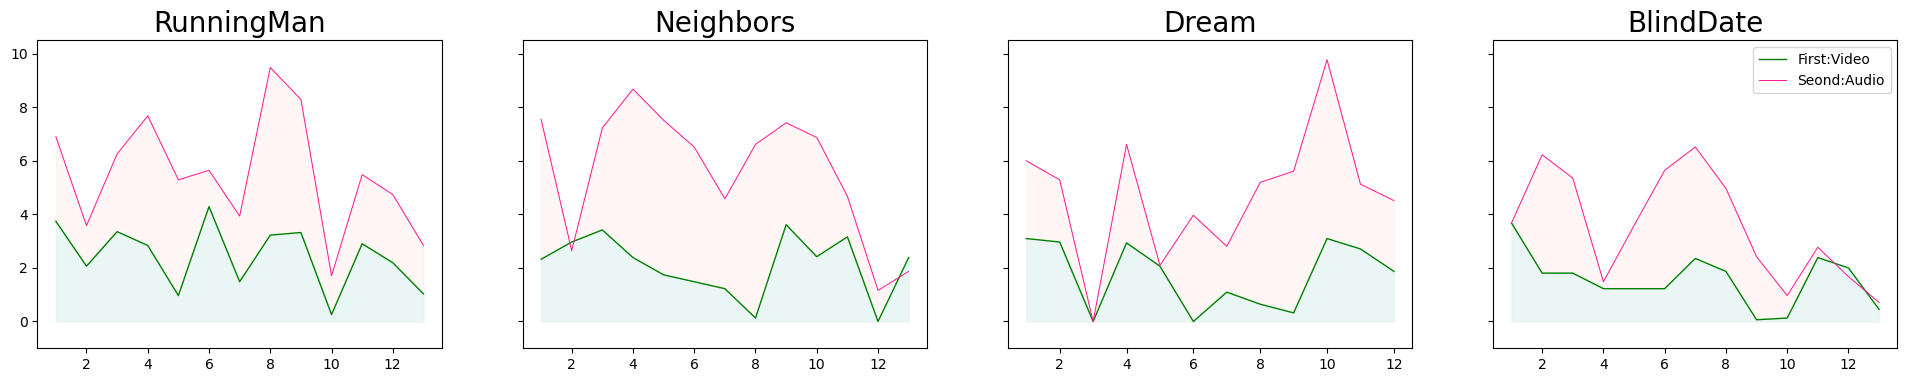

In [812]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (24,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_first_overall[story].index +1 
    y1 = re_VA_first_overall[story].mean(axis=1)
    y2 = re_VA_second_overall[story].mean(axis=1)
    
    axes[pos].set_ylim([-1, 10.5])
    axes[pos].plot(x,y1, color='green', linewidth = 1.0, label = 'First:Video')
    axes[pos].fill_between(x, 0, y1, alpha=1, color = 'lightcyan' )
    axes[pos].plot(x,y2, color='deeppink', linewidth = 0.7, label = 'Seond:Audio')
    axes[pos].fill_between(x, 0, y2, alpha=0.3, color = 'mistyrose')
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


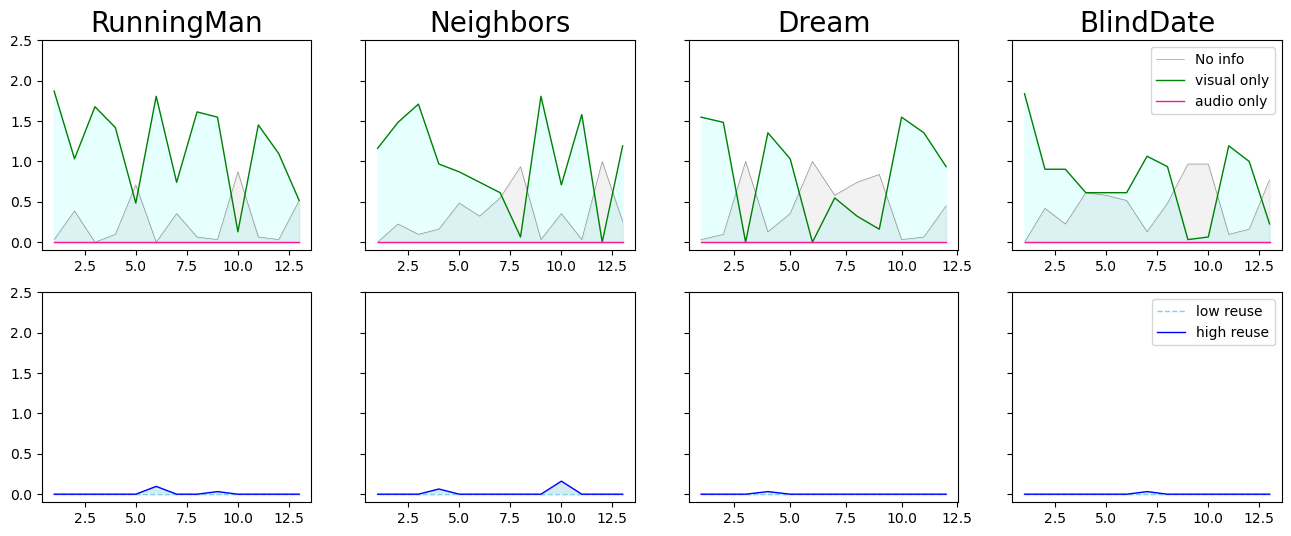

In [838]:
# 두 번째 변수 인코딩
re_VA_first_overalla, re_VA_first_overallb, re_VA_first_overallc, re_VA_first_overalld, re_VA_first_overalle = {}, {},{},{},{}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    df = re_VA_first_overall[story]
    # 2보다 작은 경우 (no memory) 
    re_VA_first_overalla[story] = df.applymap(lambda x: 1 if x < 2 else 0)

    # visual info : x == 2 & 4 
    vis2 = df.applymap(lambda x: 1 if x == 2 else 0)
    vis4 = df.applymap(lambda x: 2 if x == 4 else 0)
    re_VA_first_overallb[story] = pd.DataFrame(vis2.values + vis4.values)

    # audio info : X == 3 & 6 
    aud3 =  df.applymap(lambda x: 1 if x == 3 else 0)
    aud6 = df.applymap(lambda x: 2 if x == 6 else 0)
    re_VA_first_overallc[story] = pd.DataFrame(aud3.values + aud6.values)
    
    # low reuse & integ : x == 5 , 8 
    reuse5 = df.applymap(lambda x: 1 if x == 5 else 0)
    reuse8 = df.applymap(lambda x: 2 if x == 8 else 0)
    re_VA_first_overalld[story] = pd.DataFrame(reuse5.values + reuse8.values)
    #re_VA_first_overalld[story] = VA_first_overall.applymap(lambda x: 1 if x == 3 elif x == 6 else 0)

    # high reuse & integ: x == 7, 10
    reuse7 = df.applymap(lambda x: 1 if x == 7 else 0)
    reuse10 = df.applymap(lambda x: 2 if x == 10 else 0)
    re_VA_first_overalle[story] = pd.DataFrame(reuse7.values + reuse10.values)
    # re_VA_first_overalle[story] = VA_first_overall.applymap(lambda x: 1 if x == 3 elif x == 6 else 0)
    
    
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(2, 4, figsize = (16,6), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_first_overalla[story].index +1 
    y1 = re_VA_first_overalla[story].mean(axis=1)
    y2 = re_VA_first_overallb[story].mean(axis=1) 
    y3 = re_VA_first_overallc[story].mean(axis=1) 
    y4 = re_VA_first_overalld[story].mean(axis=1)
    y5 = re_VA_first_overalle[story].mean(axis=1)
    
    axes[0, pos].set_ylim([-0.1, 2.5])
    axes[1, pos].set_ylim([-0.1, 2.5])
    
    axes[0,pos].fill_between(x, 0, y3, alpha=0.8, color = 'mistyrose' )
    axes[0,pos].fill_between(x, 0, y2, alpha=0.8, color = 'lightcyan' )
    axes[0,pos].fill_between(x, 0, y1, alpha=0.1, color = 'gray')
    axes[0,pos].plot(x,y1, color='gray', linewidth = 0.4, label = 'No info')
    axes[0,pos].plot(x,y2, color='green', linewidth = 1.0, label = 'visual only')
    axes[0,pos].plot(x,y3, color='deeppink', linewidth = 1.0, label = 'audio only')
    
    axes[1,pos].fill_between(x, 0, y5, alpha=0.5, color = 'lightblue' )
    axes[1,pos].fill_between(x, 0, y4, alpha=1, color = 'lightcyan')
    axes[1,pos].plot(x,y4, color='skyblue', linewidth = 1, linestyle = '--', label = 'low reuse')
    axes[1,pos].plot(x,y5, color='blue', linewidth = 1.0, label = 'high reuse')
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[0,pos].set_title(f'{story}', fontsize =20)
    axes[0,3].legend()
    axes[1,3].legend()
    

In [853]:
re_VA_first_overallb[story]

0  1
0   2  2
1   1  2
2   2  1
3   2  2
4   2  0
5   2  2
6   2  0
7   1  0
8   2  1
9   0  0
10  1  1
11  1  0
12  1  0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


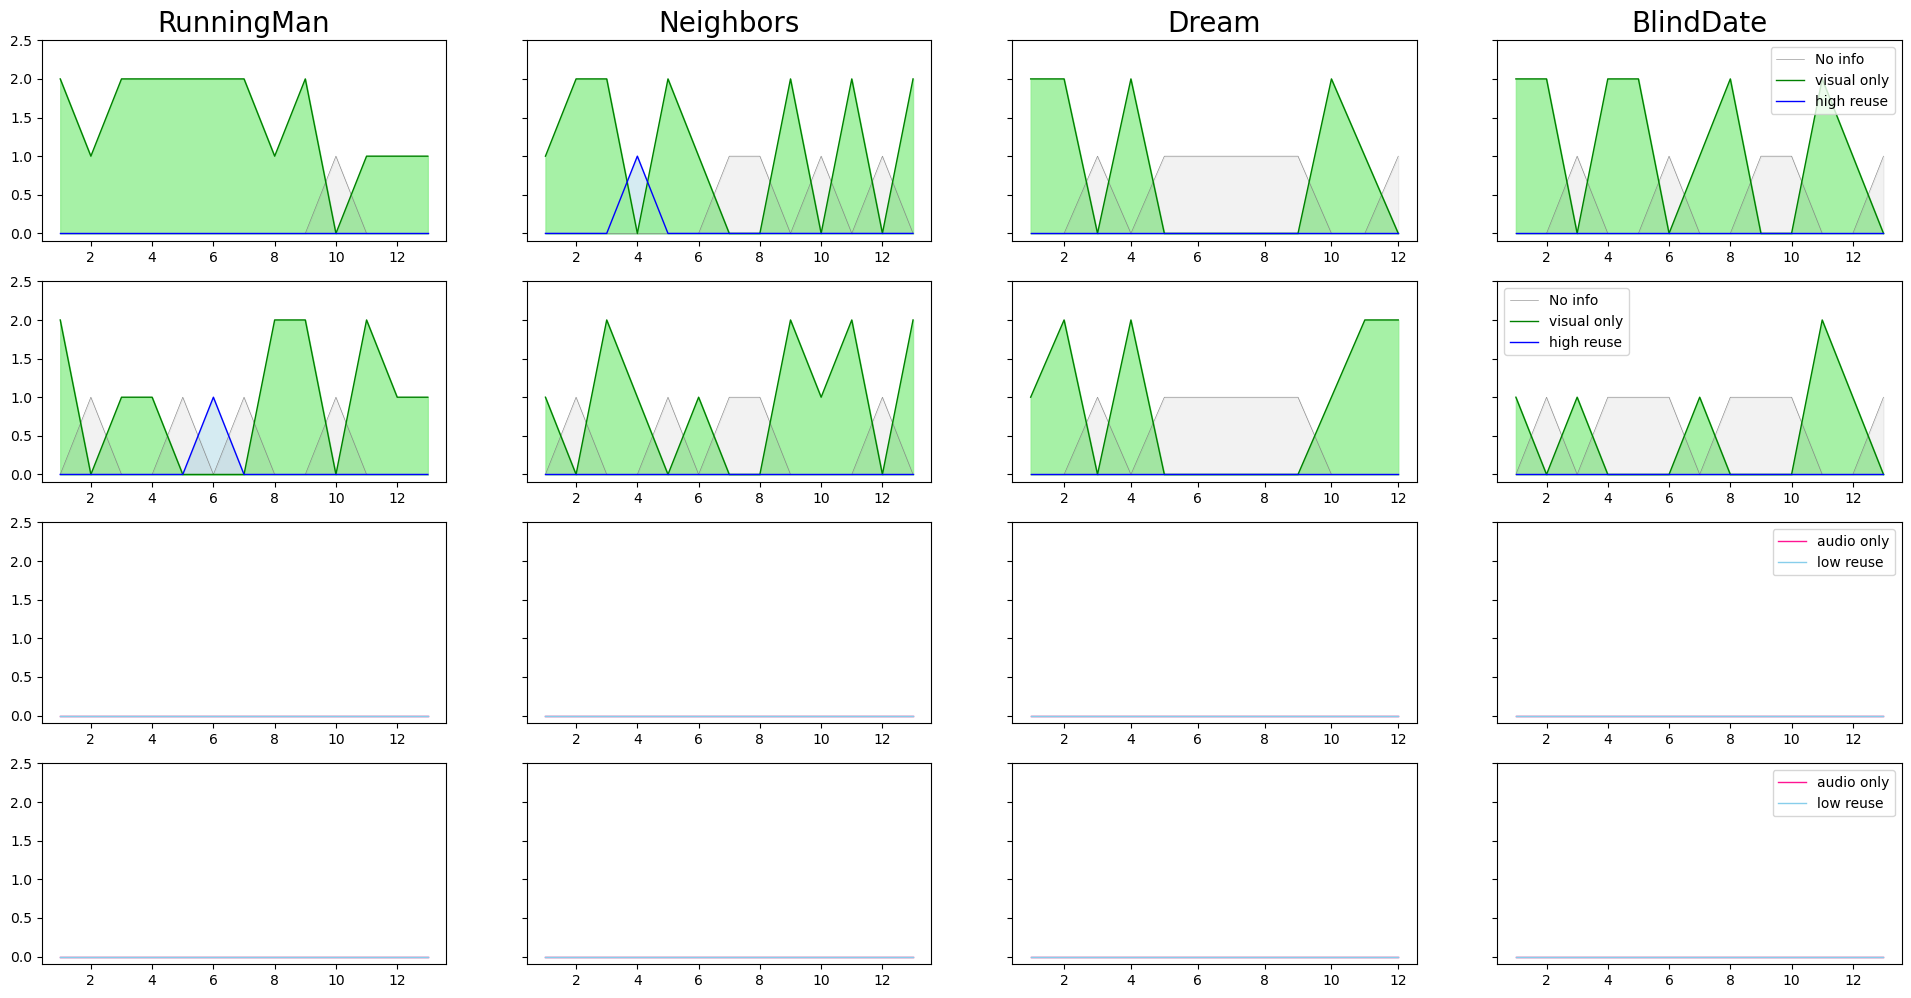

In [888]:
# 두 번째 변수 인코딩
re_VA_first_overalla, re_VA_first_overallb, re_VA_first_overallc, re_VA_first_overalld, re_VA_first_overalle = {}, {},{},{},{}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:    
    df = re_VA_first_overall[story][[9,11]] 
    
    # 2보다 작은 경우 (no memory) 
    re_VA_first_overalla[story] = df.applymap(lambda x: 1 if x < 2 else 0)

    # visual info : x == 2 & 4 
    vis2 = df.applymap(lambda x: 1 if x == 2 else 0)
    vis4 = df.applymap(lambda x: 2 if x == 4 else 0)
    re_VA_first_overallb[story] = pd.DataFrame(vis2.values + vis4.values, columns = [9,11])

    # audio info : X == 3 & 6 
    aud3 =  df.applymap(lambda x: 1 if x == 3 else 0)
    aud6 = df.applymap(lambda x: 2 if x == 6 else 0)
    re_VA_first_overallc[story] = pd.DataFrame(aud3.values + aud6.values, columns = [9,11])
    
    # low reuse & integ : x == 5 , 8 
    reuse5 = df.applymap(lambda x: 1 if x == 5 else 0)
    reuse8 = df.applymap(lambda x: 2 if x == 8 else 0)
    re_VA_first_overalld[story] = pd.DataFrame(reuse5.values + reuse8.values, columns = [9,11])
    #re_VA_first_overalld[story] = VA_first_overall.applymap(lambda x: 1 if x == 3 elif x == 6 else 0)

    # high reuse & integ: x == 7, 10
    reuse7 = df.applymap(lambda x: 1 if x == 7 else 0)
    reuse10 = df.applymap(lambda x: 2 if x == 10 else 0)
    re_VA_first_overalle[story] = pd.DataFrame(reuse7.values + reuse10.values, columns = [9,11])
    # re_VA_first_overalle[story] = VA_first_overall.applymap(lambda x: 1 if x == 3 elif x == 6 else 0)
    
    
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(4, 4, figsize = (24,12), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_first_overalla[story].index +1 
    y1 = re_VA_first_overalla[story][9]
    y2 = re_VA_first_overallb[story][9]
    y3 = re_VA_first_overallc[story][9]
    y4 = re_VA_first_overalld[story][9]
    y5 = re_VA_first_overalle[story][9]
    
    y6 = re_VA_first_overalla[story][11]
    y7 = re_VA_first_overallb[story][11]
    y8 = re_VA_first_overallc[story][11]
    y9 = re_VA_first_overalld[story][11]
    y10 = re_VA_first_overalle[story][11]
    
    axes[0, pos].set_ylim([-0.1, 2.5])
    axes[1, pos].set_ylim([-0.1, 2.5])
    axes[2, pos].set_ylim([-0.1, 2.5])
    axes[3, pos].set_ylim([-0.1, 2.5])
    
    axes[0,pos].fill_between(x, 0, y5, alpha=0.5, color = 'lightblue' )
    axes[0,pos].fill_between(x, 0, y2, alpha=0.8, color = 'lightgreen' )
    axes[0,pos].fill_between(x, 0, y1, alpha=0.1, color = 'gray')
    axes[0,pos].plot(x,y1, color='gray', linewidth = 0.4, label = 'No info')
    axes[0,pos].plot(x,y2, color='green', linewidth = 1.0, label = 'visual only')
    axes[0,pos].plot(x,y5, color='blue', linewidth = 1.0, label = 'high reuse')
    
    axes[2,pos].fill_between(x, 0, y4, alpha=1, color = 'lightcyan')
    axes[2,pos].fill_between(x, 0, y3, alpha=0.8, color = 'mistyrose' )
    axes[2,pos].plot(x,y3, color='deeppink', linewidth = 1.0, label = 'audio only')
    axes[2,pos].plot(x,y4, color='skyblue', linewidth = 1, label = 'low reuse')
    
    axes[1,pos].fill_between(x, 0, y10, alpha=0.5, color = 'lightblue' )
    axes[1,pos].fill_between(x, 0, y7, alpha=0.8, color = 'lightgreen' )
    axes[1,pos].fill_between(x, 0, y6, alpha=0.1, color = 'gray')
    axes[1,pos].plot(x,y6, color='gray', linewidth = 0.4, label = 'No info')
    axes[1,pos].plot(x,y7, color='green', linewidth = 1.0, label = 'visual only')
    axes[1,pos].plot(x,y10, color='blue', linewidth = 1.0, label = 'high reuse')
    
    
    axes[3,pos].fill_between(x, 0, y9, alpha=1, color = 'lightcyan')
    axes[3,pos].fill_between(x, 0, y8, alpha=0.8, color = 'mistyrose' )
    axes[3,pos].plot(x,y8, color='deeppink', linewidth = 1.0, label = 'audio only')
    axes[3,pos].plot(x,y9, color='skyblue', linewidth = 1, label = 'low reuse')
 
    
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[0,pos].set_title(f'{story}', fontsize =20)
    axes[0,3].legend()
    axes[1,3].legend()
    axes[2,3].legend()
    axes[3,3].legend()
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


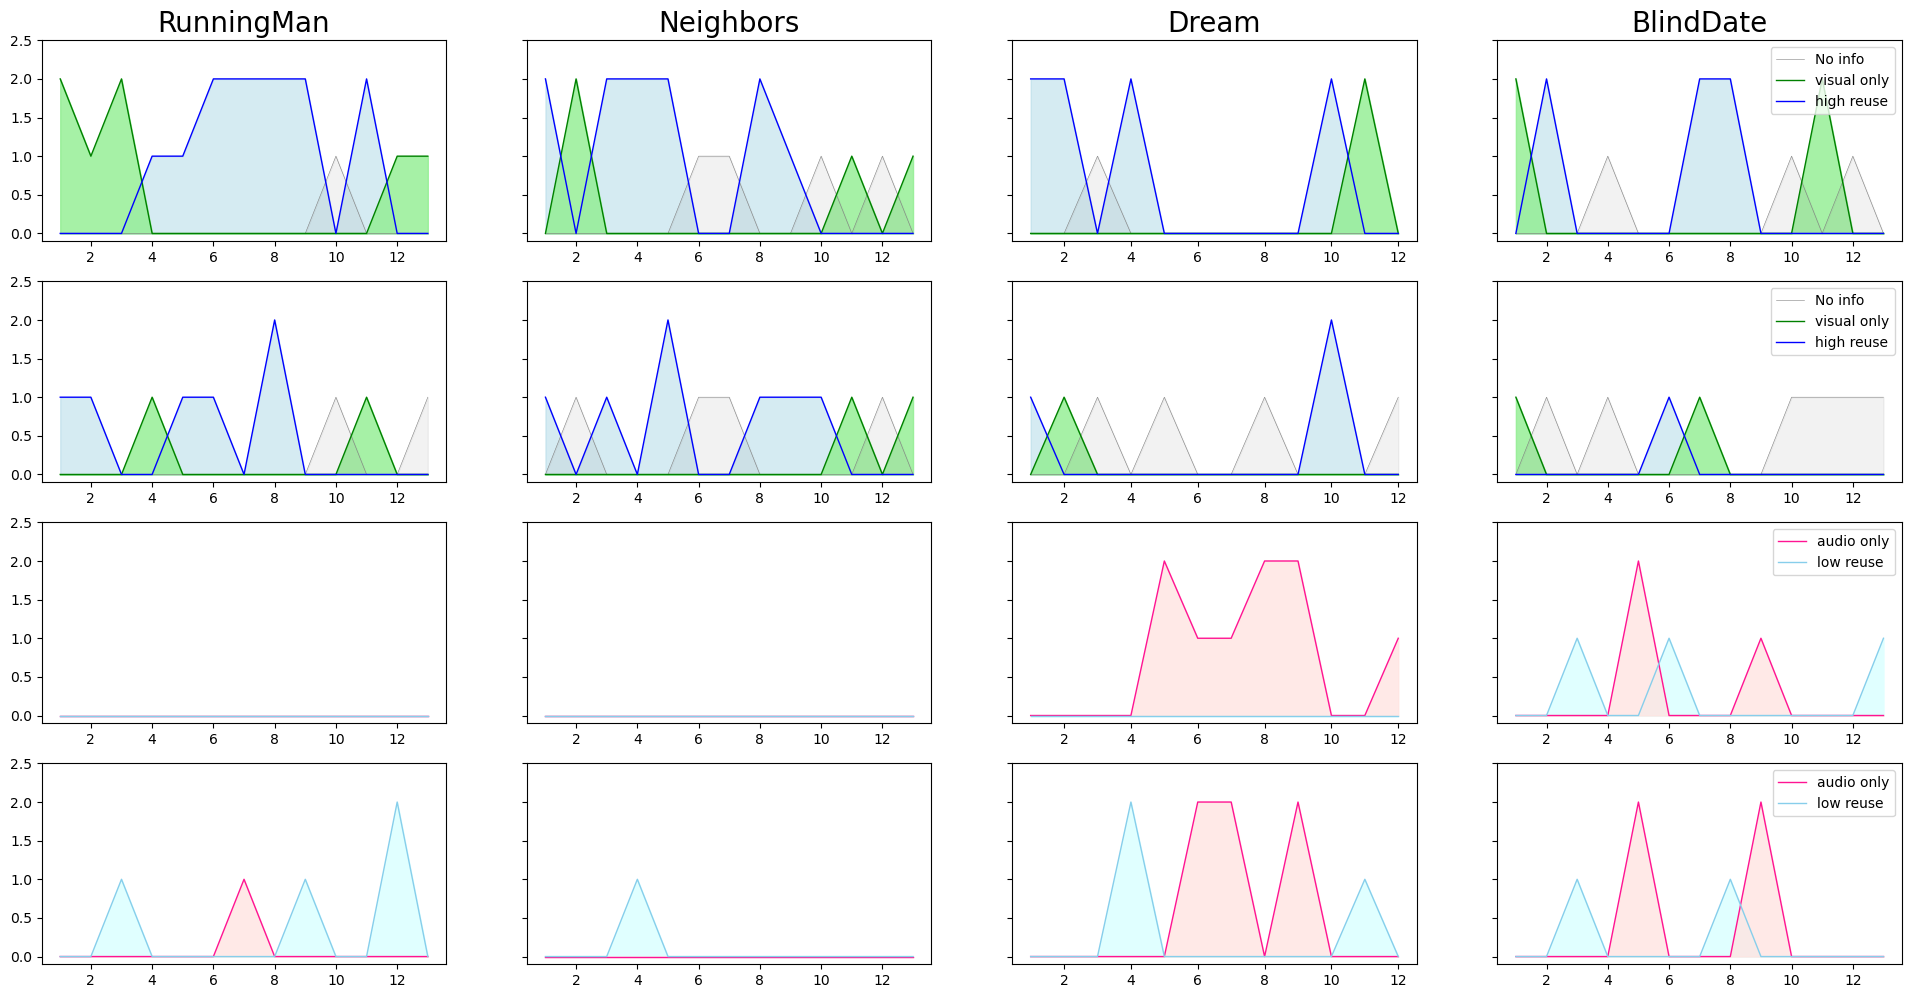

In [890]:
# 두 번째 변수 인코딩
sub = [9,12]
re_VA_second_overalla, re_VA_second_overallb, re_VA_second_overallc ,re_VA_second_overalld, re_VA_second_overalle = {}, {},{}, {}, {} 
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:    
    df = re_VA_second_overall[story][sub] 
    
    # 2보다 작은 경우 (no memory) 
    re_VA_second_overalla[story] = df.applymap(lambda x: 1 if x < 2 else 0)

    # visual info : x == 2 & 4 
    vis2 = df.applymap(lambda x: 1 if x == 2 else 0)
    vis4 = df.applymap(lambda x: 2 if x == 4 else 0)
    re_VA_second_overallb[story] = pd.DataFrame(vis2.values + vis4.values, columns = sub)

    # audio info : X == 3 & 6 
    aud3 =  df.applymap(lambda x: 1 if x == 3 else 0)
    aud6 = df.applymap(lambda x: 2 if x == 6 else 0)
    re_VA_second_overallc[story] = pd.DataFrame(aud3.values + aud6.values, columns = sub)
    
    # low reuse & integ : x == 5 , 8 
    reuse5 = df.applymap(lambda x: 1 if x == 5 else 0)
    reuse8 = df.applymap(lambda x: 2 if x == 8 else 0)
    re_VA_second_overalld[story] = pd.DataFrame(reuse5.values + reuse8.values, columns = sub)

    # high reuse & integ: x == 7, 10
    reuse7 = df.applymap(lambda x: 1 if x == 7 else 0)
    reuse10 = df.applymap(lambda x: 2 if x == 10 else 0)
    re_VA_second_overalle[story] = pd.DataFrame(reuse7.values + reuse10.values, columns = sub)    
    
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(4, 4, figsize = (24,12), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_second_overalla[story].index +1 
    y1 = re_VA_second_overalla[story][sub[0]]
    y2 = re_VA_second_overallb[story][sub[0]]
    y3 = re_VA_second_overallc[story][sub[0]]
    y4 = re_VA_second_overalld[story][sub[0]]
    y5 = re_VA_second_overalle[story][sub[0]]
    
    y6 = re_VA_second_overalla[story][sub[1]]
    y7 = re_VA_second_overallb[story][sub[1]]
    y8 = re_VA_second_overallc[story][sub[1]]
    y9 = re_VA_second_overalld[story][sub[1]]
    y10 = re_VA_second_overalle[story][sub[1]]
    
    axes[0, pos].set_ylim([-0.1, 2.5])
    axes[1, pos].set_ylim([-0.1, 2.5])
    axes[2, pos].set_ylim([-0.1, 2.5])
    axes[3, pos].set_ylim([-0.1, 2.5])
    
    axes[0,pos].fill_between(x, 0, y5, alpha=0.5, color = 'lightblue' )
    axes[0,pos].fill_between(x, 0, y2, alpha=0.8, color = 'lightgreen' )
    axes[0,pos].fill_between(x, 0, y1, alpha=0.1, color = 'gray')
    axes[0,pos].plot(x,y1, color='gray', linewidth = 0.4, label = 'No info')
    axes[0,pos].plot(x,y2, color='green', linewidth = 1.0, label = 'visual only')
    axes[0,pos].plot(x,y5, color='blue', linewidth = 1.0, label = 'high reuse')
    
    
    axes[2,pos].fill_between(x, 0, y4, alpha=1, color = 'lightcyan')
    axes[2,pos].fill_between(x, 0, y3, alpha=0.8, color = 'mistyrose' )
    axes[2,pos].plot(x,y3, color='deeppink', linewidth = 1.0, label = 'audio only')
    axes[2,pos].plot(x,y4, color='skyblue', linewidth = 1, label = 'low reuse')
    
    axes[1,pos].fill_between(x, 0, y10, alpha=0.5, color = 'lightblue' )
    axes[1,pos].fill_between(x, 0, y7, alpha=0.8, color = 'lightgreen' )
    axes[1,pos].fill_between(x, 0, y6, alpha=0.1, color = 'gray')
    axes[1,pos].plot(x,y6, color='gray', linewidth = 0.4, label = 'No info')
    axes[1,pos].plot(x,y7, color='green', linewidth = 1.0, label = 'visual only')
    axes[1,pos].plot(x,y10, color='blue', linewidth = 1.0, label = 'high reuse')

    
    axes[3,pos].fill_between(x, 0, y9, alpha=1, color = 'lightcyan')
    axes[3,pos].fill_between(x, 0, y8, alpha=0.8, color = 'mistyrose' )
    axes[3,pos].plot(x,y8, color='deeppink', linewidth = 1.0, label = 'audio only')
    axes[3,pos].plot(x,y9, color='skyblue', linewidth = 1,label = 'low reuse')
    
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[0,pos].set_title(f'{story}', fontsize =20)
    axes[0,3].legend(loc = 'upper right')
    axes[1,3].legend()
    axes[2,3].legend()
    axes[3,3].legend()
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


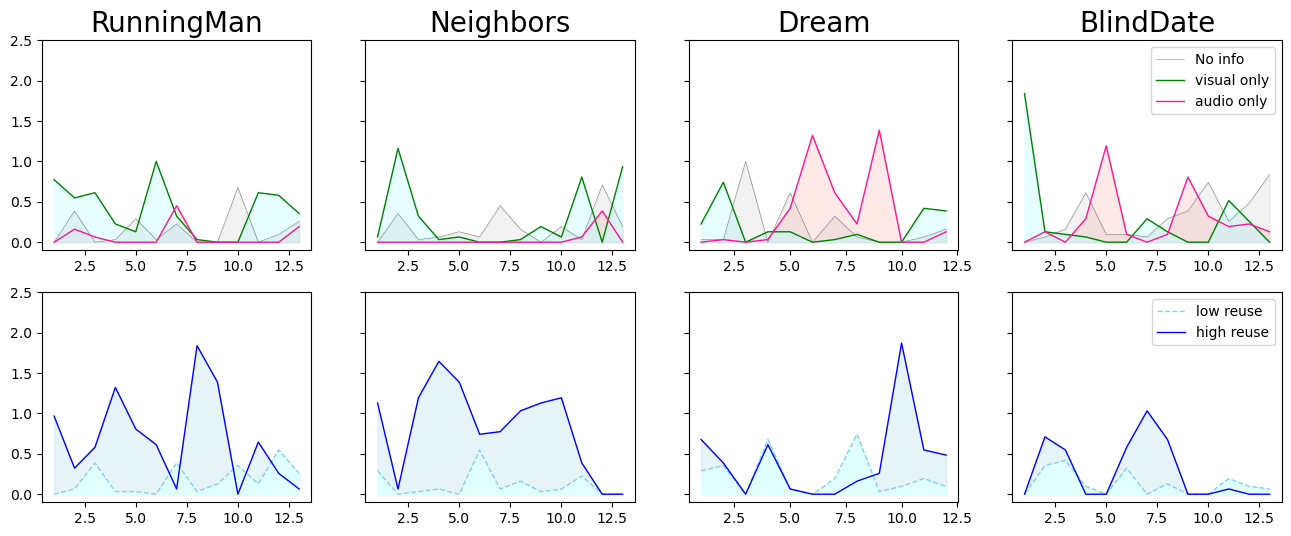

In [856]:
# 두 번째 변수 인코딩
re_VA_second_overalla, re_VA_second_overallb, re_VA_second_overallc ,re_VA_second_overalld, re_VA_second_overalle = {}, {},{}, {}, {} 

for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    
    df = re_VA_second_overall[story]
    # 2보다 작은 경우 (no memory) 
    re_VA_first_overalla[story] = df.applymap(lambda x: 1 if x < 2 else 0)

    # visual info : x == 2 & 4 
    vis2 = df.applymap(lambda x: 1 if x == 2 else 0)
    vis4 = df.applymap(lambda x: 2 if x == 4 else 0)
    re_VA_first_overallb[story] = pd.DataFrame(vis2.values + vis4.values)

    # audio info : X == 3 & 6 
    aud3 =  df.applymap(lambda x: 1 if x == 3 else 0)
    aud6 = df.applymap(lambda x: 2 if x == 6 else 0)
    re_VA_first_overallc[story] = pd.DataFrame(aud3.values + aud6.values)
    
    # low reuse & integ : x == 5 , 8 
    reuse5 = df.applymap(lambda x: 1 if x == 5 else 0)
    reuse8 = df.applymap(lambda x: 2 if x == 8 else 0)
    re_VA_first_overalld[story] = pd.DataFrame(reuse5.values + reuse8.values)
    #re_VA_first_overalld[story] = VA_first_overall.applymap(lambda x: 1 if x == 3 elif x == 6 else 0)

    # high reuse & integ: x == 7, 10
    reuse7 = df.applymap(lambda x: 1 if x == 7 else 0)
    reuse10 = df.applymap(lambda x: 2 if x == 10 else 0)
    re_VA_first_overalle[story] = pd.DataFrame(reuse7.values + reuse10.values)
    # re_VA_first_overalle[story] = VA_first_overall.applymap(lambda x: 1 if x == 3 elif x == 6 else 0)
    
    
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(2, 4, figsize = (16,6), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_first_overalla[story].index +1 
    y1 = re_VA_first_overalla[story].mean(axis=1)
    y2 = re_VA_first_overallb[story].mean(axis=1) 
    y3 = re_VA_first_overallc[story].mean(axis=1) 
    y4 = re_VA_first_overalld[story].mean(axis=1)
    y5 = re_VA_first_overalle[story].mean(axis=1)
    
    axes[0, pos].set_ylim([-0.1, 2.5])
    axes[1, pos].set_ylim([-0.1, 2.5])
    
    axes[0,pos].fill_between(x, 0, y3, alpha=0.8, color = 'mistyrose' )
    axes[0,pos].fill_between(x, 0, y2, alpha=0.8, color = 'lightcyan' )
    axes[0,pos].fill_between(x, 0, y1, alpha=0.1, color = 'gray')
    axes[0,pos].plot(x,y1, color='gray', linewidth = 0.4, label = 'No info')
    axes[0,pos].plot(x,y2, color='green', linewidth = 1.0, label = 'visual only')
    axes[0,pos].plot(x,y3, color='deeppink', linewidth = 1.0, label = 'audio only')
    
    axes[1,pos].fill_between(x, 0, y5, alpha=0.3, color = 'lightblue' )
    axes[1,pos].fill_between(x, 0, y4, alpha=1, color = 'lightcyan')
    axes[1,pos].plot(x,y4, color='skyblue', linewidth = 1, linestyle = '--', label = 'low reuse')
    axes[1,pos].plot(x,y5, color='blue', linewidth = 1.0, label = 'high reuse')
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[0,pos].set_title(f'{story}', fontsize =20)
    axes[0,3].legend()
    axes[1,3].legend()
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


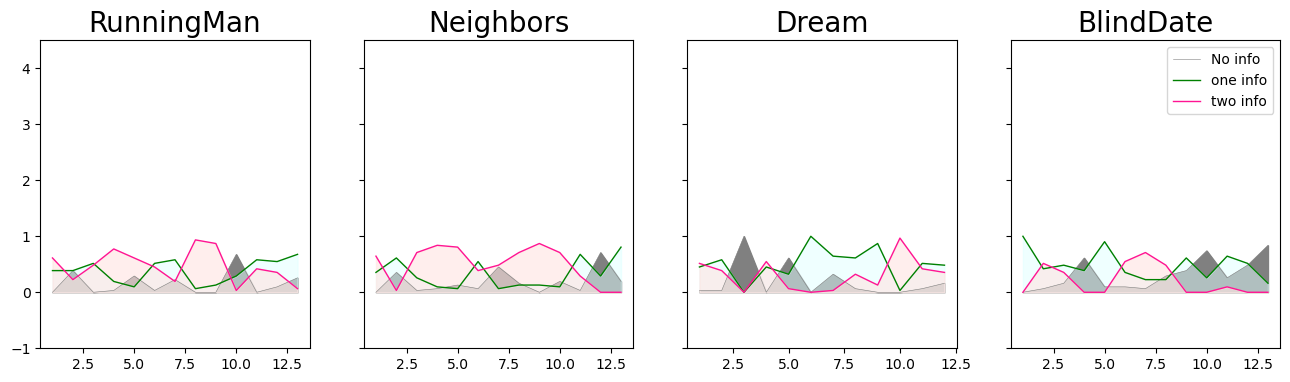

In [822]:
# 두 번째 변수 인코딩
re_VA_second_overalla, re_VA_second_overallb, re_VA_second_overallc = {}, {},{}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    VA_first_overall = pd.DataFrame(VA_first_vis[story].values + VA_first_aud[story].values)
    VA_second_overall = pd.DataFrame(VA_second_vis[story].values + VA_second_aud[story].values)
    
    # 1보다 작은 경우
    re_VA_second_overalla[story] = VA_second_overall.applymap(lambda x: 1 if x < 1 else 0)

    # 1이상 2미만인 경우
    re_VA_second_overallb[story] = VA_second_overall.applymap(lambda x: 1 if 1 <= x <= 2 else 0)

    # 2이상인 경우
    re_VA_second_overallc[story] = VA_second_overall.applymap(lambda x: 1 if x > 2 else 0)
    

plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_second_overalla[story].index +1 
    y1 = re_VA_second_overalla[story].mean(axis=1)
    y2 = re_VA_second_overallb[story].mean(axis=1) 
    y3 = re_VA_second_overallc[story].mean(axis=1) 
    
    axes[pos].set_ylim([-1, 4.5])
    axes[pos].plot(x,y1, color='gray', linewidth = 0.4, label = 'No info')
    axes[pos].fill_between(x, 0, y1, alpha=1, color = 'gray')
    axes[pos].plot(x,y2, color='green', linewidth = 1.0, label = 'one info')
    axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'lightcyan' )
    axes[pos].plot(x,y3, color='deeppink', linewidth = 1.0, label = 'two info')
    axes[pos].fill_between(x, 0, y3, alpha=0.6, color = 'mistyrose' )
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


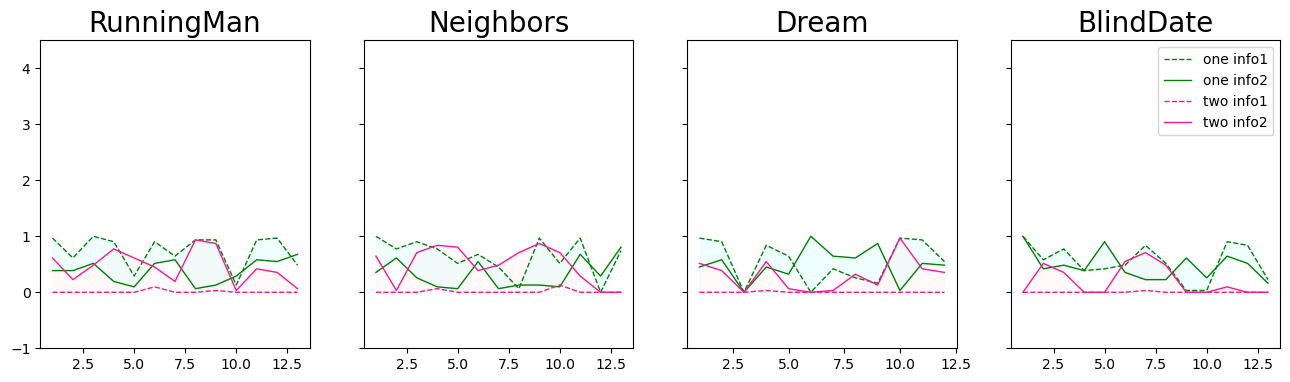

In [599]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_second_overalla[story].index +1 
    y1 = re_VA_first_overalla[story].mean(axis=1) 
    y2 = re_VA_first_overallb[story].mean(axis=1) 
    y3 = re_VA_first_overallc[story].mean(axis=1) 
    y4 = re_VA_second_overalla[story].mean(axis=1)
    y5 = re_VA_second_overallb[story].mean(axis=1) 
    y6 = re_VA_second_overallc[story].mean(axis=1)
    
    axes[pos].set_ylim([-1, 4.5])
    # axes[pos].plot(x,y1, color='gray', linewidth = 0.4, linestyle= '--', label = 'No info1')
    # #axes[pos].fill_between(x, 0, y1, alpha=1, color = 'gray')
    # axes[pos].plot(x,y4, color='gray', linewidth = 0.4, label = 'No info2')
    # axes[pos].fill_between(x, y1, y4, alpha=1,  color = 'gray')
    
    axes[pos].plot(x,y2, color='green', linewidth = 1.0, linestyle= '--', label = 'one info1')
    #axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'lightcyan' )
    axes[pos].plot(x,y5, color='green', linewidth = 1.0, label = 'one info2')
    axes[pos].fill_between(x, y2, y5, alpha=0.5, color = 'lightcyan' )    
    
    axes[pos].plot(x,y3, color='deeppink', linewidth = 1.0, linestyle= '--', label = 'two info1')
    #axes[pos].fill_between(x, 0, y3, alpha=0.2, color = 'mistyrose' )
    axes[pos].plot(x,y6, color='deeppink', linewidth = 1.0, label = 'two info2')
    axes[pos].fill_between(x, y3, y6, alpha=0.2, color = 'mistyrose' )
    
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()
    

## 2nd encoded overall score * relaive change score

In [620]:
# 두 번째 변수 인코딩
relative_updating_changea, reverse_ruc = {}, {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    VA_relative_up_change = pd.DataFrame(VA_change_aud[story].values - VA_change_vis[story].values)
    
    # 1보다 작은 경우
    relative_updating_changea[story] = VA_relative_up_change.applymap(lambda x: 1 if x > 0 else 0)
    reverse_ruc[story] = (relative_updating_changea[story] + - 1) * -1 

In [621]:
weighted_VA_overallb, weighted_VA_overallc, weighted_VA_overalld, weighted_VA_overalle = {},{},{},{}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    VA_first_overall = pd.DataFrame(VA_first_vis[story].values + VA_first_aud[story].values)
    VA_second_overall = pd.DataFrame(VA_second_vis[story].values + VA_second_aud[story].values)
    
    weighted_VA_overallb[story] = VA_second_overall.applymap(lambda x: 1 if 1 <= x <= 2 else 0) *relative_updating_changea[story]
    weighted_VA_overallc[story] = VA_second_overall.applymap(lambda x: 1 if x > 2 else 0) * relative_updating_changea[story]
    
    weighted_VA_overalld[story] = VA_second_overall.applymap(lambda x: 1 if 1 <= x <= 2 else 0) *reverse_ruc[story]
    weighted_VA_overalle[story] = VA_second_overall.applymap(lambda x: 1 if x > 2 else 0)* reverse_ruc[story]
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


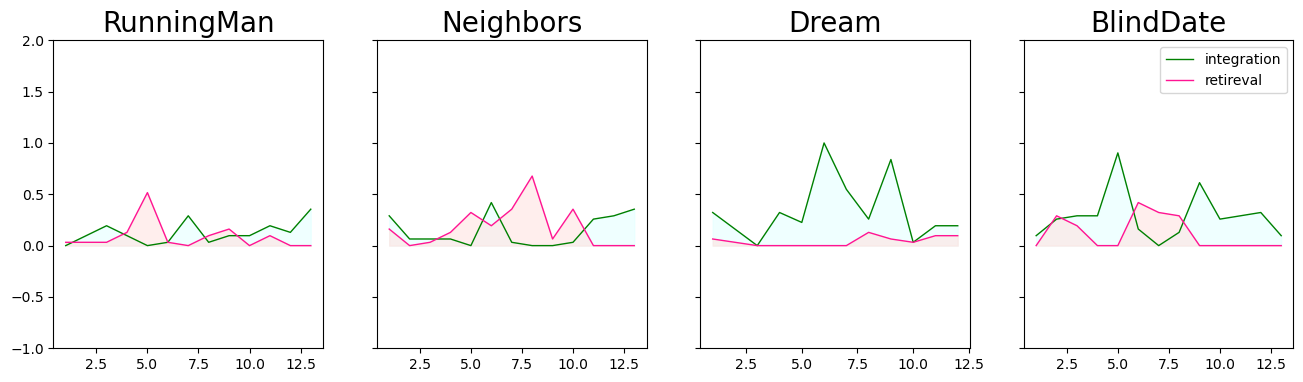

In [625]:

plt.rcParams['figure.figsize'] = (6, 4)
fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    x = re_VA_second_overalla[story].index +1 
    y1 = re_VA_second_overalla[story].mean(axis=1)
    y2 = weighted_VA_overallb[story].mean(axis=1) 
    y3 = weighted_VA_overalle[story].mean(axis=1) 
    
    axes[pos].set_ylim([-1, 2])
    #axes[pos].plot(x,y1, color='gray', linewidth = 0.4, label = 'No info')
    #axes[pos].fill_between(x, 0, y1, alpha=1, color = 'gray')
    axes[pos].plot(x,y2, color='green', linewidth = 1.0, label = 'integration')
    axes[pos].fill_between(x, 0, y2, alpha=0.5, color = 'lightcyan' )
    axes[pos].plot(x,y3, color='deeppink', linewidth = 1.0, label = 'retireval')
    axes[pos].fill_between(x, 0, y3, alpha=0.6, color = 'mistyrose' )
    
    #plt.axhline(df['SceneP(recall)'].mean(), 0, 1, color='red', linestyle='solid', linewidth=0.5)
    axes[pos].set_title(f'{story}', fontsize =20)
    axes[3].legend()

In [733]:
#translate variables into real-timescale 


## Compare with subjectLv rating

In [545]:
 overall2.values - overall1.values

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [547]:
# correlation with subject LV overall performance
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_relative_change = (VA_second_vis[story].values-VA_first_vis[story].values)-(VA_second_aud[story].values-VA_first_aud[story].values)
    AV_relative_change = (AV_second_vis[story].values- AV_first_vis[story].values)-(AV_second_aud[story].values-AV_first_aud[story].values)
    
    VA_con = pd.DataFrame(VA_relative_change)
    VA_con = VA_con.T
    VA_con.reset_index(drop=True, inplace= True)
    AV_con = pd.DataFrame(AV_relative_change)
    AV_con = AV_con.T
    AV_con.reset_index(drop=True, inplace= True)
    
    con_con = pd.concat([VA_con, AV_con])
    con_con.reset_index(drop=True, inplace= True)
    
    overall1 = pd.DataFrame(rater_overall1['HJ'][story])
    overall1.reset_index(inplace = True, drop = True)
    overall2 = pd.DataFrame(rater_overall2['HJ'][story])
    overall2.reset_index(inplace = True, drop = True)
    overall3 = pd.DataFrame(overall2.values - overall1.values)

    
    
    corr_VA1 = pd.concat([con_con.sum(axis=1), overall1, overall2, overall3], axis = 1)
    #corr_VA2=  pd.concat([AV_con.sum(axis=1), overall2], axis = 1)
 
    print(f'---{story}----')
    print(corr_VA1.corr(method='pearson'))
    #print(corr_VA2.corr(method='pearson'))

---RunningMan----
                  0  overall1   overall2          0
0          1.000000  -0.645293  -0.479507  0.394490
overall1  -0.645293   1.000000   0.794474 -0.540119
overall2  -0.479507   0.794474   1.000000  0.081984
0          0.394490  -0.540119   0.081984  1.000000
---Neighbors----
                  0  overall1   overall2          0
0          1.000000   0.022973  -0.214314 -0.225672
overall1   0.022973   1.000000   0.501691 -0.581999
overall2  -0.214314   0.501691   1.000000  0.411463
0         -0.225672  -0.581999   0.411463  1.000000
---Dream----
                  0  overall1   overall2          0
0          1.000000  -0.323942  -0.318211  0.100369
overall1  -0.323942   1.000000   0.516658 -0.698846
overall2  -0.318211   0.516658   1.000000  0.251345
0          0.100369  -0.698846   0.251345  1.000000
---BlindDate----
                  0  overall1   overall2          0
0          1.000000   0.188259  -0.162624 -0.339822
overall1   0.188259   1.000000   0.483760 -0.688732

In [492]:
# correlation with subject LV overall performance
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_first = VA_first_vis[story].values + VA_first_aud[story].values
    VA_second = (VA_second_vis[story].values + VA_second_aud[story].values)
    AV_first = (AV_first_vis[story].values + AV_first_aud[story].values)
    AV_second = (AV_second_vis[story].values + AV_second_aud[story].values)
    
    first_con = pd.concat([pd.DataFrame(VA_first), pd.DataFrame(AV_first)], axis = 1)
    first_con = first_con.T
    first_con.reset_index(drop=True, inplace= True)
    second_con = pd.concat([pd.DataFrame(VA_second), pd.DataFrame(AV_second)], axis = 1)
    second_con = second_con.T
    second_con.reset_index(drop=True, inplace= True)
    
    overall1 = pd.DataFrame(rater_overall1['HJ'][story])
    overall1.reset_index(inplace = True, drop = True)
    overall2 = pd.DataFrame(rater_overall2['HJ'][story])
    overall2.reset_index(inplace = True, drop = True)
    
    
    corr_VA1 = pd.concat([first_con.sum(axis=1), overall1], axis = 1)
    corr_VA2=  pd.concat([second_con.sum(axis=1), overall2], axis = 1)
 
    print(f'---{story}----')
    print(corr_VA1.corr(method='pearson'))
    print(corr_VA2.corr(method='pearson'))

---RunningMan----
                  0  overall1 
0          1.000000   0.476111
overall1   0.476111   1.000000
                  0  overall2 
0          1.000000   0.531068
overall2   0.531068   1.000000
---Neighbors----
                  0  overall1 
0          1.000000  -0.003136
overall1  -0.003136   1.000000
                  0  overall2 
0          1.000000   0.257685
overall2   0.257685   1.000000
---Dream----
                  0  overall1 
0          1.000000   0.406445
overall1   0.406445   1.000000
                0  overall2 
0          1.0000     0.2136
overall2   0.2136     1.0000
---BlindDate----
                  0  overall1 
0          1.000000   0.080548
overall1   0.080548   1.000000
                  0  overall2 
0          1.000000   0.114246
overall2   0.114246   1.000000


In [510]:
#actions1[story] = op_df['actions1']
#actions1[story] = op_df['actions2']

#lines1[story] = op_df['lines1']
#lines2[story] = op_df['lines2']


# correlation with subject LV overall performance
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_first = VA_first_vis[story].values + VA_first_aud[story].values
    VA_second = (VA_second_vis[story].values + VA_second_aud[story].values)
    AV_first = (AV_first_vis[story].values + AV_first_aud[story].values)
    AV_second = (AV_second_vis[story].values + AV_second_aud[story].values)
    
    first_con = pd.concat([pd.DataFrame(VA_first), pd.DataFrame(AV_first)], axis = 1)
    first_con = first_con.T
    first_con.reset_index(drop=True, inplace= True)
    second_con = pd.concat([pd.DataFrame(VA_second), pd.DataFrame(AV_second)], axis = 1)
    second_con = second_con.T
    second_con.reset_index(drop=True, inplace= True)
    
    action1 = pd.DataFrame(rater_actions1['HJ'][story])
    action1.reset_index(inplace = True, drop = True)
    action2 = pd.DataFrame(rater_actions2['HJ'][story])
    action2.reset_index(inplace = True, drop = True)
    
    
    corr_VA1 = pd.concat([first_con.sum(axis=1), action1], axis = 1)
    corr_VA2=  pd.concat([second_con.sum(axis=1), action2], axis = 1)
 
    print(f'---{story}----')
    print(corr_VA1.corr(method='pearson'))
    print(corr_VA2.corr(method='pearson'))

---RunningMan----
                 0  actions1
0         1.000000  0.444741
actions1  0.444741  1.000000
                 0  actions2
0         1.000000  0.512976
actions2  0.512976  1.000000
---Neighbors----
                 0  actions1
0         1.000000  0.218503
actions1  0.218503  1.000000
                 0  actions2
0         1.000000  0.280548
actions2  0.280548  1.000000
---Dream----
                 0  actions1
0         1.000000  0.312381
actions1  0.312381  1.000000
                 0  actions2
0         1.000000  0.281196
actions2  0.281196  1.000000
---BlindDate----
                 0  actions1
0         1.000000  0.220292
actions1  0.220292  1.000000
                 0  actions2
0         1.000000  0.129233
actions2  0.129233  1.000000


In [513]:
#actions1[story] = op_df['actions1']
#actions1[story] = op_df['actions2']

#lines1[story] = op_df['lines1']
#lines2[story] = op_df['lines2']


# correlation with subject LV overall performance
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_first = VA_first_vis[story].values + VA_first_aud[story].values
    VA_second = (VA_second_vis[story].values + VA_second_aud[story].values)
    AV_first = (AV_first_vis[story].values + AV_first_aud[story].values)
    AV_second = (AV_second_vis[story].values + AV_second_aud[story].values)
    
    first_con = pd.concat([pd.DataFrame(VA_first), pd.DataFrame(AV_first)], axis = 1)
    first_con = first_con.T
    first_con.reset_index(drop=True, inplace= True)
    second_con = pd.concat([pd.DataFrame(VA_second), pd.DataFrame(AV_second)], axis = 1)
    second_con = second_con.T
    second_con.reset_index(drop=True, inplace= True)
    
    action1 = pd.DataFrame(rater_actions1['KK'][story])
    action1.reset_index(inplace = True, drop = True)
    action2 = pd.DataFrame(rater_actions2['KK'][story])
    action2.reset_index(inplace = True, drop = True)
    
    
    corr_VA1 = pd.concat([first_con.sum(axis=1), action1], axis = 1)
    corr_VA2=  pd.concat([second_con.sum(axis=1), action2], axis = 1)
 
    print(f'---{story}----')
    print(corr_VA1.corr(method='pearson'))
    print(corr_VA2.corr(method='pearson'))

---RunningMan----
                 0  actions1
0         1.000000  0.100808
actions1  0.100808  1.000000
                 0  actions2
0         1.000000  0.183714
actions2  0.183714  1.000000
---Neighbors----
                 0  actions1
0         1.000000  0.206049
actions1  0.206049  1.000000
                 0  actions2
0         1.000000  0.081912
actions2  0.081912  1.000000
---Dream----
                 0  actions1
0         1.000000  0.443195
actions1  0.443195  1.000000
                 0  actions2
0         1.000000  0.262506
actions2  0.262506  1.000000
---BlindDate----
                 0  actions1
0         1.000000  0.405242
actions1  0.405242  1.000000
                0  actions2
0         1.00000   0.20241
actions2  0.20241   1.00000


In [512]:
#actions1[story] = op_df['actions1']
#actions1[story] = op_df['actions2']

#lines1[story] = op_df['lines1']
#lines2[story] = op_df['lines2']


# correlation with subject LV overall performance
for pos, story in enumerate(['RunningMan', 'Neighbors','Dream','BlindDate']):
    VA_first = VA_first_vis[story].values + VA_first_aud[story].values
    VA_second = (VA_second_vis[story].values + VA_second_aud[story].values)
    AV_first = (AV_first_vis[story].values + AV_first_aud[story].values)
    AV_second = (AV_second_vis[story].values + AV_second_aud[story].values)
    
    first_con = pd.concat([pd.DataFrame(VA_first), pd.DataFrame(AV_first)], axis = 1)
    first_con = first_con.T
    first_con.reset_index(drop=True, inplace= True)
    second_con = pd.concat([pd.DataFrame(VA_second), pd.DataFrame(AV_second)], axis = 1)
    second_con = second_con.T
    second_con.reset_index(drop=True, inplace= True)
    
    line1 = pd.DataFrame(rater_lines1['KK'][story])
    line1.reset_index(inplace = True, drop = True)
    line2 = pd.DataFrame(rater_lines2['KK'][story])
    line2.reset_index(inplace = True, drop = True)
    
    
    corr_VA1 = pd.concat([first_con.sum(axis=1), line1], axis = 1)
    corr_VA2=  pd.concat([second_con.sum(axis=1), line2], axis = 1)
 
    print(f'---{story}----')
    print(corr_VA1.corr(method='pearson'))
    print(corr_VA2.corr(method='pearson'))

---RunningMan----
               0    lines1
0       1.000000 -0.376408
lines1 -0.376408  1.000000
               0    lines2
0       1.000000  0.338879
lines2  0.338879  1.000000
---Neighbors----
               0    lines1
0       1.000000 -0.191015
lines1 -0.191015  1.000000
               0    lines2
0       1.000000  0.195721
lines2  0.195721  1.000000
---Dream----
              0   lines1
0       1.00000 -0.14165
lines1 -0.14165  1.00000
              0   lines2
0       1.00000  0.34635
lines2  0.34635  1.00000
---BlindDate----
               0    lines1
0       1.000000 -0.216327
lines1 -0.216327  1.000000
               0    lines2
0       1.000000  0.105188
lines2  0.105188  1.000000


# Comapare KK1 and KK2

In [709]:
#Load KK2 files 
#ev_rating_files = "Ratings/2.EventRating"
rating_files = "Ratings/3.SceneRating"
fpath = os.path.join(overall_performance_dir, 'KiKang' ,rating_files)
print(fpath)
fname1 = 'Dream_Annotation' +'.xlsx'
fname2 = 'RunningMan_Annotation' +'.xlsx'


run10 = pd.read_excel(os.path.join(fpath, fname2), usecols = [8,9,10,11,13,14,15,16,17,18,19,20], sheet_name = '10')[0:55]
run12 = pd.read_excel(os.path.join(fpath, fname2), usecols = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], sheet_name = '12')[0:55]
run18 = pd.read_excel(os.path.join(fpath, fname2), usecols = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45],sheet_name = '18')[0:55]


dre10 = pd.read_excel(os.path.join(fpath, fname1), usecols = [3,4,5,6,8,9,10,11,12,13,14], sheet_name = '10')[0:50]
dre12 = pd.read_excel(os.path.join(fpath, fname1), usecols = [3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32], sheet_name = '12')[0:50]
dre18 = pd.read_excel(os.path.join(fpath, fname2), usecols = [8,9,10,11,12,13,14,15,16,17,18,19,20,21, 23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45], sheet_name = '18')[0:50]



#df NAN to Zero 
dre10 = dre10.fillna(0)
dre12 = dre12.fillna(0)
dre18 = dre18.fillna(0)
run10 = run10.fillna(0)
run12 = run12.fillna(0)
run18 = run18.fillna(0)


all_run = {'10' : run10.sum(axis = 1), '12':run12.sum(axis = 1),'18':run18.sum(axis = 1)}
all_dre = {'10' : dre10.sum(axis = 1), '12':dre12.sum(axis = 1), '18':dre18.sum(axis = 1)}


/mnt/c/Users/since/Dropbox/RAs/projects/KiKang/Ratings/3.SceneRating


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


No handles with labels found to put in legend.


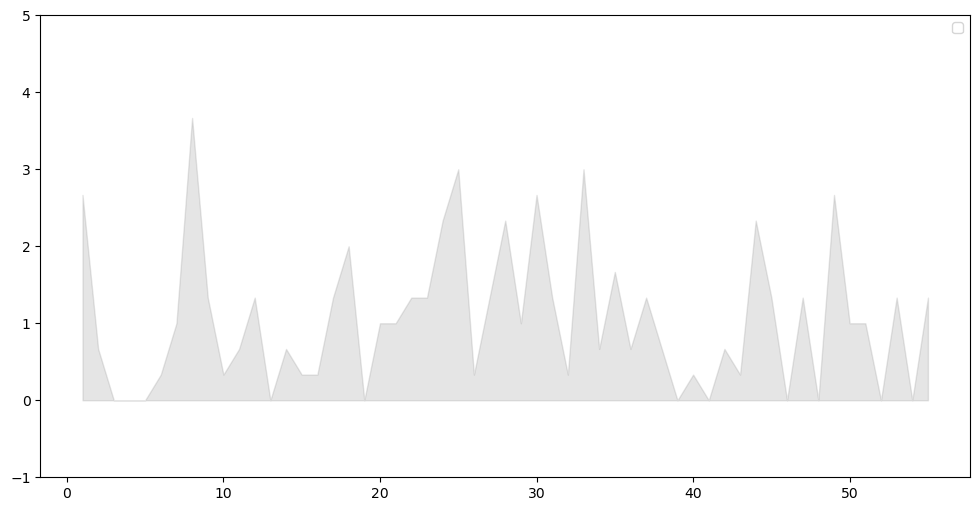

In [734]:
plt.rcParams['figure.figsize'] = (12, 6)
#fig, axes = plt.subplots(1, 4, figsize = (16,4), sharey=True)   
x1 = all_run['10'].index +1 
#x2 = all_dre['10'].index +1 
y1 = all_run['10']
y2 = all_run['12']
y3 = all_run['18']
y4 = (all_run['10'] + all_run['12'] +all_run['18'])/3

plt.ylim([-1, 5])
# plt.plot(x1,y1, color='green', linewidth = 2, label = '10')
# plt.plot(x1,y2, color='deeppink', linewidth = 0.6, label = '12')
# plt.fill_between(x1, 0, y2, alpha=0.3, color = 'lightpink' )
# plt.plot(x1,y3, color='gray', linewidth = 1, label = '18')
plt.fill_between(x1, 0, y4, alpha=0.2, color = 'gray' )

plt.legend()

# 2024.04

## RM_ANOVA for only cond 1 

In [60]:
#Subject check 
subject = np.arange(1,34)
sub_sm_exclude = [9, 26]
sub_sm = np.delete(subject, sub_sm_exclude)
sub_id = np.concatenate((sub_sm,sub_sm))

vcond = np.ones(31) 
acond = np.ones(31)*2
cond = np.concatenate((vcond,acond))


rm_op_df = {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    df = pd.DataFrame()
    op_df = overall1[story]
    df['id'] = sub_id
    df['output'] = op_df['overall1 '].append(op_df['overall2 '], ignore_index = True) 
    df['input'] = cond
    rm_op_df[story] = df

In [66]:
rm_op_df

{'RunningMan':     id  output  input
 0    1     3.0    1.0
 1    2     2.0    1.0
 2    3     4.0    1.0
 3    4     1.0    1.0
 4    5     2.0    1.0
 ..  ..     ...    ...
 57  29     3.0    2.0
 58  30     2.0    2.0
 59  31     2.0    2.0
 60  32     3.0    2.0
 61  33     3.0    2.0
 
 [62 rows x 3 columns],
 'Neighbors':     id  output  input
 0    1     1.0    1.0
 1    2     0.0    1.0
 2    3     1.0    1.0
 3    4     0.0    1.0
 4    5     0.0    1.0
 ..  ..     ...    ...
 57  29     2.0    2.0
 58  30     3.0    2.0
 59  31     2.0    2.0
 60  32     3.0    2.0
 61  33     2.0    2.0
 
 [62 rows x 3 columns],
 'Dream':     id  output  input
 0    1     2.0    1.0
 1    2     1.0    1.0
 2    3     1.0    1.0
 3    4     0.0    1.0
 4    5     0.0    1.0
 ..  ..     ...    ...
 57  29     3.0    2.0
 58  30     2.0    2.0
 59  31     2.0    2.0
 60  32     3.0    2.0
 61  33     3.0    2.0
 
 [62 rows x 3 columns],
 'BlindDate':     id  output  input
 0    1     1.0    1.0

<AxesSubplot:xlabel='input', ylabel='output'>

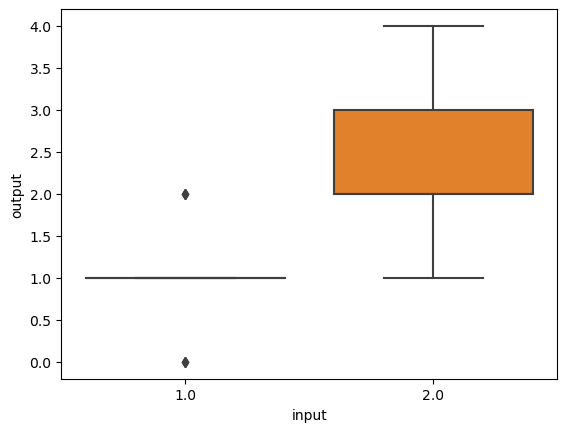

In [70]:
# box plot 
#sns.boxplot(x="input", y="output", data=rm_op_df['RunningMan'])
#sns.boxplot(x="input", y="output", data=rm_op_df['Neighbors'])
#sns.boxplot(x="input", y="output", data=rm_op_df['Dream'])
sns.boxplot(x="input", y="output", data=rm_op_df['BlindDate'])

In [73]:
rm_op_df[story]

id  output  input
0    1     3.0    1.0
1    2     2.0    1.0
2    3     4.0    1.0
3    4     1.0    1.0
4    5     2.0    1.0
..  ..     ...    ...
57  29     3.0    2.0
58  30     2.0    2.0
59  31     2.0    2.0
60  32     3.0    2.0
61  33     3.0    2.0

[62 rows x 3 columns]

In [80]:
from statsmodels.stats.anova import AnovaRM

for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    data_df = rm_op_df[story]
    print(story)
    print(AnovaRM(data=data_df, depvar='output', subject='id', within=['input']).fit())


RunningMan
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
input 53.6508 1.0000 30.0000 0.0000

Neighbors
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 105.6250 1.0000 30.0000 0.0000

Dream
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 130.3448 1.0000 30.0000 0.0000

BlindDate
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
input 56.7537 1.0000 30.0000 0.0000



In [82]:
# ㄷㅡㅇㅂㅜㄴㅅㅏㄴ ㅁㅏㄴㅈㅗㄱ 
import pingouin as pg

for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    data_df = rm_op_df[story]
    print(story)
    print(pg.sphericity(data=data_df, dv='output', within='input', subject='id'))
 

RunningMan
(True, nan, nan, 1, 1.0)
Neighbors
(True, nan, nan, 1, 1.0)
Dream
(True, nan, nan, 1, 1.0)
BlindDate
(True, nan, nan, 1, 1.0)


## Template Rating Performance

In [253]:
# Load data 
# check subjects 
colemns = np.arange(2,33)
sub_sm_exclude = [8, 25]
sub_sm = np.delete(subject, sub_sm_exclude)
stories =['RunningMan', 'Neighbors','Dream','BlindDate']

In [302]:
jy_dir = '/mnt/c/Users/since/Dropbox/jany/Movie_recall/'


colemns = np.arange(2,33)

jy_template = {} 
for story in stories:  
    jy_template[story] = pd.read_excel(os.path.join(jy_dir, 'Event_counting.xlsx'), sheet_name = f'{story}2', usecols = colemns)
    
jy_template['RunningMan'] = jy_template['RunningMan'][:26].fillna(0).T
jy_template['Dream'] = jy_template['Dream'][:20].fillna(0).T
jy_template['Neighbors'] = jy_template['Neighbors'][:32].fillna(0).T
jy_template['BlindDate'] = jy_template['BlindDate'][:22].fillna(0).T


# Event counting & updating score 
for story in stories: 
    print(story)
    col = jy_template[story].columns
    recall1 = np.arange(0,col.shape[0]/2, dtype = 'int')
    recall2 = np.arange(col.shape[0]/2,col.shape[0], dtype = 'int') 
    jy_template[story]['recall1'] = jy_template[story][recall1].sum(axis = 1)
    jy_template[story]['recall2'] = jy_template[story][recall2].sum(axis = 1)
    
    cols = [] 
    for idx in range(int(col.shape[0]/2)):
        col_name = 'change' +str(idx)
        jy_template[story][col_name] = jy_template[story][idx+int(col.shape[0]/2)] - jy_template[story][idx]
        cols.append(col_name)
    jy_template[story]['recall_change'] = jy_template[story][cols].sum(axis = 1)

RunningMan
Neighbors
Dream
BlindDate


In [304]:
# KiKang  
kk_dir = '/mnt/c/Users/since/Dropbox/RAs/projects/KiKang/second_rating/2. event_lv'

colemns = np.arange(2,33)

kk_template = {} 
for story in stories:  
    kk_template[story] = pd.read_excel(os.path.join(kk_dir, 'Event_counting.xlsx'), sheet_name = story, usecols = colemns)
    
kk_template['RunningMan'] = kk_template['RunningMan'][:26].T
kk_template['Dream'] = kk_template['Dream'][:20].T
kk_template['Neighbors'] = kk_template['Neighbors'][:32].T
kk_template['BlindDate'] = kk_template['BlindDate'][:22].T



# Event counting & updating score 
for story in stories: 
    print(story)
    col = kk_template[story].columns
    recall1 = np.arange(0,col.shape[0]/2, dtype = 'int')
    recall2 = np.arange(col.shape[0]/2,col.shape[0], dtype = 'int') 
    kk_template[story]['recall1'] = kk_template[story][recall1].sum(axis = 1)
    kk_template[story]['recall2'] = kk_template[story][recall2].sum(axis = 1)
    
    cols = [] 
    for idx in range(int(col.shape[0]/2)):
        col_name = 'change' +str(idx)
        kk_template[story][col_name] = kk_template[story][idx+int(col.shape[0]/2)] - kk_template[story][idx]
        cols.append(col_name)
    kk_template[story]['recall_change'] = kk_template[story][cols].sum(axis = 1)

RunningMan
Neighbors
Dream
BlindDate


In [305]:
corr_df = {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:

    df = pd.concat([kk_template[story][['recall1','recall2','recall_change']], jy_template[story][['recall1','recall2','recall_change']]], axis =1)
    corr_df[story] = df.corr()             
    # print(story)
    # print(df.corr())
    # print(         )
average = sum(corr_df.values())/len(corr_df)
average

recall1   recall2  recall_change   recall1   recall2  \
recall1        1.000000  0.423130      -0.544425  0.644870  0.415005   
recall2        0.423130  1.000000       0.476670  0.456496  0.783444   
recall_change -0.544425  0.476670       1.000000 -0.215817  0.303388   
recall1        0.644870  0.456496      -0.215817  1.000000  0.416934   
recall2        0.415005  0.783444       0.303388  0.416934  1.000000   
recall_change -0.064104  0.455683       0.536156 -0.256374  0.690406   

               recall_change  
recall1            -0.064104  
recall2             0.455683  
recall_change       0.536156  
recall1            -0.256374  
recall2             0.690406  
recall_change       1.000000

In [307]:
import scipy.stats

for cond in ['recall1','recall2']:
    for story in stories:
        x = kk_template[story][cond]
        y = jy_template[story][cond]
        print('story',story, '-cond ', cond, '-', scipy.stats.pearsonr(x, y))


story RunningMan -cond  recall1 - (0.8084954676076576, 3.757257218355262e-08)
story Neighbors -cond  recall1 - (0.528256384407578, 0.002253263427608305)
story Dream -cond  recall1 - (0.8336822445500042, 5.778956881839383e-09)
story BlindDate -cond  recall1 - (0.4090448282830171, 0.02232039594760994)
story RunningMan -cond  recall2 - (0.7776438751634854, 2.6450405935488984e-07)
story Neighbors -cond  recall2 - (0.8057545877488896, 4.530529216186072e-08)
story Dream -cond  recall2 - (0.8024622148201064, 5.650828270168047e-08)
story BlindDate -cond  recall2 - (0.7479162518573977, 1.3232650671234018e-06)


### Statistic for cond 

In [318]:
# Averageing between two raters 

avg_template = {} 
for story in stories:
    cond_df = pd.DataFrame()
    for cond in ['recall1','recall2']:
        cond_df[cond] = (kk_template[story][cond]+jy_template[story][cond])/2
    avg_template[story] = cond_df

ones = np.ones(31)
twos = np.ones(31)+2

sub_id = np.concatenate((sub_sm,sub_sm))
cond = np.concatenate([ones, twos])

rm_tmplate = {} 
for story in stories:
    rm_df = pd.DataFrame()
    rm_df['output']= pd.concat([avg_template[story]['recall1'],avg_template[story]['recall2']], ignore_index = True) 
    rm_df['id'] = sub_id
    rm_df['input'] = cond
    rm_tmplate[story] = rm_df

In [338]:
subject = np.arange(1,34)
sub_sm_exclude = [8, 25]
sub_sm = np.delete(subject, sub_sm_exclude)
print(sub_sm)


ones = np.ones(31)
twos = np.ones(31)+2

sub_id = np.concatenate((sub_sm,sub_sm))
cond = np.concatenate([ones, twos])

rm_tmplate = {} 
for story in stories:
    rm_df = pd.DataFrame()
    rm_df['output']= pd.concat([kk_template[story]['recall1'],kk_template[story]['recall2']], ignore_index = True) 
    rm_df['id'] = sub_id
    rm_df['input'] = cond
    rm_tmplate[story] = rm_df

[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29 30 31 32 33]


In [340]:
from statsmodels.stats.anova import AnovaRM

for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    data_df = rm_tmplate[story]
    print(story)
    print(AnovaRM(data=data_df, depvar='output', subject='id', within=['input']).fit())

RunningMan
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
input 15.2888 1.0000 30.0000 0.0005

Neighbors
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 288.6207 1.0000 30.0000 0.0000

Dream
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
input 44.1486 1.0000 30.0000 0.0000

BlindDate
               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
input 57.5619 1.0000 30.0000 0.0000



### Correlation between subject & template 

In [220]:
overalls['RunningMan'].head()

overall1   overall2   whichFirst
S01        3.0        3.0         1.0
S02        2.0        3.0         1.0
S03        4.0        4.0         1.0
S04        1.0        2.0         1.0
S05        2.0        2.0         1.0

In [321]:
corr_df = {}
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    #df = pd.concat([kk_template[story][['recall1','recall2','recall_change']], overalls[story][['overall1 ','overall2 ']]], axis =1)
    df = pd.concat([jy_template[story][['recall1','recall2']], overall1[story][['overall1 ','overall2 ']]], axis =1)
    #df = pd.concat([avg_template[story][['recall1','recall2']], overall1[story][['overall1 ','overall2 ']]], axis =1)
    corr_df[story] = df.corr()             
    print(story)
    print(df.corr())
    print(         )
average = sum(corr_df.values())/len(corr_df)

RunningMan
            recall1   recall2  overall1   overall2 
recall1    1.000000  0.616955   0.537182   0.568581
recall2    0.616955  1.000000   0.016337   0.228485
overall1   0.537182  0.016337   1.000000   0.755866
overall2   0.568581  0.228485   0.755866   1.000000

Neighbors
            recall1   recall2  overall1   overall2 
recall1    1.000000  0.344558   0.096991   0.131769
recall2    0.344558  1.000000   0.340064   0.442729
overall1   0.096991  0.340064   1.000000   0.612173
overall2   0.131769  0.442729   0.612173   1.000000

Dream
            recall1   recall2  overall1   overall2 
recall1    1.000000  0.548103   0.601059   0.532344
recall2    0.548103  1.000000   0.450153   0.558626
overall1   0.601059  0.450153   1.000000   0.669206
overall2   0.532344  0.558626   0.669206   1.000000

BlindDate
            recall1   recall2  overall1   overall2 
recall1    1.000000  0.158122   0.172566   0.033807
recall2    0.158122  1.000000   0.038334   0.248180
overall1   0.172566  0.0

In [328]:
import scipy.stats
for story in stories:
    x = avg_template[story]['recall1']
    y = overall1[story]['overall1 ']
    print('story ', story, scipy.stats.pearsonr(x, y))
    
print('  ')
for story in stories:
    x = avg_template[story]['recall2']
    y = overall1[story]['overall2 ']
    print('story ', story, scipy.stats.pearsonr(x, y))

story  RunningMan (0.5468287248525172, 0.0014569860536618262)
story  Neighbors (0.4186560861230164, 0.019077270756546114)
story  Dream (0.6233018549937978, 0.00017992752265035756)
story  BlindDate (0.3078116371939436, 0.09207055521112867)
  
story  RunningMan (0.3086813972429979, 0.09110794887952721)
story  Neighbors (0.4515246696852686, 0.010780663626131034)
story  Dream (0.5948551476165186, 0.00041652259116451)
story  BlindDate (0.32303467908527006, 0.07630524449704214)


In [333]:
print((0.5468287248525172+0.4186560861230164+0.6233018549937978+0.3078116371939436)/4)
print((0.3086813972429979 +0.4515246696852686 +0.5948551476165186+0.32303467908527006)/4)

0.4741495757908188
0.4195239734075138


In [327]:
import scipy.stats
for story in stories:
    x = kk_template[story]['recall1']
    y = overall1[story]['overall1 ']
    print('story ', story, scipy.stats.pearsonr(x, y))
    
print('  ')
for story in stories:
    x = kk_template[story]['recall2']
    y = overall1[story]['overall2 ']
    print('story ', story, scipy.stats.pearsonr(x, y))

story  RunningMan (0.5028315795347509, 0.003938704687793659)
story  Neighbors (0.465839611633776, 0.008263111413393122)
story  Dream (0.5940727582184004, 0.0004257806721970602)
story  BlindDate (0.324851231242991, 0.07457280711537574)
  
story  RunningMan (0.38702266219414927, 0.03148281695860625)
story  Neighbors (0.4158943266303271, 0.019966450940395442)
story  Dream (0.5703683691943311, 0.0008077275115845071)
story  BlindDate (0.3638650041627326, 0.0441952643504926)


### Time-Course analysis on the template scores

In [409]:

    seg_df['early_change'] = seg_df['recall2_early'] - seg_df['recall1_early']
    seg_df['late_change'] = seg_df['recall2_late'] - seg_df['recall1_late']
    
    seg_kk_temp[story] = seg_df
        

In [405]:
avg_seg_template = {} 
for story in stories:
    cond_df = pd.DataFrame()
    for cond in ['recall1_early','recall1_late','recall2_early','recall2_late', 'early_change', 'late_change']:
        cond_df[cond] = (seg_kk_temp[story][cond]+seg_jy_temp[story][cond])/2
    avg_seg_template[story] = cond_df
    

In [406]:
# Compare ANOVA between encoding cond & events 
import pingouin as pg 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

ones = np.ones(31)
twos = np.ones(31)*2

sub_id = np.concatenate((sub_sm,sub_sm,sub_sm,sub_sm))
cond_time = np.concatenate([ones, twos, ones, twos])
cond_recall = np.concatenate([ones, ones, twos, twos])

an_tmplate = {} 
for story in stories:
    an_df = pd.DataFrame()
    df= avg_seg_template[story]
    an_df['output']= pd.concat([df['recall1_early'],df['recall1_late'],df['recall2_early'],df['recall2_late']], ignore_index = True )
    an_df['id'] = sub_id
    an_df['input_time'] = cond_time
    an_df['input_recall'] = cond_recall
    an_tmplate[story] = an_df
    
    # result = pg.anova(data=an_df, dv = 'output', between ='input') 
    # print('story', story, 'F', result['F'][0], 'p-val', result['p-unc'][0])
    
    model = ols('output ~ C(input_time)*C(input_recall)', an_tmplate[story]).fit()
    print(story)
    print(anova_lm(model))

RunningMan
                                  df     sum_sq    mean_sq          F  \
C(input_time)                    1.0  15.243380  15.243380  39.242050   
C(input_recall)                  1.0   2.483217   2.483217   6.392712   
C(input_time):C(input_recall)    1.0   0.066935   0.066935   0.172314   
Residual                       120.0  46.613406   0.388445        NaN   

                                     PR(>F)  
C(input_time)                  6.063475e-09  
C(input_recall)                1.275725e-02  
C(input_time):C(input_recall)  6.788045e-01  
Residual                                NaN  
Neighbors
                                  df     sum_sq    mean_sq           F  \
C(input_time)                    1.0   2.058376   2.058376    3.419533   
C(input_recall)                  1.0  89.652074  89.652074  148.936921   
C(input_time):C(input_recall)    1.0   5.882489   5.882489    9.772443   
Residual                       120.0  72.233593   0.601947         NaN   

            

<AxesSubplot:xlabel='input_recall', ylabel='output'>

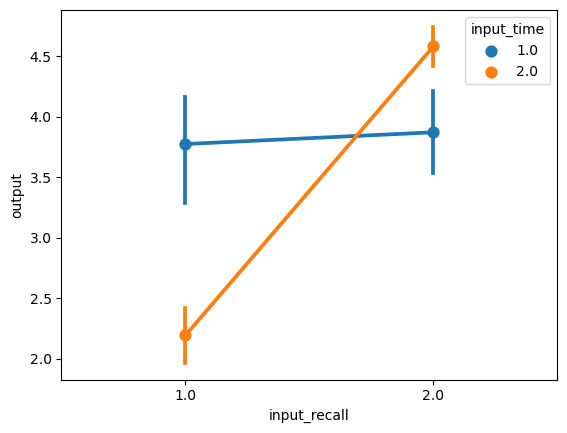

In [402]:
# post-hoc analysis 
import seaborn as sns

#story  = 'RunningMan'
#story  = 'Neighbors'
story = 'Dream'
#story = 'BlindDate'
sns.pointplot(x="input_recall", y="output", hue = 'input_time',data=an_tmplate[story])

## Normative Event boundary plotting 

In [122]:
#Load module & set dir 
import numpy as np
import json
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

normativeEB_dir = '/mnt/c/Users/since/Dropbox/jany/Movie_recall/_DATA/Annotation'
output_dir = '/mnt/c/Users/since/Dropbox/jany/Movie_recall/_DATA'

In [55]:
use_col = np.arange(0,13)
normative_EB = pd.read_excel(os.path.join(normativeEB_dir, 'Event_Segmentation_Results.xlsx'), sheet_name = 'normative_EB', usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12], index_col=0)

In [56]:
print(normative_EB.columns)
print(normative_EB.index)

Index(['run_visual', 'run_audio', 'run_integ', 'dream_visual', 'dream_audio',
       'dream_integ', 'Blind_visual', 'Blind_audio', 'Blind_integ',
       'Neighbors_visual', 'Neighbors_audio', 'Neighbors_integ'],
      dtype='object')
Int64Index([ 15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
             80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140,
            145, 150, 155, 160, 165, 170, 175, 180, 185],
           dtype='int64', name='Time')


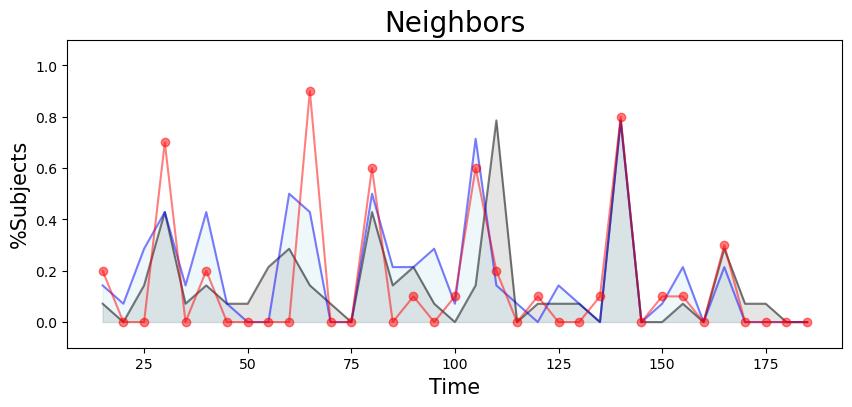

In [204]:
fig, ax = plt.subplots(figsize = (10, 4),sharey=True)   

plt.plot(normative_EB.index,normative_EB['Neighbors_visual']/14,color='black', alpha = 0.5, linestyle='-')
plt.plot(normative_EB.index,normative_EB['Neighbors_audio']/14,color='blue', alpha = 0.5, linestyle = '-')
plt.plot(normative_EB.index,normative_EB['Neighbors_integ']/10,color='red', alpha = 0.5,  linestyle='-', marker= 'o')

plt.fill_between(normative_EB.index, 0, normative_EB['Neighbors_visual']/14, alpha=0.1, color = 'black')
plt.fill_between(normative_EB.index, 0, normative_EB['Neighbors_audio']/14, alpha=0.2, color = 'lightblue')

plt.ylim(-0.1, 1.1) #y축 범위
plt.xlabel('Time', fontsize = 15) #x 라벨
plt.ylabel('%Subjects', fontsize = 15) #y 라벨
plt.title("Neighbors", fontsize = 20) #그래프 이름

#그래프 출력
plot_path = os.path.join(output_dir, "Nei_EBchange.png")
plt.savefig(plot_path)
plt.show()

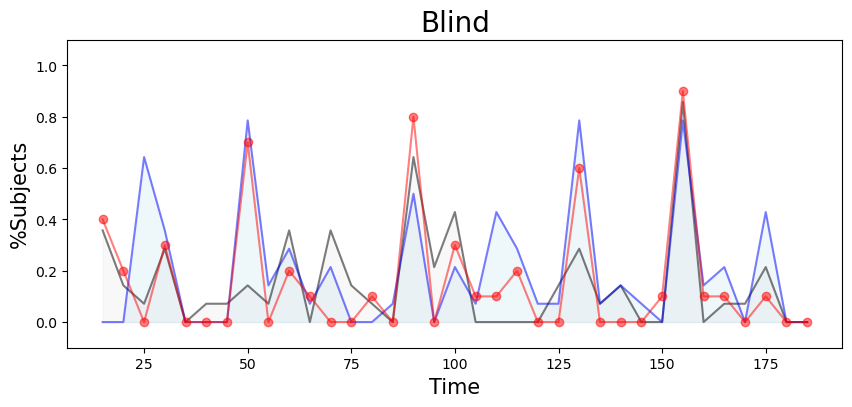

In [170]:
fig, ax = plt.subplots(figsize = (10, 4),sharey=True)   

plt.plot(normative_EB.index,normative_EB['Blind_visual']/14,color='black', alpha = 0.5, linestyle='-')
plt.plot(normative_EB.index,normative_EB['Blind_audio']/14,color='blue', alpha = 0.5,linestyle='-')
plt.plot(normative_EB.index,normative_EB['Blind_integ']/10, color='red', alpha = 0.5, linestyle='-', marker = 'o')

plt.fill_between(normative_EB.index, 0, normative_EB['Blind_visual']/14, alpha=0.05, color = 'gray')
plt.fill_between(normative_EB.index, 0, normative_EB['Blind_audio']/14, alpha=0.2, color = 'lightblue')


plt.ylim(-0.1, 1.1) #y축 범위
plt.xlabel('Time', fontsize = 15) #x 라벨
plt.ylabel('%Subjects', fontsize = 15) #y 라벨
plt.title("Blind", fontsize = 20) #그래프 이름

#그래프 출력

plot_path = os.path.join(output_dir, "blind_EBchange.png")
plt.savefig(plot_path)
plt.show()

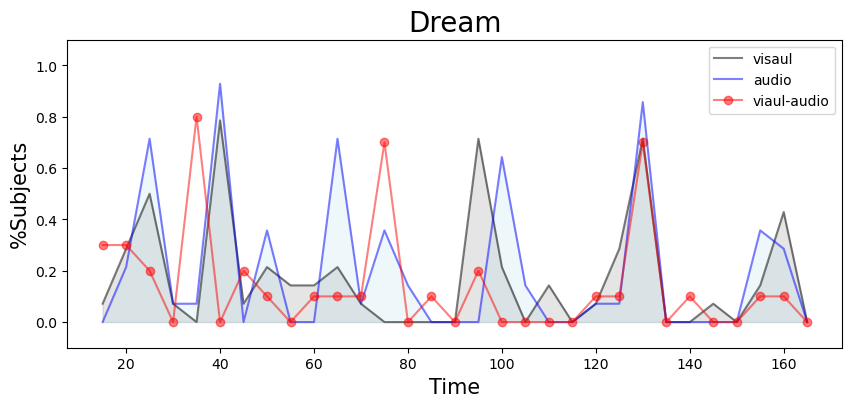

In [207]:
import matplotlib.pyplot as plt

visaul_dream =  normative_EB['dream_visual'][:31]
audio_dream = normative_EB['dream_audio'][:31]
integ_dream = normative_EB['dream_integ'][:31]

visaul_dream = visaul_dream.astype('float')
audio_dream = audio_dream.astype('float')
integ_dream = integ_dream.astype('float')

fig, ax = plt.subplots(figsize = (10, 4),sharey=True)   
plt.plot(normative_EB.index[:31],visaul_dream/14,color='black', alpha = 0.5, linestyle='-')
plt.plot(normative_EB.index[:31],audio_dream/14,color='blue', alpha = 0.5,linestyle='-')
plt.plot(normative_EB.index[:31],integ_dream/10,color='red', alpha = 0.5, linestyle='-', marker = 'o')

plt.fill_between(normative_EB.index[:31], 0, visaul_dream/14, alpha=0.1, color = 'black')
plt.fill_between(normative_EB.index[:31], 0, audio_dream/14, alpha=0.2, color = 'lightblue')


plt.ylim(-0.1, 1.1) #y축 범위
plt.xlabel('Time', fontsize = 15) #x 라벨
plt.ylabel('%Subjects', fontsize = 15) #y 라벨
plt.title("Dream", fontsize = 20) #그래프 이름

#그래프 출력

plot_path = os.path.join(output_dir, "dream_EBchange.png")
plt.legend(['visaul', 'audio', 'viaul-audio'])
plt.savefig(plot_path)
plt.show()

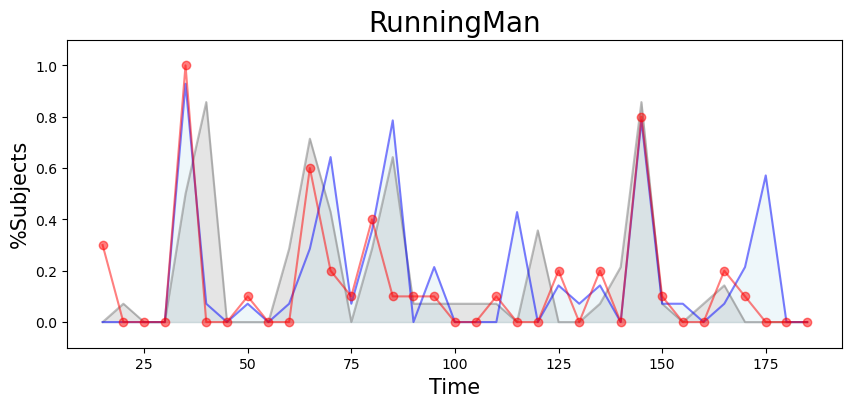

In [209]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 4),sharey=True)   
plt.plot(normative_EB.index,normative_EB['run_visual']/14,color='gray', alpha = 0.5, linestyle='-')
plt.plot(normative_EB.index,normative_EB['run_audio']/14,color='blue', alpha = 0.5, linestyle='-')
plt.plot(normative_EB.index,normative_EB['run_integ']/10,color='red', alpha = 0.5, linestyle='-', marker = 'o')

plt.fill_between(normative_EB.index, 0, normative_EB['run_visual']/14, alpha=0.1, color = 'black')
plt.fill_between(normative_EB.index, 0, normative_EB['run_audio']/14, alpha=0.2, color = 'lightblue')

plt.ylim(-0.1, 1.1) #y축 범위
plt.xlabel('Time', fontsize = 15) #x 라벨
plt.ylabel('%Subjects', fontsize = 15) #y 라벨
plt.title("RunningMan", fontsize = 20) #그래프 이름

#그래프 출력

plot_path = os.path.join(output_dir, "run_EBChange.png")
plt.savefig(plot_path)
plt.show()

## Event Counting 

In [510]:
#Load module & set dir 
import numpy as np
import json
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EC_dir = '/mnt/c/Users/since/Dropbox/RAs/projects/KiKang/Ratings/2.EventRating'
output_dir = '/mnt/c/Users/since/Dropbox/jany/Movie_recall/_DATA'

In [511]:
#Load behav_data 
use_col = np.arange(0,63)
ec_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'Sheet3', usecols = use_col,  index_col=0 )

In [512]:
df = ec_sheet

run1_vis_ec = df.iloc[10:11, 0::2]
run1_aud_ec = df.iloc[10:11, 1::2]
run2_vis_ec = df.iloc[11:12, 0::2]
run2_aud_ec = df.iloc[11:12, 1::2]

run1_aud_ec.columns = run1_vis_ec.columns
run2_aud_ec.columns = run2_vis_ec.columns

dre1_vis_ec = df.iloc[22:23, 0::2]
dre1_aud_ec = df.iloc[22:23, 1::2]
dre2_vis_ec = df.iloc[23:24, 0::2]
dre2_aud_ec = df.iloc[23:24, 1::2]

dre1_aud_ec.columns = dre1_vis_ec.columns
dre2_aud_ec.columns = dre2_vis_ec.columns

nei1_vis_ec = df.iloc[38:39, 0::2]
nei1_aud_ec = df.iloc[38:39, 1::2]
nei2_vis_ec = df.iloc[39:40, 0::2]
nei2_aud_ec = df.iloc[39:40, 1::2]

nei1_aud_ec.columns = nei1_vis_ec.columns
nei2_aud_ec.columns = nei2_vis_ec.columns

bli1_vis_ec = df.iloc[52:53, 0::2]
bli1_aud_ec = df.iloc[52:53, 1::2]
bli2_vis_ec = df.iloc[53:54, 0::2]
bli2_aud_ec = df.iloc[53:54, 1::2]

bli1_aud_ec.columns = bli1_vis_ec.columns
bli2_aud_ec.columns = bli2_vis_ec.columns

In [513]:
bli1_vis_ec

S01   S02  S03       S04  S05   S06       S07   S08       S10  \
RunningMan                                                                   
Bli1        0.45  0.45  0.5  0.366667  0.4  0.35  0.433333  0.15  0.216667   

                 S11  ...       S23       S24  S25  S27   S28  S29  S30  \
RunningMan            ...                                                 
Bli1        0.516667  ...  0.466667  0.283333  0.5  0.3  0.35  0.3  0.5   

                 S31       S32   S33  
RunningMan                            
Bli1        0.466667  0.333333  0.15  

[1 rows x 31 columns]

## Recall Overall Performance

In [514]:
from statsmodels.stats.anova import AnovaRM

# Compare vis and aud seperately
run1_ec = run1_vis_ec + run1_aud_ec
run2_ec = run2_vis_ec + run2_aud_ec

dre1_ec = dre1_vis_ec + dre1_aud_ec
dre2_ec = dre2_vis_ec + dre2_aud_ec

nei1_ec = nei1_vis_ec + nei1_aud_ec
nei2_ec = nei2_vis_ec + nei2_aud_ec

bli1_ec = bli1_vis_ec + bli1_aud_ec
bli2_ec = bli2_vis_ec + bli2_aud_ec


story1_ec = {'RunningMan' : run1_ec.T, 'Dream': dre1_ec.T, 'Neighbors': nei1_ec.T, 'BlindDate':bli1_ec.T}
story2_ec = {'RunningMan' : run2_ec.T, 'Dream': dre2_ec.T, 'Neighbors': nei2_ec.T, 'BlindDate':bli2_ec.T}


for story in ['RunningMan', 'Dream', 'Neighbors', 'BlindDate']: 
    #Subject check 
    subject = np.arange(1,34)
    sub_sm_exclude = [9, 26]
    sub_sm = np.delete(subject, sub_sm_exclude)
    sub_id = np.concatenate((sub_sm,sub_sm))

    vcond = np.ones(31) 
    acond = np.ones(31)*2
    cond = np.concatenate((vcond,acond))
    
    #print(story1_ec[story].shape, story2_ec[story].shape)
    df = pd.DataFrame()
    df['id'] = sub_id
    df['output'] = np.concatenate((np.array(story1_ec[story]),np.array(story2_ec[story])))
    df['input'] = cond
    
    #print(story) 
    #print('mean',story1_ec[story].mean(), 'se', story1_ec[story].std()/31)
    #print('mean',story2_ec[story].mean(), 'se', story2_ec[story].std()/31)
    
    #print(AnovaRM(data=df, depvar='output', subject='id', within=['input']).fit())
    
    story_df[story] = df[['input','output']]

# Assuming you have a DataFrame named 'data' with columns 'subject', 'cell', and other relevant columns
subject = np.arange(1,34)
sub_sm_exclude = [9, 26]
sub_sm = np.delete(subject, sub_sm_exclude)
sub_id = np.concatenate((sub_sm,sub_sm))
sub_id = np.concatenate((sub_id,sub_id*2,sub_id*3,sub_id*4))
    
all_story = pd.concat([story_df['RunningMan'], story_df['Dream'], story_df['Neighbors'], story_df['BlindDate']])
all_story['id'] = sub_id
all_story = all_story.reset_index(drop=True)


# Define the aggregation function, for example, you can use 'mean' to calculate the mean of multiple observations
aggregate_func = 'mean'

# Aggregate the data using the groupby() function along with aggregate() and pass the aggregate_func
aggregated_data = all_story.groupby(['id', 'input']).aggregate(aggregate_func)

# Reset the index if needed
aggregated_data.reset_index(inplace=True)

# Now 'aggregated_data' contains the aggregated data with one observation per subject and cell
aggregated_data
    
print(AnovaRM(data=aggregated_data, depvar='output', subject='id', within=['input'], aggregate_func = 'sum').fit())

# story_df[story] = df[['input','output']]
       
    
# fig, axes = plt.subplots(1, 4, figsize = (12,3),sharey=True) 
# for pos, story in enumerate(['RunningMan', 'Dream', 'Neighbors', 'BlindDate']): 
#     axes[pos].boxplot(story_df[story])
#     axes[pos].set_ylim(-1.0, 2.5)
#     axes[pos].set_xlabel(f'{story}')
#     axes[0].set_ylabel('Details')

# plt.show()   



               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 534.3288 1.0000 77.0000 0.0000



In [515]:
from statsmodels.stats.anova import AnovaRM

# Compare vis and aud seperately
run1_ec = run1_vis_ec + run1_aud_ec
run2_ec = run2_vis_ec + run2_aud_ec

dre1_ec = dre1_vis_ec + dre1_aud_ec
dre2_ec = dre2_vis_ec + dre2_aud_ec

nei1_ec = nei1_vis_ec + nei1_aud_ec
nei2_ec = nei2_vis_ec + nei2_aud_ec

bli1_ec = bli1_vis_ec + bli1_aud_ec
bli2_ec = bli2_vis_ec + bli2_aud_ec


story1_ec = {'RunningMan' : run1_ec.T, 'Dream': dre1_ec.T, 'Neighbors': nei1_ec.T, 'BlindDate':bli1_ec.T}
story2_ec = {'RunningMan' : run2_ec.T, 'Dream': dre2_ec.T, 'Neighbors': nei2_ec.T, 'BlindDate':bli2_ec.T}

for story in ['RunningMan', 'Dream', 'Neighbors', 'BlindDate']: 
    #Subject check 
    subject = np.arange(1,34)
    sub_sm_exclude = [9, 26]
    sub_sm = np.delete(subject, sub_sm_exclude)
    sub_id = np.concatenate((sub_sm,sub_sm))

    vcond = np.ones(31) 
    acond = np.ones(31)*2
    cond = np.concatenate((vcond,acond))
    
    # print(story1_ec[story].shape, story2_ec[story].shape)
    df = pd.DataFrame()
    df['id'] = sub_id
    df['output'] = np.concatenate((np.array(story1_vis_change[story]),np.array(story2_aud_change[story])))
    df['input'] = cond
    
#     print(story) 
#     print('mean',story1_ec[story].mean(), 'se', story1_ec[story].std()/31)
#     print('mean',story2_ec[story].mean(), 'se', story2_ec[story].std()/31)
    
#     print(AnovaRM(data=df, depvar='output', subject='id', within=['input']).fit())
    
    story_df[story] = df[['input','output']]
    
# Assuming you have a DataFrame named 'data' with columns 'subject', 'cell', and other relevant columns
subject = np.arange(1,34)
sub_sm_exclude = [9, 26]
sub_sm = np.delete(subject, sub_sm_exclude)
sub_id = np.concatenate((sub_sm,sub_sm))
sub_id = np.concatenate((sub_id,sub_id*2,sub_id*3,sub_id*4))
    
all_story = pd.concat([story_df['RunningMan'], story_df['Dream'], story_df['Neighbors'], story_df['BlindDate']])
all_story['id'] = sub_id
all_story = all_story.reset_index(drop=True)


# Define the aggregation function, for example, you can use 'mean' to calculate the mean of multiple observations
aggregate_func = 'mean'

# Aggregate the data using the groupby() function along with aggregate() and pass the aggregate_func
aggregated_data = all_story.groupby(['id', 'input']).aggregate(aggregate_func)

# Reset the index if needed
aggregated_data.reset_index(inplace=True)

print(AnovaRM(data=aggregated_data, depvar='output', subject='id', within=['input']).fit())
    


               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 320.8770 1.0000 77.0000 0.0000



(31, 1) (31, 1)
RunningMan
mean RunningMan
Run1    0.621505
dtype: float64 se RunningMan
Run1    0.004346
dtype: float64
mean RunningMan
Run2     1.137634
dtype: float64 se RunningMan
Run2     0.007618
dtype: float64
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 358.0420 1.0000 30.0000 0.0000

(31, 1) (31, 1)
Dream
mean RunningMan
Dre1    0.533602
dtype: float64 se RunningMan
Dre1    0.005926
dtype: float64
mean RunningMan
Dre2    1.075269
dtype: float64 se RunningMan
Dre2    0.008308
dtype: float64
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 301.3084 1.0000 30.0000 0.0000

(31, 1) (31, 1)
Neighbors
mean RunningMan
Nei1    0.478495
dtype: float64 se RunningMan
Nei1    0.004508
dtype: float64
mean RunningMan
Nei2    1.194892
dtype: float64 se RunningMan
Nei2    0.008818
dtype: float64
               Anova
      F Value  Num DF  Den DF Pr > F
-----------------------------------

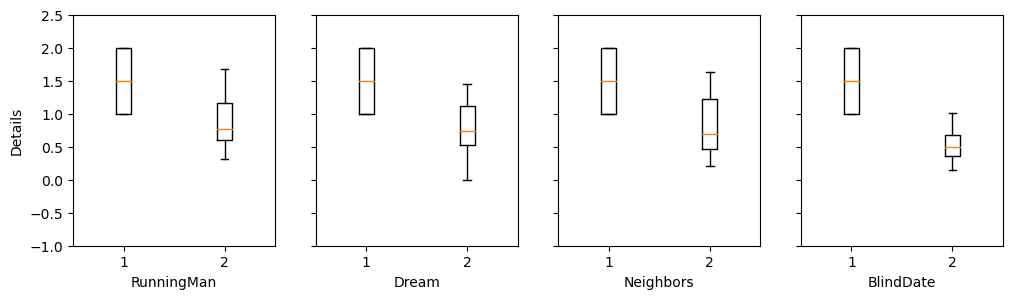

In [516]:
from statsmodels.stats.anova import AnovaRM

# Compare vis and aud seperately
run1_ec = run1_vis_ec + run1_aud_ec
run2_ec = run2_vis_ec + run2_aud_ec

dre1_ec = dre1_vis_ec + dre1_aud_ec
dre2_ec = dre2_vis_ec + dre2_aud_ec

nei1_ec = nei1_vis_ec + nei1_aud_ec
nei2_ec = nei2_vis_ec + nei2_aud_ec

bli1_ec = bli1_vis_ec + bli1_aud_ec
bli2_ec = bli2_vis_ec + bli2_aud_ec


story1_ec = {'RunningMan' : run1_ec.T, 'Dream': dre1_ec.T, 'Neighbors': nei1_ec.T, 'BlindDate':bli1_ec.T}
story2_ec = {'RunningMan' : run2_ec.T, 'Dream': dre2_ec.T, 'Neighbors': nei2_ec.T, 'BlindDate':bli2_ec.T}

for story in ['RunningMan', 'Dream', 'Neighbors', 'BlindDate']: 
    #Subject check 
    subject = np.arange(1,34)
    sub_sm_exclude = [9, 26]
    sub_sm = np.delete(subject, sub_sm_exclude)
    sub_id = np.concatenate((sub_sm,sub_sm))

    vcond = np.ones(31) 
    acond = np.ones(31)*2
    cond = np.concatenate((vcond,acond))
    
    print(story1_ec[story].shape, story2_ec[story].shape)
    df = pd.DataFrame()
    df['id'] = sub_id
    df['output'] = np.concatenate((np.array(story1_ec[story]),np.array(story2_ec[story])))
    df['input'] = cond
    
    print(story) 
    print('mean',story1_ec[story].mean(), 'se', story1_ec[story].std()/31)
    print('mean',story2_ec[story].mean(), 'se', story2_ec[story].std()/31)
    
    print(AnovaRM(data=df, depvar='output', subject='id', within=['input']).fit())
    
    story_df[story] = df[['input','output']]
    
fig, axes = plt.subplots(1, 4, figsize = (12,3),sharey=True) 
for pos, story in enumerate(['RunningMan', 'Dream', 'Neighbors', 'BlindDate']): 
    axes[pos].boxplot(story_df[story])
    axes[pos].set_ylim(-1.0, 2.5)
    axes[pos].set_xlabel(f'{story}')
    axes[0].set_ylabel('Details')

plt.show()   



In [508]:
story1_ec = {'RunningMan' : run1_ec.T, 'Dream': dre1_ec.T, 'Neighbors': nei1_ec.T, 'BlindDate':bli1_ec.T}
story2_ec = {'RunningMan' : run2_ec.T, 'Dream': dre2_ec.T, 'Neighbors': nei2_ec.T, 'BlindDate':bli2_ec.T}
run = story2_ec['BlindDate'].values
run[7]

array([0.])

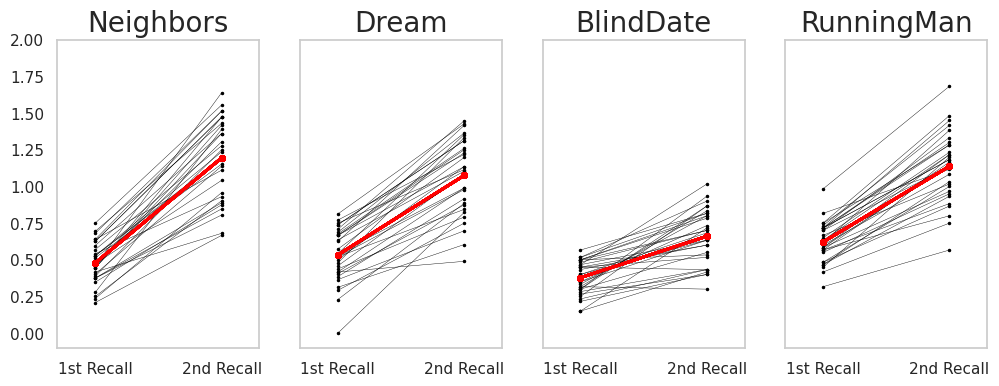

In [795]:
fig, axes = plt.subplots(1, 4, figsize = (12,4),sharey=True)   

story1_ec = {'RunningMan' : run1_ec.T, 'Dream': dre1_ec.T, 'Neighbors': nei1_ec.T, 'BlindDate':bli1_ec.T}
story2_ec = {'RunningMan' : run2_ec.T, 'Dream': dre2_ec.T, 'Neighbors': nei2_ec.T, 'BlindDate':bli2_ec.T}

plt.subplot(1,4,1)
values = [ '1st Recall', '2nd Recall']
# run1 = story1_ec['RunningMan'].values
# run2 = story2_ec['RunningMan'].values

for i in range(0,31):
    x = [1,2]
    y = [story1_ec['Neighbors'].values[i], story2_ec['Neighbors'].values[i]]
    y2 = [story1_ec['Neighbors'].mean(), story2_ec['Neighbors'].mean()]
    plt.ylim([-0.1, 2])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Neighbors', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,2)
for i in range(0,31):
    x = [1,2]
    y = [story1_ec['Dream'].values[i], story2_ec['Dream'].values[i]]
    y2 = [story1_ec['Dream'].mean(), story2_ec['Dream'].mean()]
    plt.ylim([-0.1, 2])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Dream', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,3)
for i in range(0,31):
    x = [1,2]
    y = [story1_ec['BlindDate'].values[i], story2_ec['BlindDate'].values[i]]
    y2 = [story1_ec['BlindDate'].mean(), story2_ec['BlindDate'].mean()]
    plt.ylim([-0.1, 2])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('BlindDate', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,4)   
for i in range(0,31):
    x = [1,2]
    y = [story1_ec['RunningMan'].values[i], story2_ec['RunningMan'].values[i]]
    y2 = [story1_ec['RunningMan'].mean(), story2_ec['RunningMan'].mean()]
    plt.ylim([-0.1, 2])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(False)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('RunningMan', fontsize =20) 
    plt.grid(False)

plot_path = os.path.join(output_dir, "EventCounting.png")
plt.savefig(plot_path)
plt.show()

## Recall Updating score 

In [408]:
# Test Change 
df = ec_sheet

run_vis_change = df.iloc[12:13, 0::2]
run_aud_change = df.iloc[12:13, 1::2]

dre_vis_change = df.iloc[24:25, 0::2]
dre_aud_change = df.iloc[24:25, 1::2]

nei_vis_change = df.iloc[40:41, 0::2]
nei_aud_change = df.iloc[40:41, 1::2]

bli_vis_change = df.iloc[54:55, 0::2]
bli_aud_change = df.iloc[54:55, 1::2]

run_aud_change.columns = run_vis_change.columns
dre_aud_change.columns = dre_vis_change.columns
nei_aud_change.columns = nei_vis_change.columns
bli_aud_change.columns = bli_vis_change.columns


RunningMan
mean RunningMan
Run_change    0.06828
dtype: float64 se RunningMan
Run_change    0.003203
dtype: float64
mean RunningMan
Run_change    0.447849
dtype: float64 se RunningMan
Run_change    0.004276
dtype: float64
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 140.4889 1.0000 30.0000 0.0000

Dream
mean RunningMan
Dre_change    0.020497
dtype: float64 se RunningMan
Dre_change    0.004836
dtype: float64
mean RunningMan
Dre_change    0.521169
dtype: float64 se RunningMan
Dre_change    0.005422
dtype: float64
               Anova
      F Value  Num DF  Den DF Pr > F
------------------------------------
input 109.0276 1.0000 30.0000 0.0000

Neighbors
mean RunningMan
Nei_change    0.22043
dtype: float64 se RunningMan
Nei_change    0.004261
dtype: float64
mean RunningMan
Nei_change    0.495968
dtype: float64 se RunningMan
Nei_change    0.004469
dtype: float64
               Anova
      F Value Num DF  Den DF Pr > F
----------------

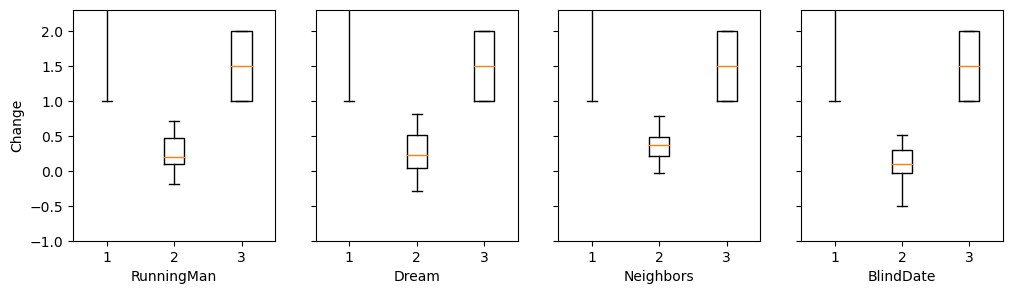

In [524]:
story1_vis_change = {'RunningMan' : run_vis_change.T, 'Dream': dre_vis_change.T, 'Neighbors': nei_vis_change.T, 'BlindDate':bli_vis_change.T}
story2_aud_change = {'RunningMan' : run_aud_change.T, 'Dream': dre_aud_change.T, 'Neighbors': nei_aud_change.T, 'BlindDate':bli_aud_change.T}


from statsmodels.stats.anova import AnovaRM
 
story_df = {}
for pos, story in enumerate(['RunningMan', 'Dream', 'Neighbors', 'BlindDate']): 
    #Subject check 
    subject = np.arange(1,34)
    sub_sm_exclude = [9, 26]
    sub_sm = np.delete(subject, sub_sm_exclude)
    sub_id = np.concatenate((sub_sm,sub_sm))

    vcond = np.ones(31) 
    acond = np.ones(31)*2
    cond = np.concatenate((vcond,acond))
    
    df = pd.DataFrame()
    df['id'] = sub_id
    df['output'] = np.concatenate((np.array(story1_vis_change[story]),np.array(story2_aud_change[story])))
    df['input'] = cond
    
    #story_df[story] = df[['output','input']] 
    story_df[story] = df

    print(story) 

    print('mean',story1_vis_change[story].mean(), 'se', story1_vis_change[story].std()/31)
    print('mean',story2_aud_change[story].mean(), 'se', story2_aud_change[story].std()/31)
    
    print(AnovaRM(data=df, depvar='output', subject='id', within=['input']).fit())

fig, axes = plt.subplots(1, 4, figsize = (12,3),sharey=True) 
for pos, story in enumerate(['RunningMan', 'Dream', 'Neighbors', 'BlindDate']): 
    axes[pos].boxplot(story_df[story])
    axes[pos].set_ylim(-1.0, 2.3)
    axes[pos].set_xlabel(f'{story}')
    axes[0].set_ylabel('Change')



plt.show()

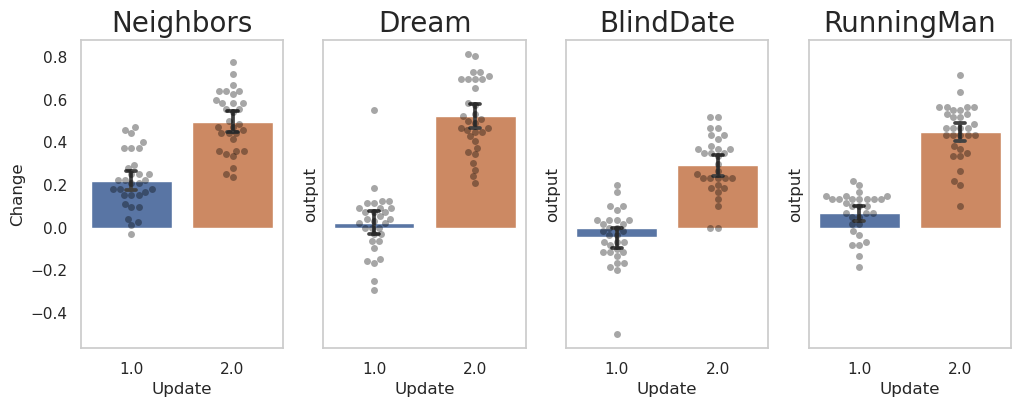

In [796]:
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 4, figsize = (12,4),sharey=True)   
#plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1,4,1)
sns.barplot(x="input", y="output", data=story_df['Neighbors'], capsize=.1, errorbar=('ci', 95))
sns.swarmplot(x="input", y="output", data=story_df['Neighbors'], color="0", alpha=.35)
plt.title('Neighbors', fontsize =20)
plt.xlabel('Update')
plt.ylabel('Change') 
plt.grid(False)

plt.subplot(1,4,2)
sns.barplot(x="input", y="output", data=story_df['Dream'], capsize=.1, errorbar=('ci', 95))
sns.swarmplot(x="input", y="output", data=story_df['Dream'], color="0", alpha=.35)
plt.title('Dream', fontsize =20)
plt.xlabel('Update')
plt.grid(False)


plt.subplot(1,4,3)
sns.barplot(x="input", y="output", data=story_df['BlindDate'], capsize=.1, errorbar=('ci', 95))
sns.swarmplot(x="input", y="output", data=story_df['BlindDate'], color="0", alpha=.35)
plt.title('BlindDate', fontsize =20)
plt.xlabel('Update')
plt.grid(False)

plt.subplot(1,4,4)
sns.barplot(x="input", y="output", data=story_df['RunningMan'], capsize=.1, errorbar=('ci', 95))
sns.swarmplot(x="input", y="output", data=story_df['RunningMan'], color="0", alpha=.35)
plt.title('RunningMan', fontsize =20)
plt.xlabel('Update')
plt.grid(False)

plot_path = os.path.join(output_dir, "EventChange.png")
plt.savefig(plot_path)
plt.show()

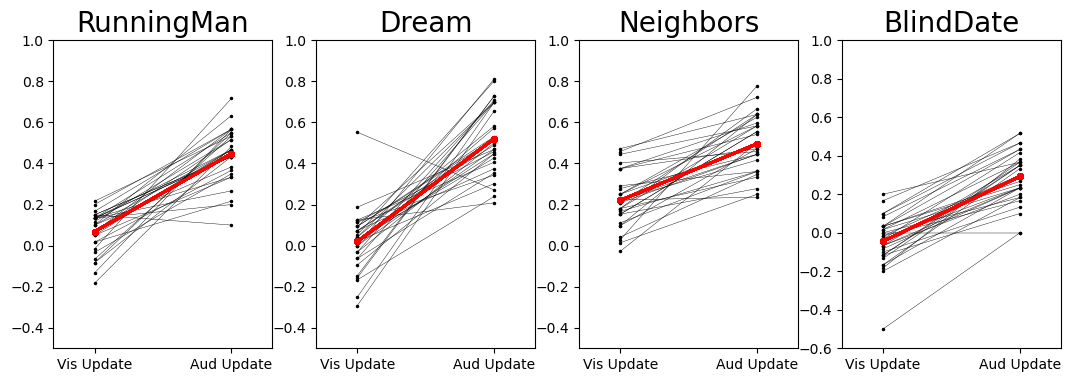

In [523]:
plt.rcParams['figure.figsize'] = (13, 4)
story1_vis_change = {'RunningMan' : run_vis_change.T, 'Dream': dre_vis_change.T, 'Neighbors': nei_vis_change.T, 'BlindDate':bli_vis_change.T}
story2_aud_change = {'RunningMan' : run_aud_change.T, 'Dream': dre_aud_change.T, 'Neighbors': nei_aud_change.T, 'BlindDate':bli_aud_change.T}

plt.subplot(1,4,1)
values = [ 'Vis Update', 'Aud Update']
# run1 = story1_ec['RunningMan'].values
# run2 = story2_ec['RunningMan'].values

for i in range(0,31):
    x = [1,2]
    y = [story1_vis_change['RunningMan'].values[i], story2_aud_change['RunningMan'].values[i]]
    y2 = [story1_vis_change['RunningMan'].mean(), story2_aud_change['RunningMan'].mean()]
    plt.ylim([-0.5, 1])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('RunningMan', fontsize =20) 

plt.subplot(1,4,2)
for i in range(0,31):
    x = [1,2]
    y = [story1_vis_change['Dream'].values[i], story2_aud_change['Dream'].values[i]]
    y2 = [story1_vis_change['Dream'].mean(), story2_aud_change['Dream'].mean()]
    plt.ylim([-0.5, 1])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Dream', fontsize =20) 

plt.subplot(1,4,3)
for i in range(0,31):
    x = [1,2]
    y = [story1_vis_change['Neighbors'].values[i], story2_aud_change['Neighbors'].values[i]]
    y2 = [story1_vis_change['Neighbors'].mean(), story2_aud_change['Neighbors'].mean()]
    plt.ylim([-0.5, 1])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Neighbors', fontsize =20) 
    
plt.subplot(1,4,4)   
for i in range(0,31):
    x = [1,2]
    y = [story1_vis_change['BlindDate'].values[i], story2_aud_change['BlindDate'].values[i]]
    y2 = [story1_vis_change['BlindDate'].mean(), story2_aud_change['BlindDate'].mean()]
    plt.ylim([-0.6, 1])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('BlindDate', fontsize =20) 

## Make new variables 

In [890]:
df = ec_sheet
run1_vis_ec = df.iloc[10:11, 0::2]
run1_aud_ec = df.iloc[10:11, 1::2]
run2_vis_ec = df.iloc[11:12, 0::2]
run2_aud_ec = df.iloc[11:12, 1::2]

run1_aud_ec.columns = run1_vis_ec.columns
run2_aud_ec.columns = run2_vis_ec.columns

dre1_vis_ec = df.iloc[22:23, 0::2]
dre1_aud_ec = df.iloc[22:23, 1::2]
dre2_vis_ec = df.iloc[23:24, 0::2]
dre2_aud_ec = df.iloc[23:24, 1::2]

dre1_aud_ec.columns = dre1_vis_ec.columns
dre2_aud_ec.columns = dre2_vis_ec.columns

nei1_vis_ec = df.iloc[38:39, 0::2]
nei1_aud_ec = df.iloc[38:39, 1::2]
nei2_vis_ec = df.iloc[39:40, 0::2]
nei2_aud_ec = df.iloc[39:40, 1::2]

nei1_aud_ec.columns = nei1_vis_ec.columns
nei2_aud_ec.columns = nei2_vis_ec.columns

bli1_vis_ec = df.iloc[52:53, 0::2]
bli1_aud_ec = df.iloc[52:53, 1::2]
bli2_vis_ec = df.iloc[53:54, 0::2]
bli2_aud_ec = df.iloc[53:54, 1::2]

bli1_aud_ec.columns = bli1_vis_ec.columns
bli2_aud_ec.columns = bli2_vis_ec.columns

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  import sys


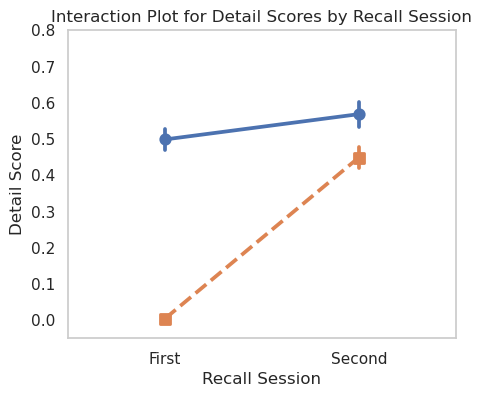

In [1024]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['font.family'] = 'serif'  # This sets a generic 'Serif' family
plt.rcParams['font.serif'] = ['Times New Roman']  # Optionally specify the exact font

# 상호작용 효과 플롯
sns.pointplot(data=df, x='RecallSession', y='Score', hue='DetailType', ci=95, markers=["o", "s"], linestyles=["-", "--"])
plt.title('Interaction Plot for Detail Scores by Recall Session')
plt.xlabel('Recall Session')
plt.ylabel('Detail Score')
plt.ylim([-0.05, 0.8])
plt.grid(False)  # 그리드 제거
#plt.legend(loc = 'lower right')
plt.legend('', frameon=False)
plot_path = os.path.join(output_dir, "interaction effect.png")
plt.savefig(plot_path)
plt.show()

In [1009]:
detailtype = np.tile(np.repeat(['Visual', 'Audio'], 31*2), 4)
storytype = np.repeat(['nei', 'dre', 'bli', 'run'], 4*31)
subj =np.tile(run1_vis_ec.columns,16)
recalltype = np.tile(np.repeat(['First', 'Second'],31),8)

In [1010]:
socres = np.concatenate([nei1_vis_ec,nei2_vis_ec,nei1_aud_ec,nei2_aud_ec,
                         dre1_vis_ec,dre2_vis_ec,dre1_aud_ec,dre2_aud_ec,
                         bli1_vis_ec,bli2_vis_ec,bli1_aud_ec,bli2_aud_ec,
                         run1_vis_ec,run2_vis_ec,run1_aud_ec,run2_aud_ec], axis = None)

In [1011]:
data = {
    'Participant':subj,
    'Score': socres, 
    'DetailType': detailtype,
    'storyType' : storytype,
    'RecallSession': recalltype
}

df = pd.DataFrame(data)

# 데이터 확인
print(df.head())

  Participant     Score DetailType storyType RecallSession
0         S01  0.750000     Visual       nei         First
1         S02  0.416667     Visual       nei         First
2         S03  0.527778     Visual       nei         First
3         S04  0.472222     Visual       nei         First
4         S05  0.527778     Visual       nei         First


In [929]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 리콜 세션과 디테일 타입에 따른 분산분석 모델 생성
model = ols('Score ~ C(DetailType) * C(RecallSession)*C(storyType)', data=df).fit()

# ANOVA 테이블 출력
anova_results = anova_lm(model, typ=2)
print(anova_results)


                                                sum_sq     df           F  \
C(DetailType)                                11.695866    1.0  813.256856   
C(RecallSession)                              8.197959    1.0  570.034450   
C(storyType)                                  2.481967    3.0   57.526794   
C(DetailType):C(RecallSession)                4.352347    1.0  302.634768   
C(DetailType):C(storyType)                    0.752332    3.0   17.437468   
C(RecallSession):C(storyType)                 0.737723    3.0   17.098868   
C(DetailType):C(RecallSession):C(storyType)   0.207158    3.0    4.801486   
Residual                                      6.903127  480.0         NaN   

                                                    PR(>F)  
C(DetailType)                                2.263805e-105  
C(RecallSession)                              1.264837e-83  
C(storyType)                                  8.762653e-32  
C(DetailType):C(RecallSession)                6.452081e-53  
C

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  # This is added back by InteractiveShellApp.init_path()


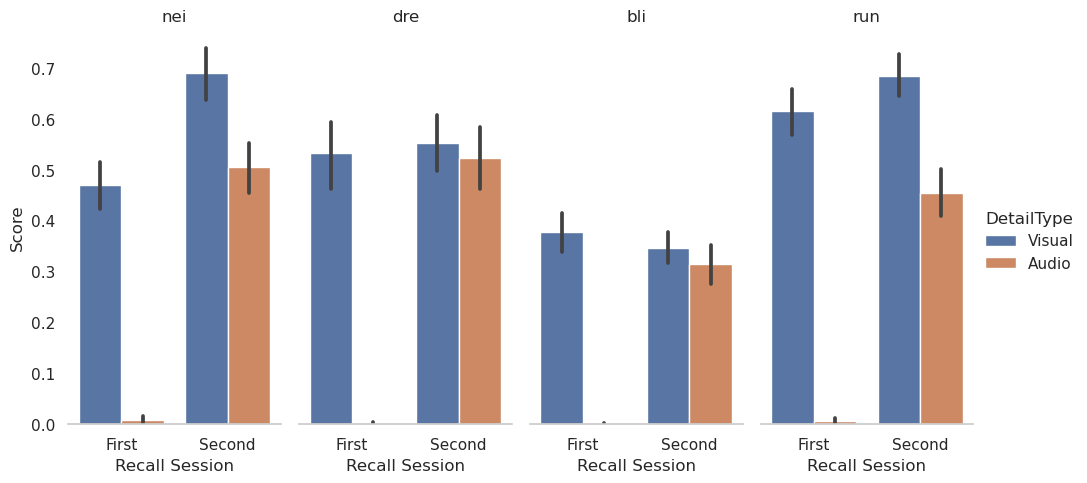

In [1016]:
# FacetGrid를 사용하여 삼원 상호작용 플롯 생성
g = sns.catplot(
    x='RecallSession', 
    y='Score', 
    hue='DetailType', 
    col='storyType', 
    data=df, 
    kind='bar', 
    ci=95, 
    palette='deep',
    height=5, aspect=.5)

# 각 subplot에 대한 타이틀 설정 및 축 조정

g.set_titles("{col_name}", fontsize = 40)
g.set_axis_labels("Recall Session", "Score")
#g.add_legend(title="Detail Type")

# 각 서브플롯의 그리드 제거
for ax in g.axes.flat:
    ax.grid(False)  # 서브플롯의 그리드 제거

# 왼쪽 및 상단의 스파인 제거
g.despine(left=True)

# 그래프 표시
plt.grid(False)  # 그리드 제거
plot_path = os.path.join(output_dir, "4stories_score.png")
plt.savefig(plot_path)
plt.show()

## Comparing with Intra-subject correlation

In [812]:
from nltools.stats import isc, isfc
import os
import glob
import numpy as np
# dir for neural 
story_dir = '/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/_DATA'
May_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'

#Subject check 
sub_sm = np.arange(1,34)
sub_sm_exclude = [8, 25] #exclude 9 & 26
subjects = np.delete(sub_sm, sub_sm_exclude)
#print(subject)
print(subjects)


# load story sequence 
import scipy.io as sio

all_story = {}
# Load May Data
for sub in subjects:
    #print(sub)
    mat = sio.loadmat(glob.glob(os.path.join(story_dir, 'fMRItdsgn', 'fMRI_May', f'sub-{sub}_*.mat'))[0])
    story = []
    for i in np.arange(0,4):
        temp = mat['subj'][0][0][7][0][i][0]
        if temp == 'Blind Date':
            temp = 'BlindDate'
        elif temp == 'Runningman':
            temp = 'RunningMan'
        elif temp == 'Way To School':
            temp = 'WayToSchool'
        elif temp == 'Business Lunch':
            temp = 'BusinessLunch'
        elif temp == 'neighbors':
            temp = 'Neighbors'
        story = np.append(story, temp)
    #all_story[str(int(sub)+8)] = story
    all_story[sub] = story
#Fix story sequence
story_sequece = all_story[1]
story_sequece

# Data Load & Trimming 
onset = {'set-4' :  [9, 119, 239, 359], 'set-6': [9, 129, 249, 369, 489 ], 'Dream1' : [9, 119, 239, 359], 'Dream2' : [9, 129, 239, 359], 'Dream3' : [9, 129, 249, 359], 'Dream4' : [9, 129, 249, 369]}
offset = {'set-4' : [116, 236, 356, 476], 'set-6': [126, 246, 366, 486, 606], 'Dream1' : [116, 236, 356, 476], 'Dream2' : [126, 236, 356, 476], 'Dream3' : [126, 246, 356, 476], 'Dream4' : [126, 246, 366, 476]} 
# May는 Dream의 위치에 따라 Trimming이 달라져야함.. ;D

sub_story_timeseries = {}
for sub in subjects:
    story = {} 
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    cond = 'Dream'+str(int(sequence)+1)
    denoised_dir = os.path.join(May_dir, 'denoised', 'denoised_2023')
    if sub < 10:
        data = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-0{sub}_task-encoding_run-1_Average_ROI_n50.csv'))   
        data2 = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-0{sub}_task-encoding_run-2_Average_ROI_n50.csv')) 
    else: 
        data = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-{sub}_task-encoding_run-1_Average_ROI_n50.csv'))   
        data2 = pd.read_csv(os.path.join(denoised_dir,'Averaged_ROI', f'sub-{sub}_task-encoding_run-2_Average_ROI_n50.csv'))
    
    
    #Segmentation for each story 
    for i in np.arange(0,4):
        storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}
        story[storyName[all_story[sub][i]]] = {'visual' : data[onset[cond][i]:offset[cond][i]], 'audio' : data2[onset[cond][i]:offset[cond][i]]}
    
    sub_story_timeseries[sub] = story

[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29 30 31 32 33]


In [813]:
ROIs = {}
for roi in [1,5, 6, 19]: #5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC
    sub_rois = {}
    for sub in subjects:
        story_roi = {}
        for j in ['run', 'blind', 'dream', 'nei']:
            story_timeseries = sub_story_timeseries[sub][j]
            run_rois = {}
            for run in ['visual', 'audio']:
                run_rois[run]  = sub_story_timeseries[sub][j][run].iloc[:, roi].reset_index(drop = True)
            story_roi[j] = pd.DataFrame(run_rois)
        sub_rois[sub] = story_roi
    ROIs[roi] = sub_rois

In [814]:
# calculate inter-sc for each event 
#Segmentation for each story 
seg_IntraSC_r, seg_IntraSC_p = {}, {}
for roi in [1,5, 6, 19]: #5 - TPJ / 6 - PCC/precuneus / 19 - PCC/superior LOC /28 - HPC /32-vmPFC  
    seg_story_ISCr, seg_story_ISCp = {}, {}
    for story in ['run', 'blind', 'dream', 'nei']:
        seg_sub_ISCr, seg_sub_ISCp = [], [] 
        for sub in subjects: 
            data = ROIs[roi][sub][story]
            stats = isc(data, n_bootstraps=10000, metric='median', method='bootstrap', exclude_self_corr=False)
            seg_sub_ISCr.append(stats['isc'])
            seg_sub_ISCp.append(stats['p'])
        seg_story_ISCr[story], seg_story_ISCp[story] = seg_sub_ISCr, seg_sub_ISCp
    seg_IntraSC_r[roi], seg_IntraSC_p[roi]= seg_story_ISCr, seg_story_ISCp

In [1001]:

#detailtype = np.tile(np.repeat(['Visual', 'Audio'], 31*2), 4)
storytype2 = np.repeat(['nei', 'dre', 'bli', 'run'], 31)
subj2 =np.tile(run1_vis_ec.columns,4)
print(score2.shape)
print(storytype.shape)
print(subj2.shape)

(124,)
(124,)
(124,)


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.



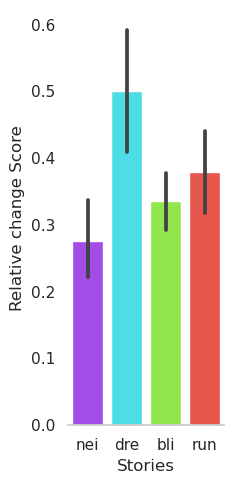

In [1035]:
change_run = story_aud_change['run'] - story_vis_change['run']
change_blind = story_aud_change['blind'] -story_vis_change['blind']
change_dream = story_aud_change['dream']-story_vis_change['dream']
change_nei = story_aud_change['nei']-story_vis_change['nei']

score2 = np.concatenate([change_nei, change_dream, change_blind, change_run], axis = None)
data2 = {'Participant':subj2,'Score': score2, 'storyType' : storytype2}
df = pd.DataFrame(data2)

# # FacetGrid를 사용하여 삼원 상호작용 플롯 생성
# g = sns.catplot(
#     x='storyType', 
#     y='Score',  
#     data=df, 
#     kind='bar', 
#     ci=95, 
#     palette='deep',
#     height=5, aspect=.5)
custom_palette = ["#A434FF", "#34F4FF", "#8FFF34", "#FF3F34"]  # Example hexadecimal colors
g = sns.catplot(
    x='storyType', 
    y='Score',  
    data=df, 
    kind='bar', 
    ci=95, 
    palette=custom_palette,
    height=5, aspect=.5)

# 각 subplot에 대한 타이틀 설정 및 축 조정

g.set_titles("{col_name}", fontsize = 40)
g.set_axis_labels("Stories", "Relative change Score")
#g.add_legend(title="Detail Type")

# 각 서브플롯의 그리드 제거
for ax in g.axes.flat:
    ax.grid(False)  # 서브플롯의 그리드 제거

# 왼쪽 및 상단의 스파인 제거
g.despine(left=True)

# 그래프 표시
plt.grid(False)  # 그리드 제거

plot_path = os.path.join(output_dir, "RelativeChangeScore.png")
plt.savefig(plot_path)
plt.show()

In [1068]:
print(story1_ec[story].index)
print(story2_ec[story].index)
print(story_vis_change[story].index)
print(story_vis_change[story].index)

Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32',
       'S33'],
      dtype='object')
Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32',
       'S33'],
      dtype='object')
Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32',
       'S33'],
      dtype='object')
Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S27', 

In [1139]:
change['run'] = story_aud_change['run'] - story_vis_change['run']


Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32',
       'S33'],
      dtype='object')

In [1162]:
# Correlation between ISC and change /overall performance 
story_vis_change = {'run' : run_vis_change.T, 'dream': dre_vis_change.T, 'nei': nei_vis_change.T, 'blind':bli_vis_change.T}
story_aud_change = {'run' : run_aud_change.T, 'dream': dre_aud_change.T, 'nei': nei_aud_change.T, 'blind':bli_aud_change.T} 
story1_ec = {'run' : run1_ec.T['Run1'], 'dream': dre1_ec.T['Dre1'], 'nei': nei1_ec.T['Nei1'], 'blind':bli1_ec.T['Bli1']}
story2_ec = {'run' : run2_ec.T['Run2 '], 'dream': dre2_ec.T['Dre2'], 'nei': nei2_ec.T['Nei2'], 'blind':bli2_ec.T['Bli2']}


# 예제 데이터 생성
# 첫 번째 매트릭스: 30명의 참가자에게 4개의 점수

change, changeSum, allsum = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
change['run'] = story_aud_change['run'] - story_vis_change['run']
change['nei'] = story_aud_change['nei'] - story_vis_change['nei']
change['dream'] = story_aud_change['dream'] - story_vis_change['dream']
change['blind'] = story_aud_change['blind'] - story_vis_change['blind']

changeSum['run'] = story_aud_change['run'] + story_vis_change['run'] 
changeSum['nei'] = story_aud_change['nei'] + story_vis_change['nei']
changeSum['dream'] = story_aud_change['dream'] + story_vis_change['dream']
changeSum['blind'] = story_aud_change['blind'] + story_vis_change['blind']

allsum['run'] = story2_ec['run']
allsum['nei'] = story2_ec['nei']
allsum['dream'] = story2_ec['dream']
allsum['blind'] = story2_ec['blind']

tpj, pcc, pcc2  = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

tpj['run'] = np.array(seg_IntraSC_r[5]['run'])
tpj['nei'] = np.array(seg_IntraSC_r[5]['nei'])
tpj['dream'] = np.array(seg_IntraSC_r[5]['dream'])
tpj['blind'] = np.array(seg_IntraSC_r[5]['blind'])

pcc['run'] = np.array(seg_IntraSC_r[19]['run'])
pcc['nei'] = np.array(seg_IntraSC_r[19]['nei'])
pcc['dream'] = np.array(seg_IntraSC_r[19]['dream'])
pcc['blind'] = np.array(seg_IntraSC_r[19]['blind'])

pcc2['run'] = np.array(seg_IntraSC_r[6]['run'])
pcc2['nei'] = np.array(seg_IntraSC_r[6]['nei'])
pcc2['dream'] = np.array(seg_IntraSC_r[6]['dream'])
pcc2['blind'] = np.array(seg_IntraSC_r[6]['blind'])


In [ ]:
# 각 참가자의 상관 계수 계산
chang_tpj_correlations, change_pcc_correlations, change_pcc2_correlations = [], [], [] 
changeSum_tpj_correlations, changeSum_pcc_correlations, changeSum_pcc2_correlations = [], [], [] 
allsum_tpj_correlations, allsum_pcc_correlations, allsum_pcc2_correlations = [], [], [] 

for sub in range(30):
    correlation = np.corrcoef(change.iloc[sub], tpj.iloc[sub])[0, 1]
    change_tpj_correlations.append(correlation)
    
    correlation = np.corrcoef(change.iloc[sub], pcc.iloc[sub])[0, 1]
    change_pcc_correlations.append(correlation)
    
    correlation = np.corrcoef(change.iloc[sub], pcc2.iloc[sub])[0, 1]
    change_pcc2_correlations.append(correlation)

    
    correlation = np.corrcoef(changeSum.iloc[sub], tpj.iloc[sub])[0, 1]
    changeSum_tpj_correlations.append(correlation)
    
    correlation = np.corrcoef(changeSum.iloc[sub], pcc.iloc[sub])[0, 1]
    changeSum_pcc_correlations.append(correlation)
    
    correlation = np.corrcoef(changeSum.iloc[sub], pcc2.iloc[sub])[0, 1]
    changeSum_pcc2_correlations.append(correlation)
    

    correlation = np.corrcoef(allsum.iloc[sub], tpj.iloc[sub])[0, 1]
    allsum_tpj_correlations.append(correlation)
    
    correlation = np.corrcoef(allsum.iloc[sub], pcc.iloc[sub])[0, 1]
    allsum_tpj_correlations.append(correlation)
    
    correlation = np.corrcoef(allsum.iloc[sub], pcc2.iloc[sub])[0, 1]
    allsum_tpj_correlations.append(correlation)

# 결과 출력
print("tpj:", np.array(change_tpj_correlations).mean())
print("pcc:", np.array(change_pcc_correlations).mean())
print("pcc2:", np.array(change_pcc2_correlations).mean())


print("tpj:", np.array(changeSum_tpj_correlations).mean())
print("pcc:", np.array(changeSum_pcc_correlations).mean())
print("pcc2:", np.array(changeSum_pcc2_correlations).mean())

print("tpj:", np.array(allsum_tpj_correlations).mean())
print("pcc:", np.array(allsum_pcc_correlations).mean())
print("pcc2:", np.array(allsum_pcc2_correlations).mean())

R-squared = 0.10
p-value = 2.909e-01
R-squared = -0.19
p-value = 3.330e-02


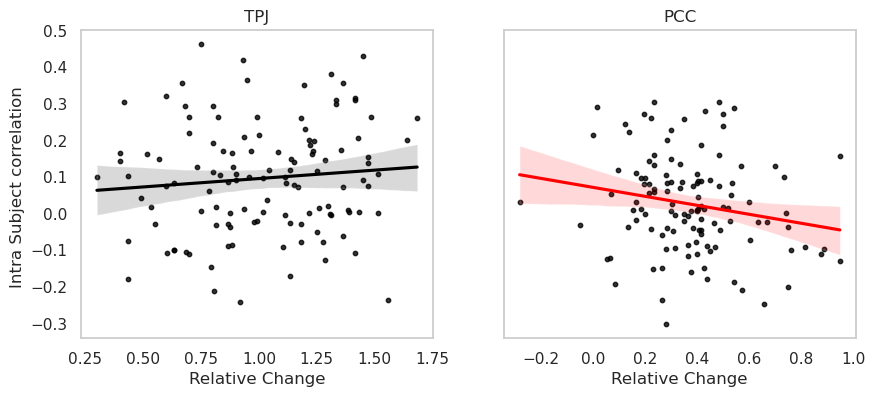

In [1163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

fig, axes = plt.subplots(1, 2, figsize = (10,4),sharey=True)   
#plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1,2,1)
# 모든 참가자의 점수를 한 DataFrame에 모으기
all_scores = pd.DataFrame()
for sub in range(30):
    scores_df1 = allsum.iloc[sub]
    scores_df2 = tpj.iloc[sub]
    all_scores = all_scores.append(pd.DataFrame({
        'DF1_Scores': scores_df1,
        'DF2_Scores': scores_df2}))

# Perform linear regression
regression_result = linregress(all_scores['DF1_Scores'], all_scores['DF2_Scores'])
# Get R-squared value
r_squared = regression_result.rvalue

print(f'R-squared = {r_squared:.2f}\np-value = {regression_result.pvalue:.3e}')

# 산포도와 회귀선 그리기
sns.regplot(x='DF1_Scores', y='DF2_Scores', data=all_scores, color='black', line_kws={'color': 'black'}, marker='o', scatter_kws={'s': 10, 'color': 'black'})
plt.title('TPJ')
plt.xlabel('Relative Change')
plt.ylabel('Intra Subject correlation ')
plt.grid(False)

plt.subplot(1,2,2)
all_scores = pd.DataFrame()
for sub in range(30):
    scores_df1 = change.iloc[sub]
    scores_df2 = pcc.iloc[sub]
    all_scores = all_scores.append(pd.DataFrame({
        'DF1_Scores': scores_df1,
        'DF2_Scores': scores_df2}))
    
# Perform linear regression
regression_result = linregress(all_scores['DF1_Scores'], all_scores['DF2_Scores'])

# Get R-squared value
r_squared = regression_result.rvalue

# Annotate the plot with R-squared and p-value
print(f'R-squared = {r_squared:.2f}\np-value = {regression_result.pvalue:.3e}')

# 산포도와 회귀선 그리기
sns.regplot(x='DF1_Scores', y='DF2_Scores', data=all_scores, color='black',line_kws={'color': 'red'}, marker='o', scatter_kws={'s': 10, 'color': 'black'})
plt.title('PCC')
plt.xlabel('Relative Change')
plt.ylabel(' ')
plt.grid(False)

plot_path = os.path.join(output_dir, "PCCTPJ2ndCorr.png")
plt.savefig(plot_path)
plt.show()

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.



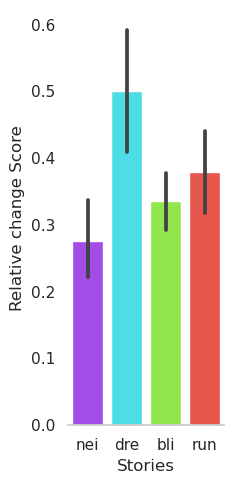

In [1035]:
change_run = story_aud_change['run'] - story_vis_change['run']
change_blind = story_aud_change['blind'] -story_vis_change['blind']
change_dream = story_aud_change['dream']-story_vis_change['dream']
change_nei = story_aud_change['nei']-story_vis_change['nei']

score2 = np.concatenate([change_nei, change_dream, change_blind, change_run], axis = None)
data2 = {'Participant':subj2,'Score': score2, 'storyType' : storytype2}
df = pd.DataFrame(data2)

# # FacetGrid를 사용하여 삼원 상호작용 플롯 생성
# g = sns.catplot(
#     x='storyType', 
#     y='Score',  
#     data=df, 
#     kind='bar', 
#     ci=95, 
#     palette='deep',
#     height=5, aspect=.5)
custom_palette = ["#A434FF", "#34F4FF", "#8FFF34", "#FF3F34"]  # Example hexadecimal colors
g = sns.catplot(
    x='storyType', 
    y='Score',  
    data=df, 
    kind='bar', 
    ci=95, 
    palette=custom_palette,
    height=5, aspect=.5)

# 각 subplot에 대한 타이틀 설정 및 축 조정

g.set_titles("{col_name}", fontsize = 40)
g.set_axis_labels("Stories", "Relative change Score")
#g.add_legend(title="Detail Type")

# 각 서브플롯의 그리드 제거
for ax in g.axes.flat:
    ax.grid(False)  # 서브플롯의 그리드 제거

# 왼쪽 및 상단의 스파인 제거
g.despine(left=True)

# 그래프 표시
plt.grid(False)  # 그리드 제거

plot_path = os.path.join(output_dir, "RelativeChangeScore.png")
plt.savefig(plot_path)
plt.show()

Text(1.526689814814815, 0.0968855342430048, 'Beta: 0.23, p-value: 0.41')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


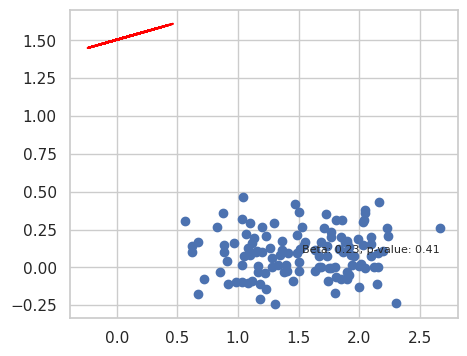

In [1146]:
from sklearn.linear_model import LinearRegression

all_scores = pd.DataFrame()
for sub in range(30):
    scores_df1 = allsum.iloc[sub]
    scores_df2 = tpj.iloc[sub]
    all_scores = all_scores.append(pd.DataFrame({
        'Behav_score': scores_df1,
        'Neural_score': scores_df2}))

# 회귀 모델 학습 및 회귀선 그리기
regression_model = LinearRegression()
regression_model.fit(np.array(all_scores['Neural_score']).reshape(-1, 1), all_scores['Behav_score'])
regression_line = regression_model.predict(np.array(all_scores['Neural_score']).reshape(-1, 1))

plt.scatter(all_scores['Behav_score'], all_scores['Neural_score']) # Scatter plot 
plt.plot(all_scores['Neural_score'], regression_line, color='red', label='Regression Line') # regression 

 # 회귀선의 베타값과 유의확률 표시
beta = regression_model.coef_[0]
p_value = pearsonr(all_scores['Behav_score'], all_scores['Neural_score'])[1]
plt.text(all_scores['Behav_score'].mean(), all_scores['Neural_score'].mean(), f'Beta: {beta:.2f}, p-value: {p_value:.2f}', fontsize=8)


## Correlation between sub /cond

In [651]:
#Load behav_data 
use_col = np.arange(3,65)
run1_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'RunningMan', usecols = use_col)
run2_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'RunningMan2', usecols = use_col)

dream1_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'Dream', usecols = use_col)
dream2_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'Dream2', usecols = use_col)

nei1_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'Neigobors', usecols = use_col)
nei2_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'Neighbors2', usecols = use_col)

bli1_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'BlindDate', usecols = use_col)
bli2_sheet = pd.read_excel(os.path.join(EC_dir, 'Event_counting_revision_2-2.xlsx'), sheet_name = 'BlindDate2', usecols = use_col)

In [750]:
run1_vis.columns

Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32',
       'S33'],
      dtype='object')

In [653]:
#RunningMan
run1_vis = run1_sheet.iloc[0:13, 0::2]
run1_aud = run1_sheet.iloc[0:13, 1::2]

run2_vis = run2_sheet.iloc[0:13, 0::2]
run2_aud = run2_sheet.iloc[0:13, 1::2]

run1_aud.columns = run1_vis.columns
run2_aud.columns = run2_vis.columns

run1 = run1_vis +run1_aud+0.00001
run2 = run2_vis +run2_aud+0.00001

#Dream
dre1_vis = dream1_sheet.iloc[0:12, 0::2]
dre1_aud = dream1_sheet.iloc[0:12, 1::2]

dre2_vis = dream2_sheet.iloc[0:12, 0::2]
dre2_aud = dream2_sheet.iloc[0:12, 1::2]

dre1_aud.columns = dre1_vis.columns
dre2_aud.columns = dre2_vis.columns

dre1= dre1_vis +dre1_aud +0.00001
dre2 = dre2_vis +dre2_aud +0.00001

#Neighbors
nei1_vis = nei1_sheet.iloc[0:13, 0::2]
nei1_aud = nei1_sheet.iloc[0:13, 1::2]

nei2_vis = nei2_sheet.iloc[0:13, 0::2]
nei2_aud = nei2_sheet.iloc[0:13, 1::2]

nei1_aud.columns = nei1_vis.columns
nei2_aud.columns = nei2_vis.columns

nei1 = nei1_vis+nei1_aud+0.00001
nei2 =nei2_vis+nei2_aud+0.00001

#BlindDate
bli1_vis = bli1_sheet.iloc[0:13, 0::2]
bli1_aud = bli1_sheet.iloc[0:13, 1::2]

bli2_vis = bli2_sheet.iloc[0:13, 0::2]
bli2_aud = bli2_sheet.iloc[0:13, 1::2]

bli1_aud.columns = bli1_vis.columns
bli2_aud.columns = bli2_vis.columns

bli1 = bli1_vis+bli1_aud+0.00001
bli2 = bli2_vis+bli2_aud+0.00001

In [701]:
# 참가자 별로 상관 계수와 유의 확률 계산
recall1_patterns = {'run' : run1, 'dre':dre1, 'nei':nei1, 'bli':bli1}
recall2_patterns = {'run' : run2, 'dre':dre2, 'nei':nei2, 'bli':bli2}

all_data1 = pd.concat([recall1_patterns['run'],recall1_patterns['bli'],recall1_patterns['dre'],recall1_patterns['nei']])    
all_data2 = pd.concat([recall2_patterns['run'],recall2_patterns['bli'],recall2_patterns['dre'],recall2_patterns['nei']])    
all_data1.reset_index(inplace=True, drop=True)
all_data2.reset_index(inplace=True, drop=True)


results1 = pd.DataFrame(columns=['Participant', 'Correlation', 'P-value'])


for column in all_data1.columns:
    # 한 참가자의 데이터
    individual_scores = all_data1[column]
    
    # 나머지 참가자들의 평균
    others = all_data1.drop(column, axis=1)
    average_scores = others.mean(axis=1)
    
    # 상관 계수와 유의 확률 계산
    correlation, p_value = pearsonr(individual_scores, average_scores)
    
    # 결과 저장
    results = results.append({
        'Participant': column,
        'Correlation': correlation,
        'P-value': p_value
    }, ignore_index=True)

results2 = pd.DataFrame(columns=['Participant', 'Correlation', 'P-value'])

for column in all_data2.columns:
    # 한 참가자의 데이터
    individual_scores = all_data2[column]
    
    # 나머지 참가자들의 평균
    others = all_data2.drop(column, axis=1)
    average_scores = others.mean(axis=1)
    
    # 상관 계수와 유의 확률 계산
    correlation, p_value = pearsonr(individual_scores, average_scores)
    
    # 결과 저장
    results2 = results2.append({
        'Participant': column,
        'Correlation': correlation,
        'P-value': p_value
    }, ignore_index=True)


# 결과 출력
print(results.mean())
print(results2.mean())

Correlation            0.669255
P-value                0.003544
Average Correlation    0.449413
dtype: float64
Correlation    0.678522
P-value        0.000015
dtype: float64


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:55: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [687]:
np.mean(correlations)

0.33827768014622445

In [756]:
# 참가자 pairwise 상관 계수와 유의 확률 계산
recall1_patterns = {'run' : run1, 'dre':dre1, 'nei':nei1, 'bli':bli1}
recall2_patterns = {'run' : run2, 'dre':dre2, 'nei':nei2, 'bli':bli2}


story1_results, story2_results = {}, {} 
for story in ['run', 'dre', 'nei', 'bli']: 
    all_data1 = recall1_patterns[story].drop('S05', axis=1)
    all_data2 = recall2_patterns[story].drop('S05', axis=1)
    
    results1 = pd.DataFrame()
    corr =[] 
    #참가자 별로 pairwise 상관 계수의 평균 계산
    for column in all_data1.columns:
        correlations = []
        # 나머지 참가자들과의 pairwise 상관 계수 계산
        for other_column in all_data1.drop(column, axis=1).columns:
            correlation, _ = pearsonr(all_data1[column], all_data1[other_column])
            correlations.append(correlation)

        # 상관 계수의 평균 저장
        average_correlation = np.mean(correlations)
        corr.append(average_correlation)
        results1 = results1.append({
            'Participant': column,
            'Average Correlation': average_correlation
        }, ignore_index=True)

    # 결과 출력
    print(len(corr))

    results2 = pd.DataFrame()
    corr2 = []
    #참가자 별로 pairwise 상관 계수의 평균 계산
    for column in all_data2.columns:
        correlations = []
        # 나머지 참가자들과의 pairwise 상관 계수 계산
        for other_column in all_data2.drop(column, axis=1).columns:
            correlation, _ = pearsonr(all_data2[column], all_data2[other_column])
            correlations.append(correlation)

        # 상관 계수의 평균 저장
        average_correlation = np.mean(correlations)
        corr2.append(average_correlation)
        results2 = results2.append({'Participant': column,'Average Correlation': average_correlation}, ignore_index=True)

    # 결과 출력
    print(results1.mean())
    print(results2.mean())
    story1_results[story] = results1
    story2_results[story] = results2

30
Average Correlation    0.536057
dtype: float64
Average Correlation    0.444483
dtype: float64
30
Average Correlation    0.470247
dtype: float64
Average Correlation    0.527003
dtype: float64
30


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Average Correlation    0.42978
dtype: float64
Average Correlation    0.435255
dtype: float64
30
Average Correlation    0.396541
dtype: float64
Average Correlation    0.463151
dtype: float64


In [765]:
story1_results['run']

Participant  Average Correlation
0          S01             0.592362
1          S02             0.610463
2          S03             0.542204
3          S04             0.474335
4          S06             0.548858
5          S07             0.588380
6          S08             0.465873
7          S10             0.585726
8          S11             0.379603
9          S12             0.351362
10         S13             0.604783
11         S14             0.479834
12         S15             0.645894
13         S16             0.606591
14         S17             0.649063
15         S18             0.570559
16         S19             0.629630
17         S20             0.381810
18         S21             0.616712
19         S22             0.621748
20         S23             0.480941
21         S24             0.273874
22         S25             0.513321
23         S27             0.484695
24         S28             0.620657
25         S29             0.513025
26         S30             0.546632
27         S31             0.495441
28         S32             0.654998
29         S33             0.552343

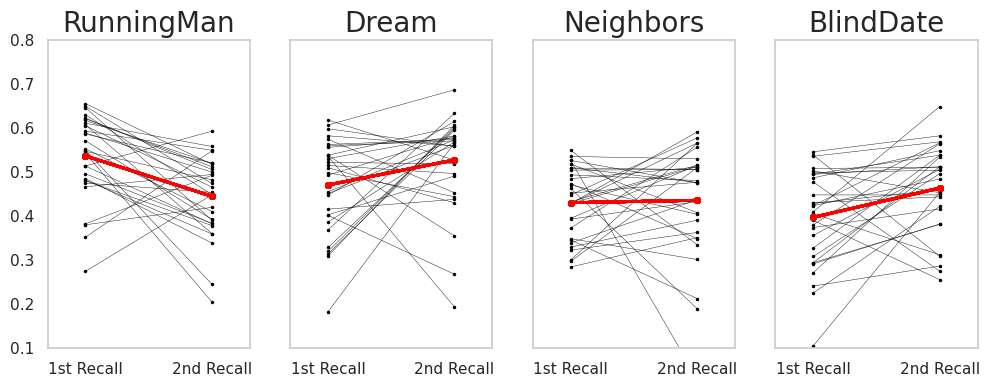

In [768]:
fig, axes = plt.subplots(1, 4, figsize = (12,4),sharey=True)   

plt.subplot(1,4,1)
values = [ '1st Recall', '2nd Recall']

for i in range(0,30):
    x = [1,2]
    y = [story1_results['run']['Average Correlation'].values[i], story2_results['run']['Average Correlation'].values[i]]
    y2 = [story1_results['run']['Average Correlation'].mean(), story2_results['run']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('RunningMan', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,2)
for i in range(0,30):
    x = [1,2]
    y = [story1_results['dre']['Average Correlation'].values[i], story2_results['dre']['Average Correlation'].values[i]]
    y2 = [story1_results['dre']['Average Correlation'].mean(), story2_results['dre']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Dream', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,3)
for i in range(0,30):
    x = [1,2]
    y = [story1_results['nei']['Average Correlation'].values[i], story2_results['nei']['Average Correlation'].values[i]]
    y2 = [story1_results['nei']['Average Correlation'].mean(), story2_results['nei']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Neighbors', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,4)   
for i in range(0,30):
    x = [1,2]
    y = [story1_results['bli']['Average Correlation'].values[i], story2_results['bli']['Average Correlation'].values[i]]
    y2 = [story1_results['bli']['Average Correlation'].mean(), story2_results['bli']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(False)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('BlindDate', fontsize =20) 
    plt.grid(False)

# plot_path = os.path.join(output_dir, "EventCounting.png")
# plt.savefig(plot_path)
# plt.show()

In [757]:
# 참가자 pairwise 상관 계수와 유의 확률 계산
recall1_patterns = {'run' : run1, 'dre':dre1, 'nei':nei1, 'bli':bli1}
recall2_patterns = {'run' : run2, 'dre':dre2, 'nei':nei2, 'bli':bli2}

all_data1 = pd.concat([recall1_patterns['run'].drop('S05', axis=1),recall1_patterns['bli'].drop('S05', axis=1),recall1_patterns['dre'].drop('S05', axis=1),recall1_patterns['nei'].drop('S05', axis=1)])    
all_data2 = pd.concat([recall2_patterns['run'].drop('S05', axis=1),recall2_patterns['bli'].drop('S05', axis=1),recall2_patterns['dre'].drop('S05', axis=1),recall2_patterns['nei'].drop('S05', axis=1)])    
all_data1.reset_index(inplace=True, drop=True)
all_data2.reset_index(inplace=True, drop=True)


results1 = pd.DataFrame()
corr =[] 
#참가자 별로 pairwise 상관 계수의 평균 계산
for column in all_data1.columns:
    correlations = []
    # 나머지 참가자들과의 pairwise 상관 계수 계산
    for other_column in all_data1.drop(column, axis=1).columns:
        correlation, _ = pearsonr(all_data1[column], all_data1[other_column])
        correlations.append(correlation)
    
    # 상관 계수의 평균 저장
    average_correlation = np.mean(correlations)
    corr.append(average_correlation)
    results1 = results1.append({
        'Participant': column,
        'Average Correlation': average_correlation
    }, ignore_index=True)

# 결과 출력
print(len(corr))

results2 = pd.DataFrame()
corr2 = []
#참가자 별로 pairwise 상관 계수의 평균 계산
for column in all_data2.columns:
    correlations = []
    # 나머지 참가자들과의 pairwise 상관 계수 계산
    for other_column in all_data2.drop(column, axis=1).columns:
        correlation, _ = pearsonr(all_data2[column], all_data2[other_column])
        correlations.append(correlation)
    
    # 상관 계수의 평균 저장
    average_correlation = np.mean(correlations)
    corr2.append(average_correlation)
    results2 = results2.append({'Participant': column,'Average Correlation': average_correlation}, ignore_index=True)
    
# 결과 출력
print(results1.mean())
print(results2.mean())

30
Average Correlation    0.45883
dtype: float64
Average Correlation    0.481902
dtype: float64


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


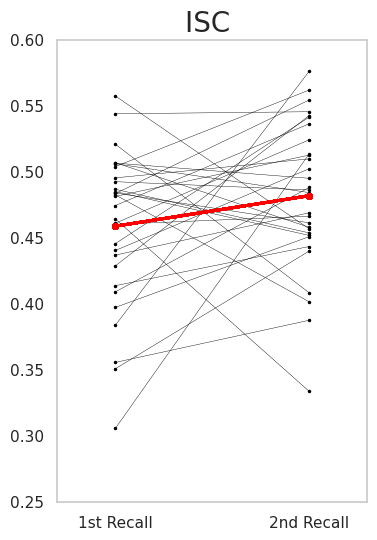

In [760]:
fig, axes = plt.subplots(1, 1, figsize = (4,6),sharey=True)   

# plt.subplot(1,2,1)
values = [ '1st Recall', '2nd Recall']
# run1 = story1_ec['RunningMan'].values
# run2 = story2_ec['RunningMan'].values

for i in range(0,30):
    x = [1,2]
    y = [results1['Average Correlation'].values[i], results2['Average Correlation'].values[i]]
    y2 = [results1['Average Correlation'].mean(), results2['Average Correlation'].mean()]
    plt.ylim([0.25, 0.6])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('ISC ', fontsize =20) 
    plt.grid(False)

plot_path = os.path.join(output_dir, "ISC.png")
plt.savefig(plot_path)
plt.show()

In [725]:
df = pd.DataFrame()
vcond = np.ones(31) 
acond = np.ones(31)*2
cond = np.concatenate((vcond,acond))

df['id'] = np.concatenate((np.array(results1['Participant']),np.array(results2['Participant'])))
df['output'] = np.concatenate((np.array(results1['Average Correlation']),np.array(results2['Average Correlation'])))
df['input'] = cond
    
print(AnovaRM(data=df, depvar='output', subject='id', within=['input']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
input  3.9458 1.0000 30.0000 0.0562



In [656]:
from nltools.stats import isc

stats = isc(run1, n_bootstraps=10000, metric='median', method='bootstrap')
stats2 = isc(run2, n_bootstraps=10000, metric='median', method='bootstrap')
print('run1', stats['isc'], stats['p'])
print('run2', stats2['isc'], stats2['p'])

stats = isc(dre1, n_bootstraps=10000, metric='median', method='bootstrap')
stats2 = isc(dre2, n_bootstraps=10000, metric='median', method='bootstrap')
print('dre1', stats['isc'], stats['p'])
print('dre2', stats2['isc'], stats2['p'])

stats = isc(nei1, n_bootstraps=10000, metric='median', method='bootstrap')
stats2 = isc(nei2, n_bootstraps=10000, metric='median', method='bootstrap')
print('nei1', stats['isc'], stats['p'])
print('nei2', stats2['isc'], stats2['p'])

stats = isc(bli1, n_bootstraps=10000, metric='median', method='bootstrap')
stats2 = isc(bli2, n_bootstraps=10000, metric='median', method='bootstrap')
print('bli1', stats['isc'], stats['p'])
print('bli2', stats2['isc'], stats2['p'])

run1 0.5723514714723391 9.999000099990002e-05
run2 0.4566768151530989 9.999000099990002e-05
dre1 0.4943049154090927 9.999000099990002e-05
dre2 0.5626301033812605 9.999000099990002e-05
nei1 0.4339021972002568 9.999000099990002e-05
nei2 0.444842631190683 9.999000099990002e-05
bli1 0.39215716988537785 9.999000099990002e-05
bli2 0.48908400404943886 9.999000099990002e-05


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
 

In [655]:
recall1_patterns = {'run' : run1, 'dre':dre1, 'nei':nei1, 'bli':bli1}
recall2_patterns = {'run' : run2, 'dre':dre2, 'nei':nei2, 'bli':bli2}

all_data1 = pd.concat([recall1_patterns['run'],recall1_patterns['bli'],recall1_patterns['dre'],recall1_patterns['nei']])    
all_data2 = pd.concat([recall2_patterns['run'],recall2_patterns['bli'],recall2_patterns['dre'],recall2_patterns['nei']])    
all_data1.reset_index(inplace=True, drop=True)
all_data2.reset_index(inplace=True, drop=True)

stats = isc(all_data1, n_bootstraps=10000, metric='median', method='bootstrap')
stats2 = isc(all_data2, n_bootstraps=10000, metric='median', method='bootstrap')

print('Recall1', stats['isc'], stats['p'])
print('Recall2', stats2['isc'], stats2['p'])

Recall1 0.45651768022280037 9.999000099990002e-05
Recall2 0.47455538586342194 9.999000099990002e-05


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0.5, 1.0, 'ISC Null Distribution')

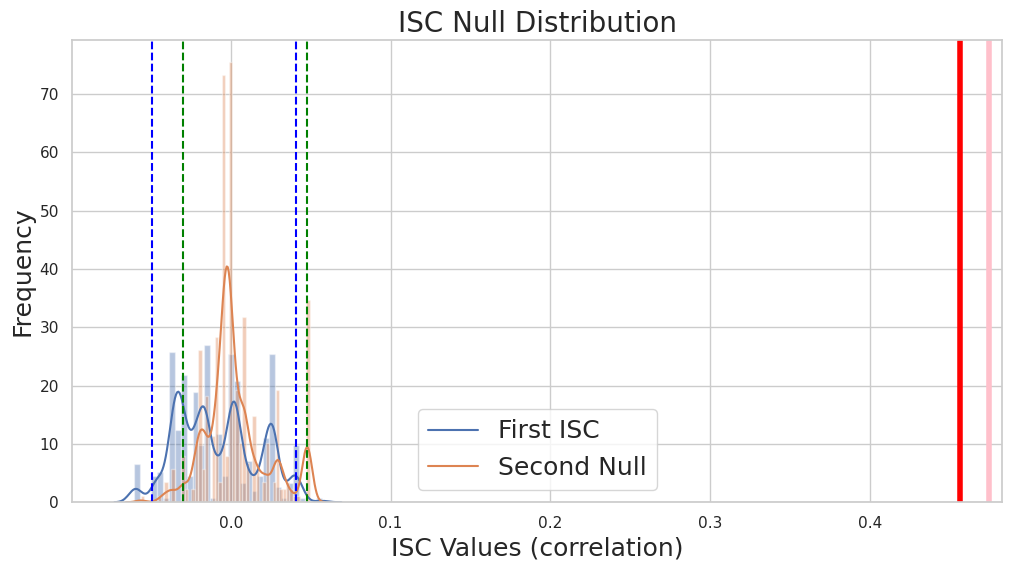

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
 

In [728]:
recall1_patterns = {'run' : run1, 'dre':dre1, 'nei':nei1, 'bli':bli1}
recall2_patterns = {'run' : run2, 'dre':dre2, 'nei':nei2, 'bli':bli2}

all_data1 = pd.concat([recall1_patterns['run'],recall1_patterns['bli'],recall1_patterns['dre'],recall1_patterns['nei']])    
all_data2 = pd.concat([recall2_patterns['run'],recall2_patterns['bli'],recall2_patterns['dre'],recall2_patterns['nei']])    
all_data1.reset_index(inplace=True, drop=True)
all_data2.reset_index(inplace=True, drop=True)

stats1_boot = isc(all_data1, method='bootstrap', n_bootstraps=10000, return_bootstraps=True)
stats2_boot = isc(all_data2, method='bootstrap', n_bootstraps=10000, return_bootstraps=True)

plt.figure(figsize=(12,6))
sns.distplot(stats1_boot['null_distribution'] - stats1_boot['isc'], kde=True, label='Bootstrap')
sns.distplot(stats2_boot['null_distribution'] - stats2_boot['isc'], kde=True, label='Bootstrap')
plt.legend(['First ISC', 'Second Null'], fontsize=18)

plt.axvline(stats1_boot['isc'], linestyle='-', color='red', linewidth=4)
plt.axvline(stats2_boot['isc'], linestyle='-', color='pink', linewidth=4)

plt.axvline(stats1_boot['ci'][0] - stats1_boot['isc'], linestyle='--', color='blue')
plt.axvline(stats1_boot['ci'][1] - stats1_boot['isc'], linestyle='--', color='blue')

plt.axvline(stats2_boot['ci'][0] - stats2_boot['isc'], linestyle='--', color='green')
plt.axvline(stats2_boot['ci'][1] - stats2_boot['isc'], linestyle='--', color='green')

plt.ylabel('Frequency', fontsize=18)
plt.xlabel('ISC Values (correlation)', fontsize=18)
plt.title('ISC Null Distribution', fontsize=20)

In [708]:
# Intra-SC - without 

from nltools.stats import isc
sub_iscr, sub_iscp = [], []
for sub in all_data1.columns:
    first = all_data1[sub]
    second = all_data2[sub]
    all_data = pd.concat([first, second], axis = 1)
    all_data.reset_index(inplace=True, drop=True)

    stats = isc(all_data, n_bootstraps=10000, metric='median', method='bootstrap') #exclude_self_corr = False)
    sub_iscr.append(stats['isc'])
    sub_iscp.append(stats['p'])
    #print(sub,story, stats['isc'], stats['p'])
print(np.mean(sub_iscr))

0.32388084881470963


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and w

In [769]:
vis_data1 = pd.concat([run1_vis,bli1_vis,dre1_vis,nei1_vis])    
vis_data2 = pd.concat([run2_vis,bli2_vis,dre2_vis,nei2_vis]) 
 
aud_data1 = pd.concat([run1_aud,bli1_aud,dre1_aud,nei1_aud])    
aud_data2 = pd.concat([run2_aud,bli2_aud,dre2_aud,nei2_aud])  

result = pd.DataFrame()
vis_vis_corr, vis_aud_corr, aud_aud_corr = [], [], []
#참가자 별로 pairwise 상관 계수의 평균 계산
for column in all_data2.columns:
    vis_correlations, vis_aud_correlations, aud_correlations = [], [], [] 
    # 나머지 참가자들과의 pairwise 상관 계수 계산
    for other_column in all_data2.drop(column, axis=1).columns:
        vis_corr, _ = pearsonr(vis_data1[column], vis_data2[other_column])
        vis_aud_corr, _ = pearsonr(vis_data1[column], aud_data2[other_column])
        aud_corr, _ = pearsonr(vis_data2[column], aud_data2[other_column])
        vis_correlations.append(vis_corr)
        vis_aud_correlations.append(vis_aud_corr)
        aud_correlations.append(aud_corr)
    
    # 상관 계수의 평균 저장
    vis_average_correlation = np.mean(vis_correlations)
    vis_aud_average_correlation = np.mean(vis_aud_correlations)
    aud_average_correlation = np.mean(aud_correlations)

    result = result.append({'Participant': column,'vis corr': vis_average_correlation, 'vis aud corr':vis_aud_average_correlation, 'aud corr': aud_average_correlation}, ignore_index=True)
    
# 결과 출력
print(result.mean())


vis corr        0.404396
vis aud corr    0.047523
aud corr        0.201156
dtype: float64


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [781]:
one = np.ones(30) 
two = np.ones(30)*2
three = np.ones(30)*3

df = pd.DataFrame()
df['id'] = pd.concat([result['Participant'],result['Participant'],result['Participant']])
df['input'] = np.concatenate([one,two, three]) 
df['output'] = pd.concat([result['vis corr'], result['vis aud corr'], result['aud corr']])

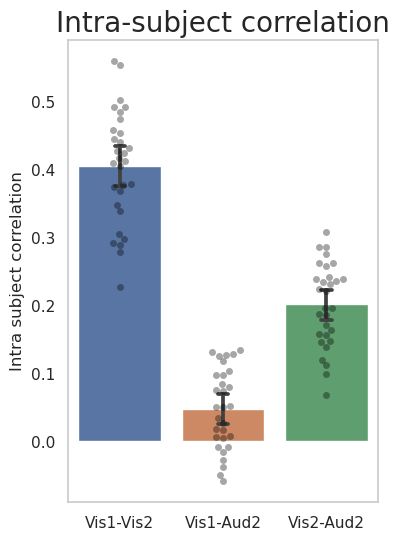

In [794]:
fig, axes = plt.subplots(1, 1, figsize = (4,6),sharey=True)   

values = ['Vis1-Vis2', 'Vis1-Aud2', 'Vis2-Aud2']
sns.barplot(x="input", y="output", data=df, capsize=.1, errorbar=('ci', 95))
sns.swarmplot(x="input", y="output", data=df, color="0", alpha=.35)
plt.title('Intra-subject correlation', fontsize =20)
plt.xticks([0,1,2],values)
plt.xlabel('')
plt.ylabel('Intra subject correlation') 
plt.grid(False)

# # plt.subplot(1,2,1)
# values = [ 'vis corr', 'vis aud corr', 'aud corr']
# # run1 = story1_ec['RunningMan'].values
# # run2 = story2_ec['RunningMan'].values

# for i in range(0,30):
#     x = [1,2,3]
#     y = [result['vis corr'].values[i], result['vis aud corr'].values[i], result['aud corr'].values[i]]
#     y2 = [result['vis corr'].mean(),  result['vis aud corr'].mean(), result['aud corr'].mean()]
#     plt.ylim([-0.5, 1])
#     plt.xlim([0.7, 3.3])
#     plt.gca().axes.yaxis.set_visible(True)
#     plt.xticks(x,values)
#     plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
#     plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
#     plt.title('Intra-SC ', fontsize =20) 
#     plt.grid(False)

plot_path = os.path.join(output_dir, "Intra-SC.png")
plt.savefig(plot_path)
plt.show()

In [718]:
vis_data1 = {'run': run1_vis,'bli': bli1_vis, 'dre': dre1_vis,'nei': nei1_vis}
vis_data2 = {'run': run2_vis,'bli': bli2_vis, 'dre': dre2_vis,'nei': nei2_vis}
 
aud_data1 = {'run': run1_aud, 'bli': bli1_aud, 'dre': dre1_aud, 'nei': nei1_aud}    
aud_data2 = {'run': run2_aud, 'bli': bli2_aud, 'dre': dre2_aud, 'nei': nei2_aud}




#참가자 별로 pairwise 상관 계수의 평균 계산
story_results = {} 
for story in ['run', 'bli', 'dre', 'nei']:
    result = pd.DataFrame()
    vis_vis_corr, vis_aud_corr, aud_aud_corr = [], [], []
    for column in all_data2.columns:
        vis_correlations, vis_aud_correlations, aud_correlations = [], [], [] 
        # 나머지 참가자들과의 pairwise 상관 계수 계산
        for other_column in all_data2.drop(column, axis=1).columns:
            vis_corr, _ = pearsonr(vis_data1[story][column], vis_data2[story][other_column])
            vis_aud_corr, _ = pearsonr(vis_data1[story][column], aud_data2[story][other_column])
            aud_corr, _ = pearsonr(vis_data2[story][column], aud_data2[story][other_column])
            vis_correlations.append(vis_corr)
            vis_aud_correlations.append(vis_aud_corr)
            aud_correlations.append(aud_corr)

        # 상관 계수의 평균 저장
        vis_average_correlation = np.mean(vis_correlations)
        vis_aud_average_correlation = np.mean(vis_aud_correlations)
        aud_average_correlation = np.mean(aud_correlations)

        result = result.append({'Participant': column,'vis corr': vis_average_correlation, 'vis aud corr':vis_aud_average_correlation, 'aud corr': aud_average_correlation}, ignore_index=True)

    # 결과 출력
    print(story, result.mean())
    story_results[story] = result

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


run vis corr        0.477446
vis aud corr    0.198911
aud corr        0.247117
dtype: float64
bli vis corr        0.392397
vis aud corr   -0.050198
aud corr        0.092021
dtype: float64
dre vis corr        0.431473
vis aud corr   -0.064920
aud corr        0.137517
dtype: float64
nei vis corr        0.264442
vis aud corr    0.003375
aud corr        0.274230
dtype: float64


In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (12,4),sharey=True)   

plt.subplot(1,4,1)
values = [ '1st Recall', '2nd Recall']

for i in range(0,30):
    x = [1,2]
    y = [story1_results['run']['Average Correlation'].values[i], story2_results['run']['Average Correlation'].values[i]]
    y2 = [story1_results['run']['Average Correlation'].mean(), story2_results['run']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('RunningMan', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,2)
for i in range(0,30):
    x = [1,2]
    y = [story1_results['dre']['Average Correlation'].values[i], story2_results['dre']['Average Correlation'].values[i]]
    y2 = [story1_results['dre']['Average Correlation'].mean(), story2_results['dre']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Dream', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,3)
for i in range(0,30):
    x = [1,2]
    y = [story1_results['nei']['Average Correlation'].values[i], story2_results['nei']['Average Correlation'].values[i]]
    y2 = [story1_results['nei']['Average Correlation'].mean(), story2_results['nei']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(True)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('Neighbors', fontsize =20) 
    plt.grid(False)
plt.subplot(1,4,4)   
for i in range(0,30):
    x = [1,2]
    y = [story1_results['bli']['Average Correlation'].values[i], story2_results['bli']['Average Correlation'].values[i]]
    y2 = [story1_results['bli']['Average Correlation'].mean(), story2_results['bli']['Average Correlation'].mean()]
    plt.ylim([0.1, 0.8])
    plt.xlim([0.7, 2.3])
    plt.gca().axes.yaxis.set_visible(False)
    plt.xticks(x,values)
    plt.plot(x,y, color='black', linewidth = 0.3, marker = '.', markersize = 3)
    plt.plot(x,y2, color='red', linewidth = 2, marker = 'o' , markersize = 4)
    plt.title('BlindDate', fontsize =20) 
    plt.grid(False)

# plot_path = os.path.join(output_dir, "EventCounting.png")
# plt.savefig(plot_path)
# plt.show()

In [ ]:
df.plot.bar(x='lang', y='val', rot=0)

In [716]:
vis_aud_correlations

[0.025604577824959472,
 -0.1498756430987615,
 0.04666517839767231,
 -0.06380462190684101,
 -0.1796460589185129,
 0.12920504770913102,
 0.08021122481569566,
 -0.022249254708230286,
 0.16309487100549058,
 -0.10467099725589694,
 0.2239669976346504,
 -0.10499682285691837,
 -0.027329019696085498,
 0.041108148675831985,
 -0.12641005208432915,
 -0.02834694001332757,
 0.047913730418815866,
 -0.04517966402267774,
 -0.06414040737105159,
 -0.04791373041881584,
 -0.15337955642548104,
 -0.16407950076410138,
 -0.013380773252626186,
 -0.055298247417407374,
 -0.12589478258034695,
 -0.1301085163358025,
 -0.18461184579638304,
 -0.08155752732115763,
 -0.181418917144288,
 -0.006620484352491294]